# Telecome Churn Business Problem Overview

- Telecommunication industry is a highly competitive market, and an average of 15-25% annual customre churn rate. Due to high churn rate Customer Retention has now become even more important than customer acquisition.

-  Here we have to working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. 

- Here our main aim is to reduce customer churn, and needs to predict which customers are at high risk of churn. 

- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. Analyze and understanding the typical customer behaviour during churn phase.

#### The conclusion of all the models used in this case study

|               | Accuracy  | Precision | Recall   | f1-score | 
|---------------|-----------|-----------|----------|----------|
|Logistic using PCA(train)| 0.931 | 0.92 | 0.93   | 0.92 |
|Logistic using PCA(test) | 0.841 | 0.818 | 0.843   | 0.831 | 
|Random Forest using PCA(train) | 0.91| 0.85| 0.92   | 0.88 |
|Random Forest using PCA(test) | 0.92| 0.93 | 0.84   | 0.87 |
|RandomForest with Hypertuning(train)  | 0.92| 0.85| 0.90   | 0.91 | 
|RandomForest with Hypertuning(test)  | 0.92| 0.85 | 0.90   | 0.91 |
|XGBoost with Hypertuning (train)  | 0.95| 0.95| 0.95  | 0.95 |
|XGBoost with Hypertuning (test)  | 0.91| 0.85 | 0.92   | 0.88 | 
|Logistic(train After smote)  | 0.852| 0.93| 0.85   | 0.88 | 
|Logistic(test After smote)  | 0.845 | 0.93| 0.85   | 0.87 | 
|Random Forest(train Aftersmote) | 0.896| 0.94| 0.90   | 0.91 
|Random Forest(test  Aftersmote) | 0.899| 0.93 | 0.89   | 0.91 | 
|Logistic Regressionwith PCA, Oversampling with Undersampling(train) 
| 0.868| 0.85| 0.88   | - | 
|Logistic Regressionwith PCA, Oversampling with Undersampling(test) 
| 0.86| 0.33| 0.79   | - | 
|Random Forest PCA, Hypertuning and Oversampling with Undersampling(train) | 0.878| 0.93 | 0.88  | 0.90 | 
|Random Forest PCA, Hypertuning and Oversampling with Undersampling(test) | 0.86| 0.92 | 0.86  | 0.88 | 

In [1]:
#imprting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\Jeevni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# reading the dataset
telecom = pd.read_csv("telecom_churn_data.csv")

In [5]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

In [6]:
telecom.shape

(99999, 226)

### Drive High Value Custmore.

#### we need to predict churn only for the high-value customers. The High value custmore can be drive from months of Good Phase. In Good Phase we consider first two months 6th and 7th. 

In [7]:
# Filter only high value customer
telecom['high_val_cust'] = telecom['total_rech_amt_6'] + telecom['total_rech_amt_7']

In [8]:
telecom['high_val_cust'].describe()

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
25%        230.000000
50%        458.000000
75%        838.000000
max      75525.000000
Name: high_val_cust, dtype: float64

In [9]:
df_telecom = telecom[(telecom.high_val_cust > int(telecom['high_val_cust'].quantile(.70)))]
df_telecom.shape

(29979, 227)

#### As we see above we have filter 70th percentile of the average recharge amount in Good Phase. We got 29979 Rows to predict a Churn Phase.

In [10]:
def get_null_percentage(_data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        return (_data.isnull().sum(axis=0)/_data.shape[0]).sort_values(ascending= False)

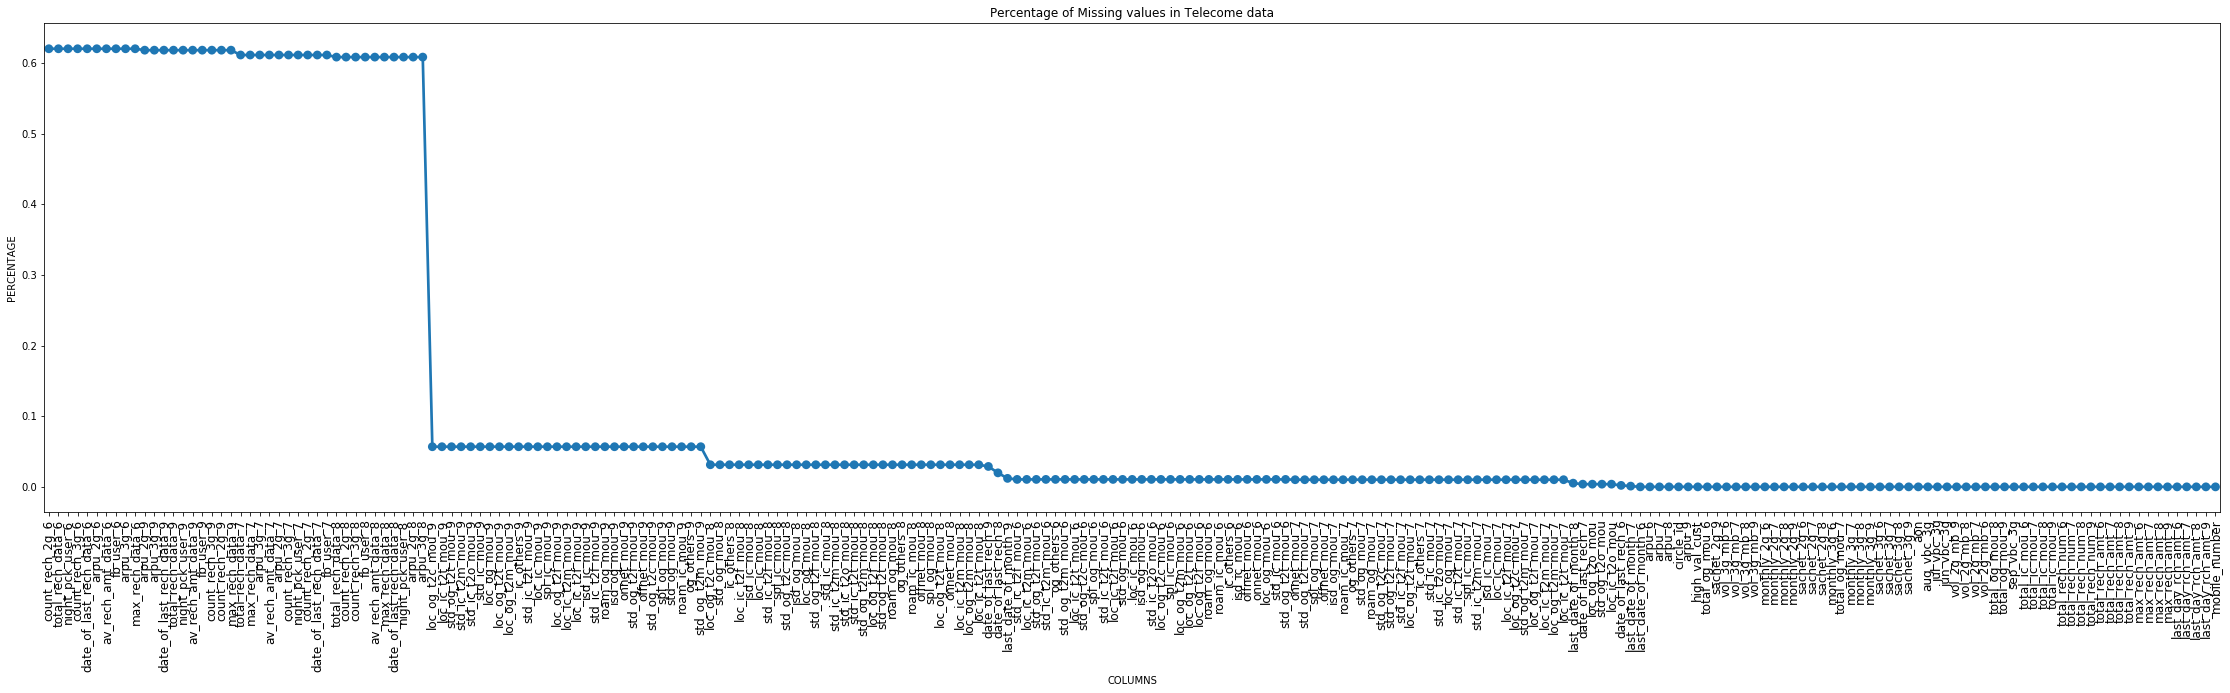

In [11]:
fig = plt.figure(figsize=(39,9))
missing_data = pd.DataFrame((get_null_percentage(df_telecom))).reset_index()
ax = sns.pointplot("index",0,data = missing_data)
plt.xticks(rotation =90,fontsize = 12)
plt.title("Percentage of Missing values in Telecome data",fontsize=12)
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

#### Here we filter the colums which has less than 0.6 mnulls value

In [12]:
null_values_per = get_null_percentage(df_telecom)
filtered_columns = list(null_values_per[null_values_per < 0.6].index)
filtered_data = df_telecom[filtered_columns]
filtered_data.head()

loc_og_t2c_mou_9  loc_ic_t2t_mou_9  std_og_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2o_mou_9  std_ic_mou_9  loc_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  ic_others_9  std_ic_t2t_mou_9  loc_ic_mou_9  spl_ic_mou_9  loc_og_t2f_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  isd_ic_mou_9  std_ic_t2f_mou_9  roam_og_mou_9  isd_og_mou_9  onnet_mou_9  std_og_t2f_mou_9  offnet_mou_9  std_og_t2c_mou_9  spl_og_mou_9  std_og_mou_9  roam_ic_mou_9  og_others_9  std_og_t2m_mou_9  loc_og_t2c_mou_8  std_og_mou_8  ic_others_8  loc_ic_t2f_mou_8  isd_ic_mou_8  loc_ic_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  std_og_t2c_mou_8  isd_og_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_ic_mou_8  std_ic_t2m_mou_8  std_ic_t2o_mou_8  std_ic_t2t_mou_8  std_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  roam_og_mou_8  og_others_8  roam_ic_mou_8  offnet_mou_8  spl_og_mou_8  loc_og_t2t_mou_8  onnet_mou_8  loc_ic_t2m_mou_8  loc_og_t2m_mou_8  loc_ic_t2t_mou_8 date_of_last_rech_9 date_of_last_rech_8 last_date_of_month_9  \
7                NaN               NaN               NaN               NaN               NaN           NaN           NaN               NaN               NaN          NaN               NaN           NaN           NaN               NaN               NaN               NaN           NaN               NaN            NaN           NaN          NaN               NaN           NaN               NaN           NaN           NaN            NaN          NaN               NaN              0.00         77.84        15.14             39.53         31.59        188.04             22.21           0.0               0.0         10.01        255.79             16.68        193.94            141.33               0.0             30.39             49.14             53.23             12.01          38.06          0.0          31.64        325.91          6.50             40.28        52.29            121.19            162.28             27.31           9/30/2014           8/26/2014            9/30/2014   
8                0.0              4.03              7.33             13.53               0.0         13.53         60.71             26.13             34.58         0.00              0.00         21.38           0.0              0.00             17.34              0.00          0.00               0.0           0.00           0.0        33.46              0.00        108.71               0.0          0.00         81.46           0.00          0.0             74.13              7.15         98.28         0.00              0.00          0.00         15.79              0.00           0.0               0.0          0.00         63.04              0.00          0.75              0.65               0.0              0.10             75.69              0.00             22.58           0.00          0.0           0.00        136.48         10.23             12.49        35.08             15.48             50.54              0.31           9/30/2014           8/30/2014            9/30/2014   
13               0.0             24.98            230.38            151.51               0.0        213.91        119.69              6.14            108.24        20.31             62.39        138.29           0.0              5.29            104.79              8.51        259.33               0.0          12.78           0.0       244.81              0.00        214.06               0.0          0.00        326.39         136.78          0.0             96.01              0.49        655.18        21.44              7.49        393.39        255.26              1.91           0.0               0.0          1.29        353.99              0.00        474.41            317.91               0.0            154.58            156.94             23.51            498.23           1.44          0.0          72.11        482.46          4.78             36.01       534.24            195.18            294.46             52.58           9/26/2014           8/30/2014            9/30/2014   
16              

In [13]:
filtered_data.shape

(29979, 187)

### Drop columns which has no variance

In [14]:
#List of columns with only 1 unqiue value
col_list = filtered_data.loc[:,filtered_data.apply(pd.Series.nunique) == 1]
col_list.columns

Index(['std_ic_t2o_mou_9', 'std_og_t2c_mou_9', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'last_date_of_month_8', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_6', 'circle_id'], dtype='object')

In [15]:
# Drop these columns as no variance
filtered_data = filtered_data.drop(['std_ic_t2o_mou_9', 'std_og_t2c_mou_9', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_8', 'last_date_of_month_9', 
                                    'std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'last_date_of_month_8', 
                                    'loc_og_t2o_mou', 'std_og_t2o_mou', 
                                    'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_6', 'circle_id'], 1)

In [16]:
filtered_data.isna().sum()

loc_og_t2c_mou_9       1703
loc_ic_t2t_mou_9       1703
std_og_t2t_mou_9       1703
std_ic_t2m_mou_9       1703
std_ic_mou_9           1703
loc_og_mou_9           1703
loc_og_t2t_mou_9       1703
loc_og_t2m_mou_9       1703
ic_others_9            1703
std_ic_t2t_mou_9       1703
loc_ic_mou_9           1703
spl_ic_mou_9           1703
loc_og_t2f_mou_9       1703
loc_ic_t2m_mou_9       1703
loc_ic_t2f_mou_9       1703
isd_ic_mou_9           1703
std_ic_t2f_mou_9       1703
roam_og_mou_9          1703
isd_og_mou_9           1703
onnet_mou_9            1703
std_og_t2f_mou_9       1703
offnet_mou_9           1703
spl_og_mou_9           1703
std_og_mou_9           1703
roam_ic_mou_9          1703
og_others_9            1703
std_og_t2m_mou_9       1703
loc_og_t2c_mou_8        938
std_og_mou_8            938
ic_others_8             938
loc_ic_t2f_mou_8        938
isd_ic_mou_8            938
loc_ic_mou_8            938
std_ic_t2f_mou_8        938
spl_ic_mou_8            938
isd_og_mou_8        

#### Here we have large dataset so we handle the null values by every months.

In [17]:
mou_9_cols = [col for col in filtered_data.columns if '_9' in col]
mou_9_cols

mou_8_cols = [col for col in filtered_data.columns if '_8' in col]
mou_8_cols

mou_7_cols = [col for col in filtered_data.columns if '_7' in col]
mou_7_cols

mou_6_cols = [col for col in filtered_data.columns if '_6' in col]
mou_6_cols


['std_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_ic_t2m_mou_6',
 'og_others_6',
 'std_og_t2m_mou_6',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_6',
 'std_ic_t2t_mou_6',
 'loc_ic_t2f_mou_6',
 'std_og_mou_6',
 'loc_ic_mou_6',
 'isd_og_mou_6',
 'loc_og_t2c_mou_6',
 'spl_ic_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2f_mou_6',
 'roam_og_mou_6',
 'roam_ic_mou_6',
 'ic_others_6',
 'isd_ic_mou_6',
 'offnet_mou_6',
 'onnet_mou_6',
 'loc_og_mou_6',
 'std_ic_mou_6',
 'std_og_t2t_mou_6',
 'date_of_last_rech_6',
 'arpu_6',
 'total_og_mou_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'vol_2g_mb_6',
 'total_ic_mou_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6']

In [18]:
get_null_percentage(filtered_data[mou_9_cols])

std_og_t2f_mou_9       0.056806
onnet_mou_9            0.056806
roam_og_mou_9          0.056806
std_ic_t2f_mou_9       0.056806
isd_ic_mou_9           0.056806
loc_ic_t2f_mou_9       0.056806
loc_ic_t2m_mou_9       0.056806
loc_og_t2f_mou_9       0.056806
spl_ic_mou_9           0.056806
loc_ic_mou_9           0.056806
std_ic_t2t_mou_9       0.056806
ic_others_9            0.056806
loc_og_t2m_mou_9       0.056806
loc_og_t2t_mou_9       0.056806
loc_og_mou_9           0.056806
std_ic_mou_9           0.056806
std_ic_t2m_mou_9       0.056806
std_og_t2t_mou_9       0.056806
loc_ic_t2t_mou_9       0.056806
isd_og_mou_9           0.056806
loc_og_t2c_mou_9       0.056806
spl_og_mou_9           0.056806
std_og_mou_9           0.056806
roam_ic_mou_9          0.056806
og_others_9            0.056806
std_og_t2m_mou_9       0.056806
offnet_mou_9           0.056806
date_of_last_rech_9    0.028887
max_rech_amt_9         0.000000
vol_2g_mb_9            0.000000
total_rech_amt_9       0.000000
total_re

In [19]:
get_null_percentage(filtered_data[mou_8_cols])

offnet_mou_8           0.031289
roam_ic_mou_8          0.031289
roam_og_mou_8          0.031289
std_og_t2t_mou_8       0.031289
loc_og_t2f_mou_8       0.031289
std_og_t2m_mou_8       0.031289
std_ic_t2t_mou_8       0.031289
std_ic_t2m_mou_8       0.031289
std_ic_mou_8           0.031289
std_og_t2f_mou_8       0.031289
loc_og_mou_8           0.031289
isd_og_mou_8           0.031289
spl_ic_mou_8           0.031289
std_ic_t2f_mou_8       0.031289
loc_ic_mou_8           0.031289
isd_ic_mou_8           0.031289
loc_ic_t2f_mou_8       0.031289
ic_others_8            0.031289
std_og_mou_8           0.031289
og_others_8            0.031289
loc_og_t2c_mou_8       0.031289
loc_og_t2t_mou_8       0.031289
onnet_mou_8            0.031289
loc_ic_t2m_mou_8       0.031289
loc_og_t2m_mou_8       0.031289
loc_ic_t2t_mou_8       0.031289
spl_og_mou_8           0.031289
date_of_last_rech_8    0.019814
max_rech_amt_8         0.000000
vol_2g_mb_8            0.000000
total_rech_amt_8       0.000000
total_re

In [20]:
get_null_percentage(filtered_data[mou_7_cols])

loc_ic_t2f_mou_7       0.010107
loc_ic_mou_7           0.010107
std_ic_t2m_mou_7       0.010107
spl_ic_mou_7           0.010107
std_ic_t2t_mou_7       0.010107
loc_og_mou_7           0.010107
std_ic_mou_7           0.010107
ic_others_7            0.010107
loc_og_t2t_mou_7       0.010107
std_ic_t2f_mou_7       0.010107
std_og_t2f_mou_7       0.010107
roam_og_mou_7          0.010107
std_og_mou_7           0.010107
og_others_7            0.010107
roam_ic_mou_7          0.010107
isd_og_mou_7           0.010107
offnet_mou_7           0.010107
spl_og_mou_7           0.010107
std_og_t2t_mou_7       0.010107
isd_ic_mou_7           0.010107
onnet_mou_7            0.010107
std_og_t2m_mou_7       0.010107
loc_og_t2f_mou_7       0.010107
loc_ic_t2m_mou_7       0.010107
loc_og_t2m_mou_7       0.010107
loc_ic_t2t_mou_7       0.010107
loc_og_t2c_mou_7       0.010107
date_of_last_rech_7    0.003803
max_rech_amt_7         0.000000
sachet_3g_7            0.000000
total_rech_amt_7       0.000000
total_re

In [21]:
get_null_percentage(filtered_data[mou_6_cols])

ic_others_6            0.010541
roam_ic_mou_6          0.010541
loc_og_t2f_mou_6       0.010541
loc_og_t2t_mou_6       0.010541
loc_og_t2m_mou_6       0.010541
spl_ic_mou_6           0.010541
loc_og_t2c_mou_6       0.010541
isd_og_mou_6           0.010541
loc_ic_mou_6           0.010541
std_og_mou_6           0.010541
loc_ic_t2f_mou_6       0.010541
std_ic_t2t_mou_6       0.010541
spl_og_mou_6           0.010541
loc_ic_t2t_mou_6       0.010541
std_og_t2m_mou_6       0.010541
og_others_6            0.010541
std_ic_t2m_mou_6       0.010541
std_og_t2f_mou_6       0.010541
loc_ic_t2m_mou_6       0.010541
roam_og_mou_6          0.010541
std_ic_t2f_mou_6       0.010541
offnet_mou_6           0.010541
onnet_mou_6            0.010541
loc_og_mou_6           0.010541
std_ic_mou_6           0.010541
std_og_t2t_mou_6       0.010541
isd_ic_mou_6           0.010541
date_of_last_rech_6    0.002068
max_rech_amt_6         0.000000
sachet_3g_6            0.000000
total_rech_amt_6       0.000000
total_re

#### Now we will consider more than 2% null values and imputing them 

In [22]:

filtered_data[mou_9_cols].mode()

#except date_of_last_rech_9,total_rech_num_9 and max_rech_amt_9 all are 0 so lets replace all columns to 0 except these 3
cols = ['loc_og_t2c_mou_9', 'loc_ic_t2t_mou_9', 'std_og_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_mou_9', 'loc_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'ic_others_9', 'std_ic_t2t_mou_9', 'loc_ic_mou_9', 'spl_ic_mou_9', 'loc_og_t2f_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'isd_ic_mou_9', 'std_ic_t2f_mou_9', 'roam_og_mou_9', 'isd_og_mou_9', 'onnet_mou_9', 'std_og_t2f_mou_9', 'offnet_mou_9', 'spl_og_mou_9', 'std_og_mou_9', 'roam_ic_mou_9', 'og_others_9', 'std_og_t2m_mou_9', 'arpu_9', 'sachet_2g_9', 'vol_3g_mb_9', 'monthly_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'vol_2g_mb_9', 'total_og_mou_9', 'total_ic_mou_9','total_rech_amt_9', 'last_day_rch_amt_9']

filtered_data[cols]=filtered_data[cols].fillna(0)
filtered_data['date_of_last_rech_9'] = filtered_data['date_of_last_rech_9'].fillna('9/29/2014')
filtered_data['total_rech_num_9'] = filtered_data['total_rech_num_9'].fillna(4)
filtered_data['max_rech_amt_9'] = filtered_data['max_rech_amt_9'].fillna(130)

In [23]:
get_null_percentage(filtered_data[mou_9_cols])

last_day_rch_amt_9     0.0
onnet_mou_9            0.0
roam_og_mou_9          0.0
std_ic_t2f_mou_9       0.0
isd_ic_mou_9           0.0
loc_ic_t2f_mou_9       0.0
loc_ic_t2m_mou_9       0.0
loc_og_t2f_mou_9       0.0
spl_ic_mou_9           0.0
loc_ic_mou_9           0.0
std_ic_t2t_mou_9       0.0
ic_others_9            0.0
loc_og_t2m_mou_9       0.0
loc_og_t2t_mou_9       0.0
loc_og_mou_9           0.0
std_ic_mou_9           0.0
std_ic_t2m_mou_9       0.0
std_og_t2t_mou_9       0.0
loc_ic_t2t_mou_9       0.0
isd_og_mou_9           0.0
std_og_t2f_mou_9       0.0
max_rech_amt_9         0.0
offnet_mou_9           0.0
total_rech_amt_9       0.0
total_rech_num_9       0.0
total_ic_mou_9         0.0
total_og_mou_9         0.0
vol_2g_mb_9            0.0
sachet_3g_9            0.0
monthly_3g_9           0.0
monthly_2g_9           0.0
vol_3g_mb_9            0.0
sachet_2g_9            0.0
arpu_9                 0.0
date_of_last_rech_9    0.0
std_og_t2m_mou_9       0.0
og_others_9            0.0
r

In [24]:
filtered_data[mou_8_cols].mode()
#except date_of_last_rech_9,total_rech_num_9 and max_rech_amt_9 all are 0 so lets replace all columns to 0 except these 3
cols = ['loc_og_t2c_mou_8', 'loc_ic_t2t_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'ic_others_8', 'std_ic_t2t_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'isd_ic_mou_8', 'std_ic_t2f_mou_8', 'roam_og_mou_8', 'isd_og_mou_8', 'onnet_mou_8', 'std_og_t2f_mou_8', 'offnet_mou_8', 'spl_og_mou_8', 'std_og_mou_8', 'roam_ic_mou_8', 'og_others_8', 'std_og_t2m_mou_8', 'arpu_8', 'sachet_2g_8', 'vol_3g_mb_8', 'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vol_2g_mb_8', 'total_og_mou_8', 'total_ic_mou_8','total_rech_amt_8', 'last_day_rch_amt_8']

filtered_data[cols]=filtered_data[cols].fillna(0)
filtered_data['date_of_last_rech_8'] = filtered_data['date_of_last_rech_8'].fillna('8/31/2014')
filtered_data['total_rech_num_8'] = filtered_data['total_rech_num_8'].fillna(4)
filtered_data['max_rech_amt_8'] = filtered_data['max_rech_amt_8'].fillna(130)


In [25]:
get_null_percentage(filtered_data[mou_8_cols])

last_day_rch_amt_8     0.0
roam_ic_mou_8          0.0
roam_og_mou_8          0.0
std_og_t2t_mou_8       0.0
loc_og_t2f_mou_8       0.0
std_og_t2m_mou_8       0.0
std_ic_t2t_mou_8       0.0
std_ic_t2m_mou_8       0.0
std_ic_mou_8           0.0
std_og_t2f_mou_8       0.0
loc_og_mou_8           0.0
isd_og_mou_8           0.0
spl_ic_mou_8           0.0
std_ic_t2f_mou_8       0.0
loc_ic_mou_8           0.0
isd_ic_mou_8           0.0
loc_ic_t2f_mou_8       0.0
ic_others_8            0.0
std_og_mou_8           0.0
og_others_8            0.0
offnet_mou_8           0.0
max_rech_amt_8         0.0
spl_og_mou_8           0.0
total_rech_amt_8       0.0
total_rech_num_8       0.0
total_ic_mou_8         0.0
total_og_mou_8         0.0
vol_2g_mb_8            0.0
sachet_3g_8            0.0
monthly_3g_8           0.0
sachet_2g_8            0.0
monthly_2g_8           0.0
vol_3g_mb_8            0.0
arpu_8                 0.0
date_of_last_rech_8    0.0
loc_ic_t2t_mou_8       0.0
loc_og_t2m_mou_8       0.0
l

In [26]:
get_null_percentage(filtered_data)

og_others_6            0.010541
loc_og_t2f_mou_6       0.010541
loc_ic_t2m_mou_6       0.010541
std_ic_t2m_mou_6       0.010541
std_og_t2t_mou_6       0.010541
std_ic_mou_6           0.010541
loc_og_mou_6           0.010541
onnet_mou_6            0.010541
offnet_mou_6           0.010541
isd_ic_mou_6           0.010541
ic_others_6            0.010541
roam_ic_mou_6          0.010541
roam_og_mou_6          0.010541
std_og_t2f_mou_6       0.010541
loc_og_t2t_mou_6       0.010541
loc_ic_t2f_mou_6       0.010541
std_og_t2m_mou_6       0.010541
loc_og_t2m_mou_6       0.010541
loc_ic_t2t_mou_6       0.010541
spl_og_mou_6           0.010541
std_ic_t2t_mou_6       0.010541
std_ic_t2f_mou_6       0.010541
std_og_mou_6           0.010541
spl_ic_mou_6           0.010541
loc_ic_mou_6           0.010541
isd_og_mou_6           0.010541
loc_og_t2c_mou_6       0.010541
loc_ic_t2f_mou_7       0.010107
std_ic_t2m_mou_7       0.010107
isd_ic_mou_7           0.010107
loc_ic_mou_7           0.010107
std_og_t

In [27]:
#Lets drop the rows as missing values are less then 2%
filtered_data.dropna(inplace = True)

In [28]:
get_null_percentage(filtered_data)

mobile_number          0.0
loc_ic_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
og_others_6            0.0
std_ic_t2m_mou_6       0.0
std_og_t2f_mou_6       0.0
loc_ic_t2m_mou_6       0.0
std_ic_t2f_mou_6       0.0
date_of_last_rech_8    0.0
date_of_last_rech_9    0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_8       0.0
loc_ic_t2m_mou_8       0.0
onnet_mou_8            0.0
loc_og_t2t_mou_8       0.0
spl_og_mou_8           0.0
offnet_mou_8           0.0
roam_ic_mou_8          0.0
og_others_8            0.0
roam_og_mou_8          0.0
loc_ic_t2t_mou_6       0.0
spl_og_mou_6           0.0
std_ic_t2t_mou_6       0.0
loc_ic_t2f_mou_6       0.0
std_og_t2t_mou_6       0.0
std_ic_mou_6           0.0
loc_og_mou_6           0.0
onnet_mou_6            0.0
offnet_mou_6           0.0
isd_ic_mou_6           0.0
ic_others_6            0.0
roam_ic_mou_6          0.0
roam_og_mou_6          0.0
loc_og_t2f_mou_6       0.0
loc_og_t2t_mou_6       0.0
loc_og_t2m_mou_6       0.0
spl_ic_mou_6           0.0
l

### Create Churn Column

#### If Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.  That can be defind as Churn . 

In [29]:
def set_churn(df):
    if ((df.total_ic_mou_9 == 0) & (df.total_og_mou_9 == 0) & (df.vol_2g_mb_9 == 0) & (df.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

In [30]:
filtered_data['churn'] = filtered_data.apply(set_churn, axis=1)

Data is balanced or imbalanced

In [31]:
filtered_data['churn'].value_counts()

0    27043
1     2349
Name: churn, dtype: int64

In [32]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#Data is balanced or imbalanced

temp = filtered_data["churn"].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df1.iplot(kind='pie',labels='labels',values='values', title='Churn or not')

Data is highly imbalanced

In [33]:
# Drop all columns _9 as already used for creating churn column
filtered_data = filtered_data.drop(filtered_data.filter(like = '9').columns, axis=1)

In [34]:
filtered_data.shape

(29392, 131)

In [35]:
filtered_data.head()

loc_og_t2c_mou_8  std_og_mou_8  ic_others_8  loc_ic_t2f_mou_8  isd_ic_mou_8  loc_ic_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  isd_og_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_ic_mou_8  std_ic_t2m_mou_8  std_ic_t2t_mou_8  std_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  roam_og_mou_8  og_others_8  roam_ic_mou_8  offnet_mou_8  spl_og_mou_8  loc_og_t2t_mou_8  onnet_mou_8  loc_ic_t2m_mou_8  loc_og_t2m_mou_8  loc_ic_t2t_mou_8 date_of_last_rech_8  std_ic_t2f_mou_6  loc_ic_t2m_mou_6  std_og_t2f_mou_6  std_ic_t2m_mou_6  og_others_6  std_og_t2m_mou_6  loc_ic_t2t_mou_6  spl_og_mou_6  std_ic_t2t_mou_6  loc_ic_t2f_mou_6  std_og_mou_6  loc_ic_mou_6  isd_og_mou_6  loc_og_t2c_mou_6  spl_ic_mou_6  loc_og_t2m_mou_6  loc_og_t2t_mou_6  loc_og_t2f_mou_6  roam_og_mou_6  roam_ic_mou_6  ic_others_6  isd_ic_mou_6  offnet_mou_6  onnet_mou_6  loc_og_mou_6  std_ic_mou_6  std_og_t2t_mou_6  onnet_mou_7  std_og_t2t_mou_7  spl_og_mou_7  offnet_mou_7  isd_og_mou_7  roam_ic_mou_7  og_others_7  std_og_mou_7  \
7               0.00         77.84        15.14             39.53         31.59        188.04             22.21           0.0         10.01        255.79             16.68        193.94            141.33             30.39             49.14             53.23             12.01          38.06          0.0          31.64        325.91          6.50             40.28        52.29            121.19            162.28             27.31           8/26/2014             52.19            217.56              6.66             91.44         0.00             49.89             58.14          4.50             36.89            152.16         60.86        427.88           0.0               0.0          0.21            308.63             51.39             62.13          23.74          16.23        15.74          2.06        453.43        57.84        422.16        180.54              4.30        54.68             23.29          0.00        567.16          0.18          33.49          0.0         75.14   
8               7.15         98.28         0.00              0.00          0.00         15.79              0.00           0.0          0.00         63.04              0.00          0.75              0.65              0.10             75.69              0.00             22.58           0.00          0.0           0.00        136.48         10.23             12.49        35.08             15.48             50.54              0.31           8/30/2014              0.00             57.58              0.00             22.43         0.00             13.69             23.84          0.00              0.00              0.00        130.26         81.43           0.0               0.0          0.00             80.96            297.13              0.00           0.00           0.00         0.00          0.00         94.66       413.69        378.09         22.43            116.56       351.03            133.43          0.00         80.63          0.00           0.00          0.0        143.48   
13              0.49        655.18        21.44              7.49        393.39        255.26              1.91           0.0          1.29        353.99              0.00        474.41            317.91            154.58            156.94             23.51            498.23           1.44          0.0          72.11        482.46          4.78             36.01       534.24            195.18            294.46             52.58           8/30/2014              0.00            142.88              0.00            308.13         0.00            255.36             67.88          0.00            115.68              4.81        701.78        215.58           0.0               0.0          0.45            151.13             49.63              4.54           7.98          23.53        83.48        245.28        413.31       501.76        205.31        423.81            446.41       108.39             85.98          0.00        119.28          0.00         144.24          0.0        138.93   
16      

### Analyse each zone high value, action,good as per usuage

#### The Good Phase: In this phase, the customer is happy with the service and behaves as usual.For this Telecommunication churn problem to defind good Phase we need to consider a first two months. 

#### The Action Phase: The customer experience starts to sore in this phase,for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. After Good Phase next month can be defind Action Phase. This Phase also decide that custmore started churn or not. 

In [36]:
df_churn = filtered_data

In [37]:
#As 6 and 7 month are good zone so lets add both the columns and derive new one
cols = ['ic_others_6','isd_ic_mou_6','loc_ic_mou_6','spl_ic_mou_6','roam_ic_mou_6','std_ic_mou_6','ic_others_7','isd_ic_mou_7','loc_ic_mou_7','spl_ic_mou_7','roam_ic_mou_7','std_ic_mou_7',
        'og_others_6','isd_og_mou_6','loc_og_mou_6','spl_og_mou_6','roam_og_mou_6','std_og_mou_6','og_others_7','isd_og_mou_7','loc_og_mou_7','spl_og_mou_7','roam_og_mou_7','std_og_mou_7']
df_good = filtered_data[cols]

df_good['total_incoming_6_7'] = df_good['ic_others_6']+df_good['isd_ic_mou_6']+df_good['loc_ic_mou_6']+df_good['spl_ic_mou_6']+df_good['roam_ic_mou_6']+df_good['ic_others_7']+df_good['isd_ic_mou_7']+df_good['loc_ic_mou_7']+df_good['spl_ic_mou_7']+df_good['roam_ic_mou_7']

df_good['total_outgoing_6_7'] = df_good['og_others_6']+df_good['isd_og_mou_6']+df_good['loc_og_mou_6']+df_good['spl_og_mou_6']+df_good['roam_og_mou_6']+df_good['og_others_7']+df_good['isd_og_mou_7']+df_good['loc_og_mou_7']+df_good['spl_og_mou_7']+df_good['roam_og_mou_7']


df_good['ic_others_6_7'] = df_good['ic_others_6']+df_good['ic_others_7']
df_good['isd_ic_mou_6_7'] = df_good['isd_ic_mou_6']+df_good['isd_ic_mou_7']
df_good['loc_ic_mou_6_7'] = df_good['loc_ic_mou_6']+df_good['loc_ic_mou_7']
df_good['spl_ic_mou_6_7'] = df_good['spl_ic_mou_6']+df_good['spl_ic_mou_7']
df_good['roam_ic_mou_6_7'] = df_good['roam_ic_mou_6']+df_good['roam_ic_mou_7']
df_good['std_ic_mou_6_7'] = df_good['std_ic_mou_6']+df_good['std_ic_mou_7']

df_good['og_others_6_7'] = df_good['og_others_6']+df_good['og_others_7']
df_good['isd_og_mou_6_7'] = df_good['isd_og_mou_6']+df_good['isd_og_mou_7']
df_good['loc_og_mou_6_7'] = df_good['loc_og_mou_6']+df_good['loc_og_mou_7']
df_good['spl_og_mou_6_7'] = df_good['spl_og_mou_6']+df_good['spl_og_mou_7']
df_good['roam_og_mou_6_7'] = df_good['roam_og_mou_6']+df_good['roam_og_mou_7']
df_good['std_og_mou_6_7'] = df_good['std_og_mou_6']+df_good['std_og_mou_7']


In [38]:
# get the percentage for every individual

df_good['ic_others_6_7'] = round((df_good['ic_others_6_7']/df_good['total_incoming_6_7']) * 100,2)
df_good['isd_ic_mou_6_7'] = round((df_good['isd_ic_mou_6_7']/df_good['total_incoming_6_7']) * 100,2)
df_good['loc_ic_mou_6_7'] = round((df_good['loc_ic_mou_6_7']/df_good['total_incoming_6_7']) * 100,2)
df_good['spl_ic_mou_6_7'] = round((df_good['spl_ic_mou_6_7']/df_good['total_incoming_6_7']) * 100,2)
df_good['roam_ic_mou_6_7'] = round((df_good['roam_ic_mou_6_7']/df_good['total_incoming_6_7']) * 100,2)
df_good['std_ic_mou_6_7'] = round((df_good['std_ic_mou_6_7']/df_good['total_incoming_6_7']) * 100,2)

df_good['og_others_6_7'] = round((df_good['og_others_6_7']/df_good['total_outgoing_6_7']) * 100,2)
df_good['isd_og_mou_6_7'] = round((df_good['isd_og_mou_6_7']/df_good['total_outgoing_6_7']) * 100,2)
df_good['loc_og_mou_6_7'] = round((df_good['loc_og_mou_6_7']/df_good['total_outgoing_6_7']) * 100,2)
df_good['spl_og_mou_6_7'] = round((df_good['spl_og_mou_6_7']/df_good['total_outgoing_6_7']) * 100,2)
df_good['roam_og_mou_6_7'] = round((df_good['roam_og_mou_6_7']/df_good['total_outgoing_6_7']) * 100,2)
df_good['std_og_mou_6_7'] = round((df_good['std_og_mou_6_7']/df_good['total_outgoing_6_7']) * 100,2)

In [39]:
df_good.head()

ic_others_6  isd_ic_mou_6  loc_ic_mou_6  spl_ic_mou_6  roam_ic_mou_6  std_ic_mou_6  ic_others_7  isd_ic_mou_7  loc_ic_mou_7  spl_ic_mou_7  roam_ic_mou_7  std_ic_mou_7  og_others_6  isd_og_mou_6  loc_og_mou_6  spl_og_mou_6  roam_og_mou_6  std_og_mou_6  og_others_7  isd_og_mou_7  loc_og_mou_7  spl_og_mou_7  roam_og_mou_7  std_og_mou_7  total_incoming_6_7  total_outgoing_6_7  ic_others_6_7  isd_ic_mou_6_7  loc_ic_mou_6_7  spl_ic_mou_6_7  roam_ic_mou_6_7  std_ic_mou_6_7  og_others_6_7  isd_og_mou_6_7  loc_og_mou_6_7  spl_og_mou_6_7  roam_og_mou_6_7  std_og_mou_6_7
7         15.74          2.06        427.88          0.21          16.23        180.54        15.19         14.53        355.23           0.0          33.49        173.08         0.00           0.0        422.16          4.50          23.74         60.86          0.0          0.18        533.91          0.00          12.59         75.14              880.56              997.08           3.51            1.88           88.93            0.02             5.65           40.16           0.00            0.02           95.89            0.45             3.64           13.64
8          0.00          0.00         81.43          0.00           0.00         22.43         0.00          0.00         23.83           0.0           0.00          4.66         0.00           0.0        378.09          0.00           0.00        130.26          0.0          0.00        288.18          0.00           0.00        143.48              105.26              666.27           0.00            0.00          100.00            0.00             0.00           25.74           0.00            0.00          100.00            0.00             0.00           41.09
13        83.48        245.28        215.58          0.45          23.53        423.81        16.24         62.11         26.11           0.0         144.24         68.09         0.00           0.0        205.31          0.00           7.98        701.78          0.0          0.00         53.48          0.00          35.26        138.93              817.02              302.03          12.21           37.62           29.58            0.06            20.53           60.21           0.00            0.00           85.68            0.00            14.32          278.35
16         0.00          0.00        276.86          0.00           0.00         87.99         0.00          0.00        229.83           0.0           2.83        151.73         0.00           0.0        315.91          0.00           0.00         30.89          0.0          0.00        215.64          3.26          17.74         67.09              509.52              552.55           0.00            0.00           99.44            0.00             0.56           47.05           0.00            0.00           96.20            0.59             3.21           17.73
17         0.00          0.00         81.96          0.00           0.00          9.91         0.00          0.00          2.31           0.0           4.76          0.00         0.93           0.0         97.54          2.58           0.00       1148.46          0.0          0.00          0.00          0.00           8.46          0.81               89.03              109.51           0.00            0.00           94.65            0.00             5.35           11.13           0.85            0.00           89.07            2.36             7.73         1049.47

In [40]:
df_good = df_good.drop(['ic_others_6', 'isd_ic_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6',
                        'ic_others_7', 
                        'isd_ic_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'roam_ic_mou_7', 'og_others_6', 'isd_og_mou_6', 
                        'loc_og_mou_6', 'spl_og_mou_6', 'roam_og_mou_6', 'og_others_7', 'isd_og_mou_7', 'loc_og_mou_7', 
                        'spl_og_mou_7', 'roam_og_mou_7','std_og_mou_6','std_og_mou_7'],1)

In [41]:
def plot_num_variable(col_name,df):
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(y=df[col_name])
    plt.title('% '+col_name)
    plt.xticks(rotation=90)

In [42]:
df_good.columns

Index(['std_ic_mou_7', 'total_incoming_6_7', 'total_outgoing_6_7', 'ic_others_6_7', 'isd_ic_mou_6_7', 'loc_ic_mou_6_7', 'spl_ic_mou_6_7', 'roam_ic_mou_6_7', 'std_ic_mou_6_7', 'og_others_6_7', 'isd_og_mou_6_7', 'loc_og_mou_6_7', 'spl_og_mou_6_7', 'roam_og_mou_6_7', 'std_og_mou_6_7'], dtype='object')

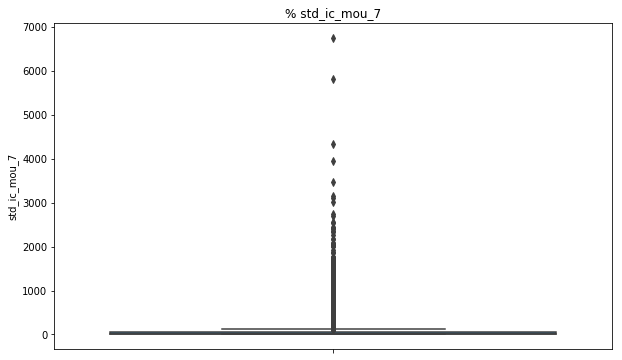

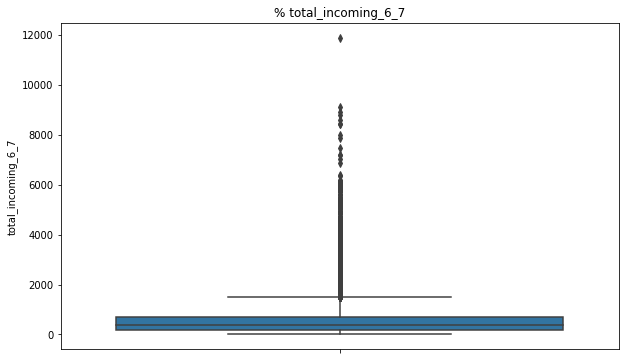

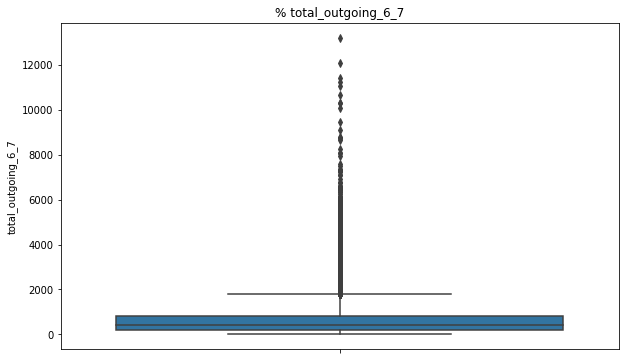

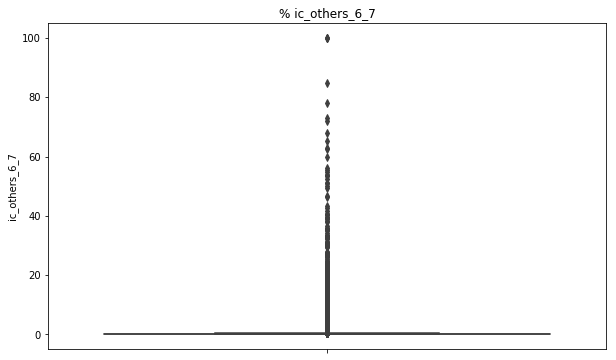

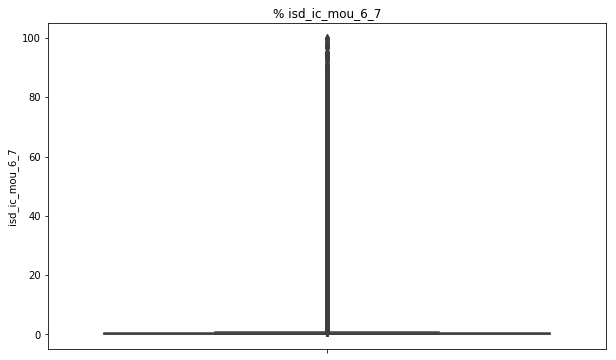

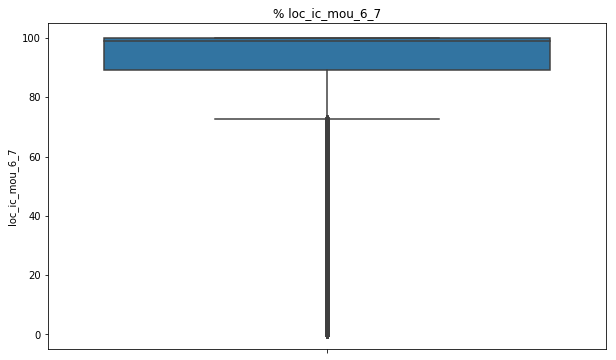

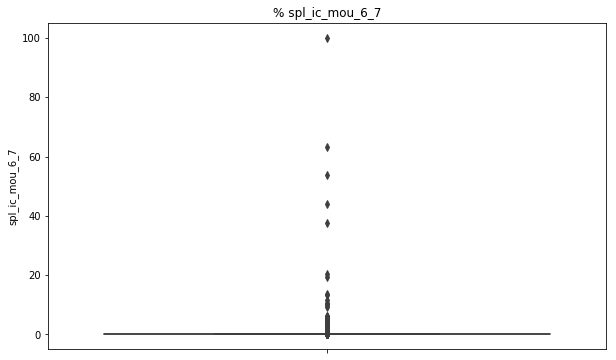

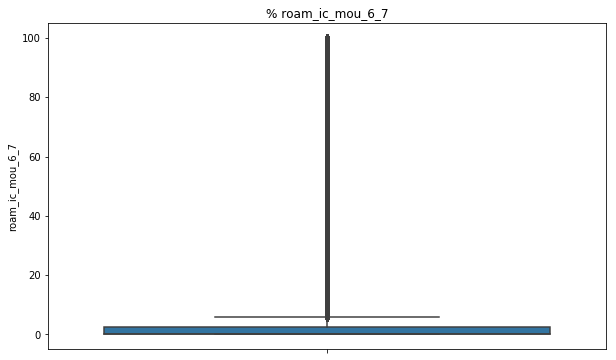

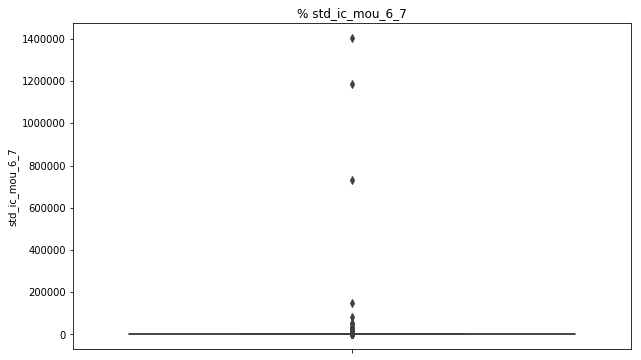

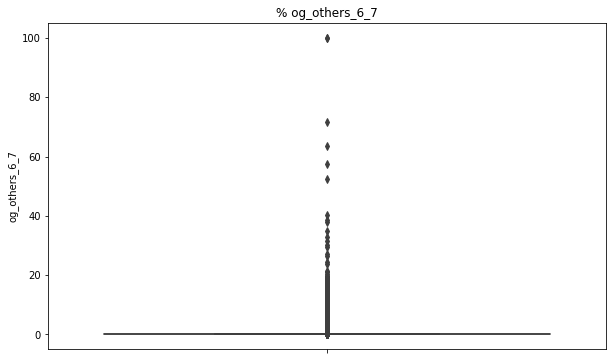

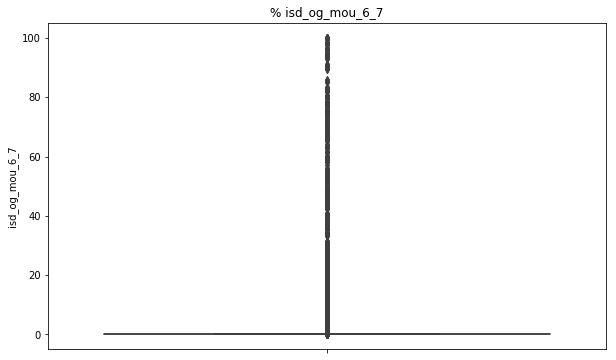

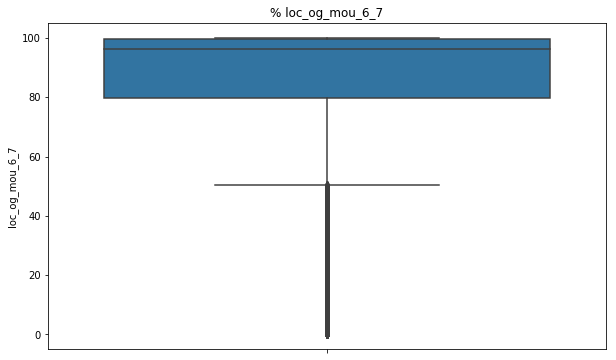

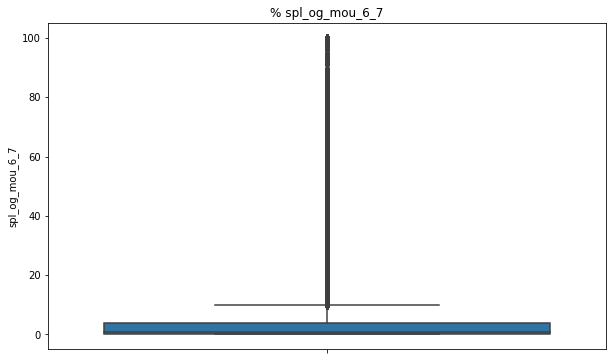

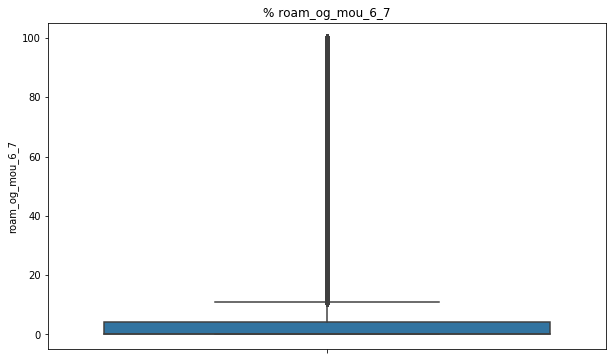

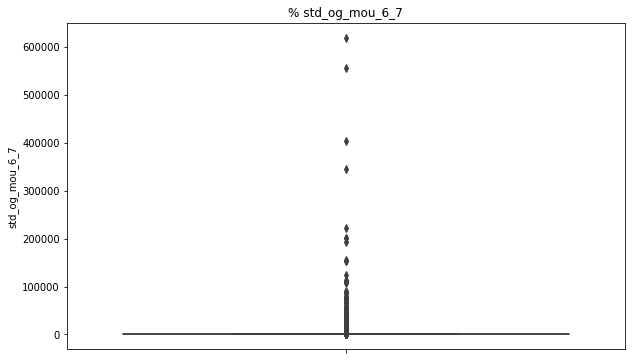

In [43]:
# cols=['ic_others_6_7', 'isd_ic_mou_6_7', 'loc_ic_mou_6_7', 'spl_ic_mou_6_7', 'roam_ic_mou_6_7', 'og_others_6_7', 
#       'isd_og_mou_6_7', 'loc_og_mou_6_7', 'spl_og_mou_6_7', 'roam_og_mou_6_7']

for c in df_good.columns:
    plot_num_variable(c,df_good)

### Merge the good and action phase with churn

In [44]:
df_eda = pd.concat([filtered_data, df_good], axis=1)

In [45]:
# Drop the duplicate columns
df_eda = df_eda.drop(['ic_others_6', 'isd_ic_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6','std_ic_mou_7',
                        'ic_others_7', 
                        'isd_ic_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'roam_ic_mou_7', 'og_others_6', 'isd_og_mou_6', 
                        'loc_og_mou_6', 'spl_og_mou_6', 'roam_og_mou_6', 'og_others_7', 'isd_og_mou_7', 'loc_og_mou_7', 
                        'spl_og_mou_7', 'roam_og_mou_7','std_og_mou_6','std_og_mou_7'],1)

In [46]:
df_eda.head()

loc_og_t2c_mou_8  std_og_mou_8  ic_others_8  loc_ic_t2f_mou_8  isd_ic_mou_8  loc_ic_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  isd_og_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_ic_mou_8  std_ic_t2m_mou_8  std_ic_t2t_mou_8  std_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  roam_og_mou_8  og_others_8  roam_ic_mou_8  offnet_mou_8  spl_og_mou_8  loc_og_t2t_mou_8  onnet_mou_8  loc_ic_t2m_mou_8  loc_og_t2m_mou_8  loc_ic_t2t_mou_8 date_of_last_rech_8  std_ic_t2f_mou_6  loc_ic_t2m_mou_6  std_og_t2f_mou_6  std_ic_t2m_mou_6  std_og_t2m_mou_6  loc_ic_t2t_mou_6  std_ic_t2t_mou_6  loc_ic_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2m_mou_6  loc_og_t2t_mou_6  loc_og_t2f_mou_6  offnet_mou_6  onnet_mou_6  std_og_t2t_mou_6  onnet_mou_7  std_og_t2t_mou_7  offnet_mou_7  std_og_t2f_mou_7  std_ic_t2f_mou_7  loc_og_t2t_mou_7  std_ic_t2t_mou_7  std_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_og_t2c_mou_7  std_og_t2m_mou_7  loc_og_t2f_mou_7  loc_ic_t2m_mou_7  loc_og_t2m_mou_7  loc_ic_t2t_mou_7 date_of_last_rech_7  \
7               0.00         77.84        15.14             39.53         31.59        188.04             22.21           0.0         10.01        255.79             16.68        193.94            141.33             30.39             49.14             53.23             12.01          38.06          0.0          31.64        325.91          6.50             40.28        52.29            121.19            162.28             27.31           8/26/2014             52.19            217.56              6.66             91.44             49.89             58.14             36.89            152.16               0.0            308.63             51.39             62.13        453.43        57.84              4.30        54.68             23.29        567.16             20.08             34.24             31.38             11.83            126.99            101.46               0.0             31.76             55.14            221.49            447.38             32.26           7/25/2014   
8               7.15         98.28         0.00              0.00          0.00         15.79              0.00           0.0          0.00         63.04              0.00          0.75              0.65              0.10             75.69              0.00             22.58           0.00          0.0           0.00        136.48         10.23             12.49        35.08             15.48             50.54              0.31           8/30/2014              0.00             57.58              0.00             22.43             13.69             23.84              0.00              0.00               0.0             80.96            297.13              0.00         94.66       413.69            116.56       351.03            133.43         80.63              0.00              0.00            217.59              0.58              4.08              0.00               0.0             10.04              0.00             13.98             70.58              9.84           7/31/2014   
13              0.49        655.18        21.44              7.49        393.39        255.26              1.91           0.0          1.29        353.99              0.00        474.41            317.91            154.58            156.94             23.51            498.23           1.44          0.0          72.11        482.46          4.78             36.01       534.24            195.18            294.46             52.58           8/30/2014              0.00            142.88              0.00            308.13            255.36             67.88            115.68              4.81               0.0            151.13             49.63              4.54        413.31       501.76            446.41       108.39             85.98        119.28              0.00              0.00              6.19             38.29             29.79              0.00               0.0             52.94              0.00             18.53             47.28              7.58           7/22/2014   
16              

In [47]:
df_eda.shape

(29392, 121)

### Remove the outliers

In [48]:
def show_quantile(data):  
    quantile = pd.DataFrame(columns=['col','25','50','75','90','95','99','100','max','min'])
    for col in data.columns:
        _tmp = data[col].quantile([0.25,0.5,0.75,0.9,0.95,0.99,1.0])
        quantile = quantile.append({'col': col, 
                                    '25': str(round(_tmp[0.25],2)), 
                                    '50': str(round(_tmp[0.5],2)),
                                    '75': str(round(_tmp[0.75],2)),
                                    '90': str(round(_tmp[0.9],2)),
                                    '95': str(round(_tmp[0.95],2)),
                                    '99': str(round(_tmp[0.99],2)),
                                    '100': str(round(_tmp[1.0],2)),
                                   'max':max(data[col]),
                                   'min':min(data[col])},ignore_index=True)
    return quantile

show_quantile(df_eda.select_dtypes([np.number]))

col             25            50             75            90            95            99           100           max           min
0      loc_og_t2c_mou_8            0.0           0.0           0.06          4.48          9.41         28.94        351.83  3.518300e+02  0.000000e+00
1          std_og_mou_8           2.19          77.0         485.79       1057.29       1511.55       2768.39      13980.06  1.398006e+04  0.000000e+00
2           ic_others_8            0.0           0.0           0.06          1.26          3.98         21.71       1209.86  1.209860e+03  0.000000e+00
3      loc_ic_t2f_mou_8            0.0          1.96          11.94         37.84         68.49         187.4       1588.53  1.588530e+03  0.000000e+00
4          isd_ic_mou_8            0.0           0.0            0.0          15.4         46.31        249.95       4100.38  4.100380e+03  0.000000e+00
5          loc_ic_mou_8          53.08        146.01         306.26        555.44        773.23       1471.81       5748.81  5.748810e+03  0.000000e+00
6      std_ic_t2f_mou_8            0.0           0.0           0.18          4.04         11.13         49.91       1394.89  1.394890e+03  0.000000e+00
7          spl_ic_mou_8            0.0           0.0            0.0           0.0          0.25          0.61          6.23  6.230000e+00  0.000000e+00
8          isd_og_mou_8            0.0           0.0            0.0           0.0          0.51         30.53       5681.54  5.681540e+03  0.000000e+00
9          loc_og_mou_8          40.66        151.99         351.79        637.82        888.62       1691.27      11039.91  1.103991e+04  0.000000e+00
10     std_og_t2f_mou_8            0.0           0.0            0.0          1.76          7.21         38.91        516.91  5.169100e+02  0.000000e+00
11         std_ic_mou_8           1.63         12.91          44.04        109.34        193.29        576.93       5957.14  5.957140e+03  0.000000e+00
12     std_ic_t2m_mou_8           0.03          5.94          25.83         69.48        123.27         377.8       5645.86  5.645860e+03  0.000000e+00
13     std_ic_t2t_mou_8            0.0          0.65           9.03         32.48         62.21         217.5       4309.29  4.309290e+03  0.000000e+00
14     std_og_t2m_mou_8            0.0         24.86         166.57        532.23        885.17       1891.73      13950.04  1.395004e+04  0.000000e+00
15     loc_og_t2f_mou_8            0.0          0.23           4.76         17.04         31.48         86.73        928.49  9.284900e+02  0.000000e+00
16     std_og_t2t_mou_8            0.0          6.38         135.94        572.24        936.77       1934.88       8014.43  8.014430e+03  0.000000e+00
17        roam_og_mou_8            0.0           0.0            0.0         37.95        115.82        433.71       5337.04  5.337040e+03  0.000000e+00
18          og_others_8            0.0           0.0            0.0           0.0           0.0           0.0        394.93  3.949300e+02  0.000000e+00
19        roam_ic_mou_8            0.0           0.0            0.0         19.14         63.72        289.87       4169.81  4.169810e+03  0.000000e+00
20         offnet_mou_8         100.13        244.74         485.86        855.67       1187.02       2190.26      14007.34  1.400734e+04  0.000000e+00
21         spl_og_mou_8            0.0          0.56           6.48         18.23         30.38          74.2       1390.88  1.390880e+03  0.000000e+00
22     loc_og_t2t_mou_8           6.28         29.44          86.06        198.85        327.77        965.98      10752.56  1.075256e+04  0.000000e+00
23          onnet_mou_8          28.85        102.22         302.52        728.83       1116.08       2178.55      10752.56  1.075256e+04  0.000000e+00
24     loc_ic_t2m_mou_8          31.54         91.94         199.54        363.88        521.43        983.63       5738.46  5.738460e+03  0.000000e+00
25     loc_og_t2m_mou_8          24.14         92.54         226.24 

In [49]:
# the difference in 95 and 99 is high so lets keep the outer range till 99 to avoid loss of data
Q1 = df_eda.quantile(0.05)
Q3 = df_eda.quantile(0.99)
IQR = Q3-Q1 #Interquartile range
df_eda = df_eda[~((df_eda < (Q1 - 1.5 * IQR)) |(df_eda > (Q3 + 1.5 * IQR))).any(axis=1)]

In [50]:
df_eda.dtypes

loc_og_t2c_mou_8       float64
std_og_mou_8           float64
ic_others_8            float64
loc_ic_t2f_mou_8       float64
isd_ic_mou_8           float64
loc_ic_mou_8           float64
std_ic_t2f_mou_8       float64
spl_ic_mou_8           float64
isd_og_mou_8           float64
loc_og_mou_8           float64
std_og_t2f_mou_8       float64
std_ic_mou_8           float64
std_ic_t2m_mou_8       float64
std_ic_t2t_mou_8       float64
std_og_t2m_mou_8       float64
loc_og_t2f_mou_8       float64
std_og_t2t_mou_8       float64
roam_og_mou_8          float64
og_others_8            float64
roam_ic_mou_8          float64
offnet_mou_8           float64
spl_og_mou_8           float64
loc_og_t2t_mou_8       float64
onnet_mou_8            float64
loc_ic_t2m_mou_8       float64
loc_og_t2m_mou_8       float64
loc_ic_t2t_mou_8       float64
date_of_last_rech_8     object
std_ic_t2f_mou_6       float64
loc_ic_t2m_mou_6       float64
std_og_t2f_mou_6       float64
std_ic_t2m_mou_6       float64
std_og_t

In [51]:
# convert type date column from object to datetime
cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

df_eda[cols] =df_eda[cols].apply(pd.to_datetime, format='%m/%d/%Y')

### Box Plot with churn rate

In [52]:
def plot_num_variable(col_name,df):
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(y=col_name, x='churn', data=df, orient='v')
    plt.title('% '+col_name)
    plt.xticks(rotation=90)

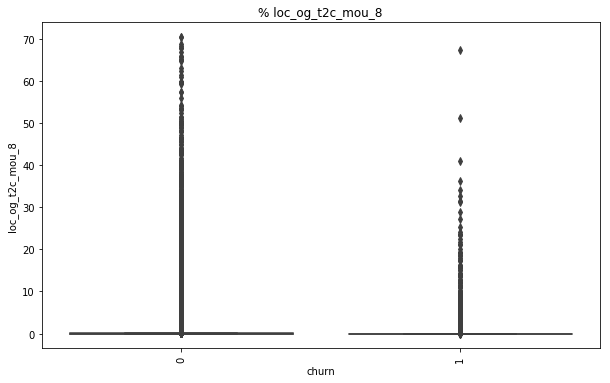

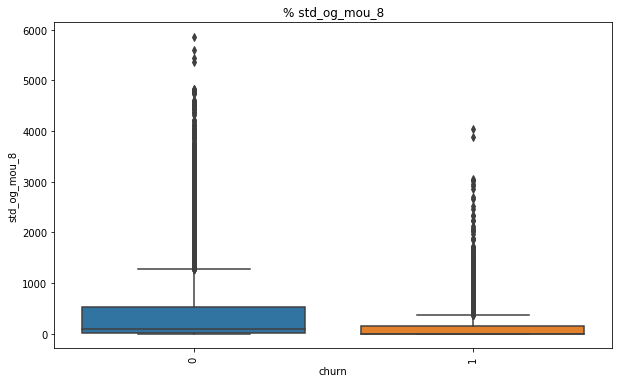

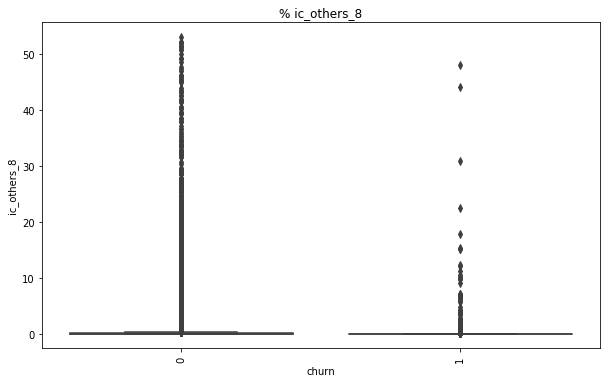

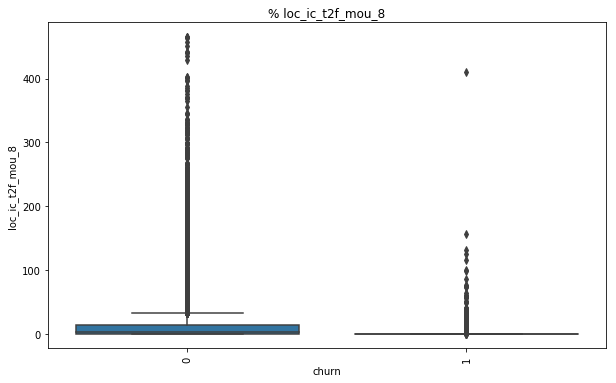

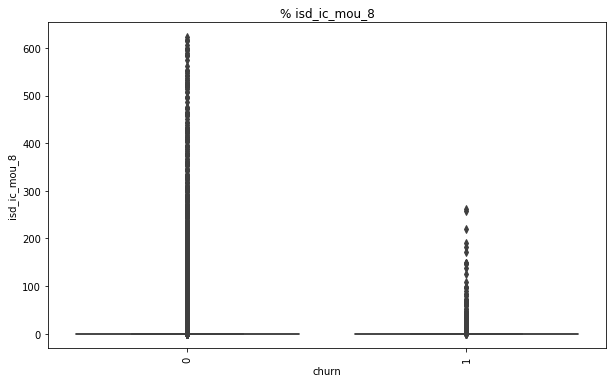

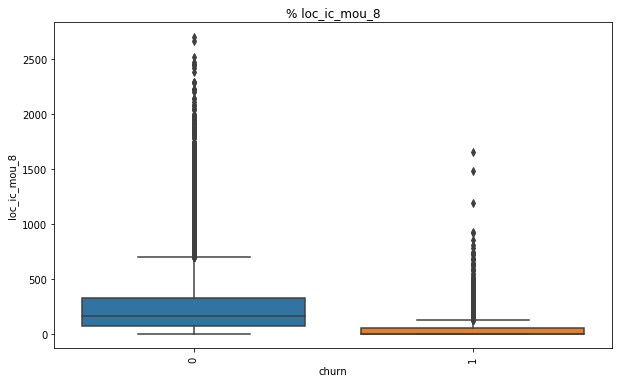

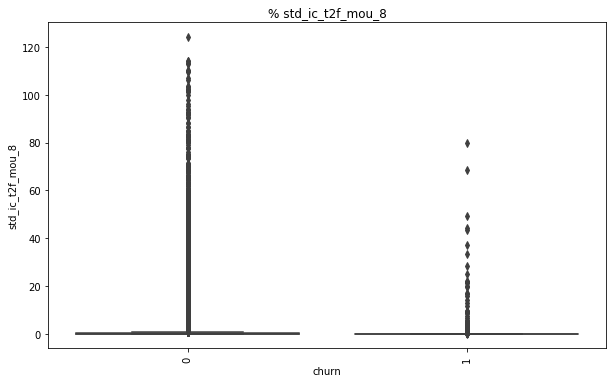

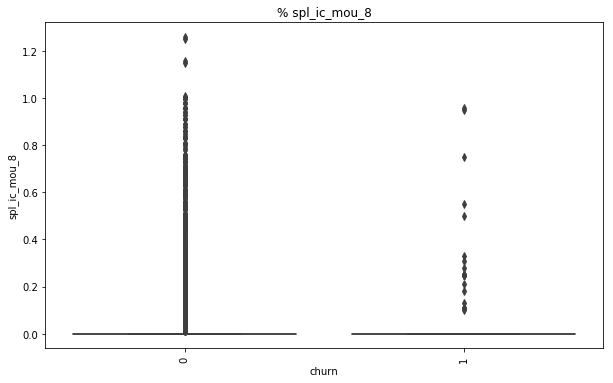

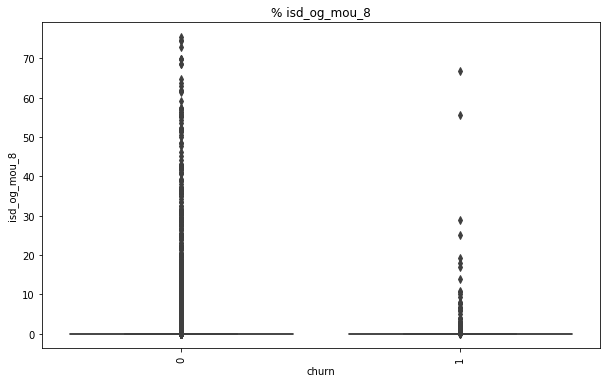

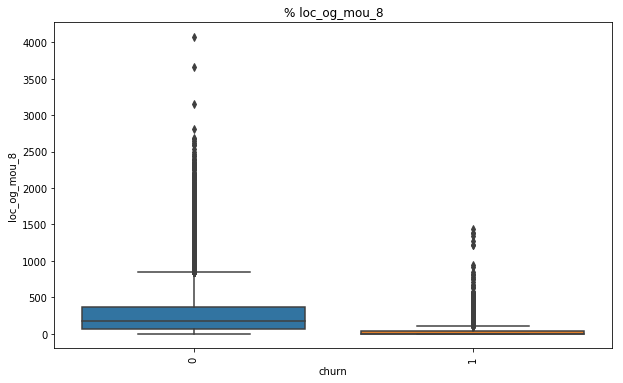

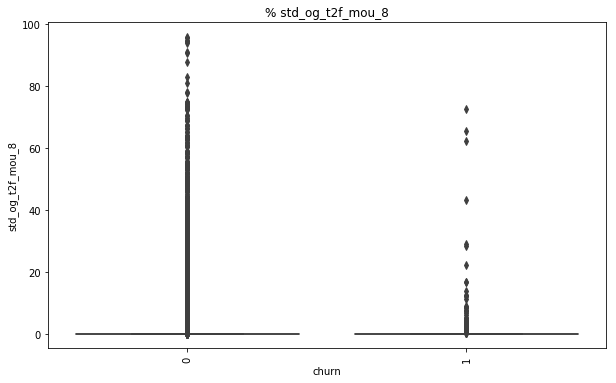

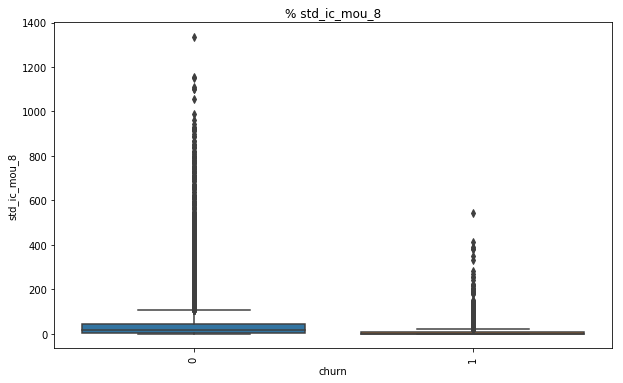

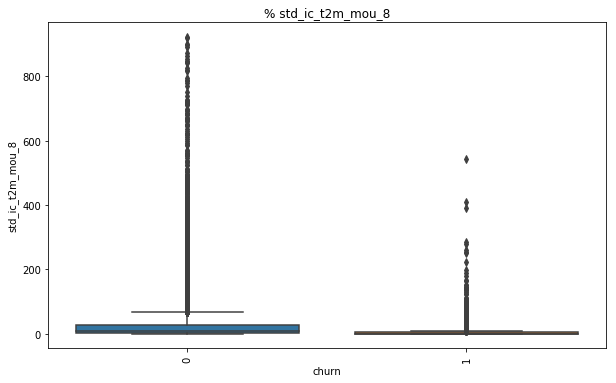

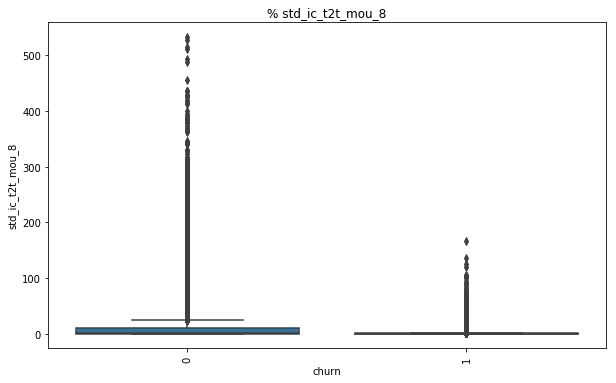

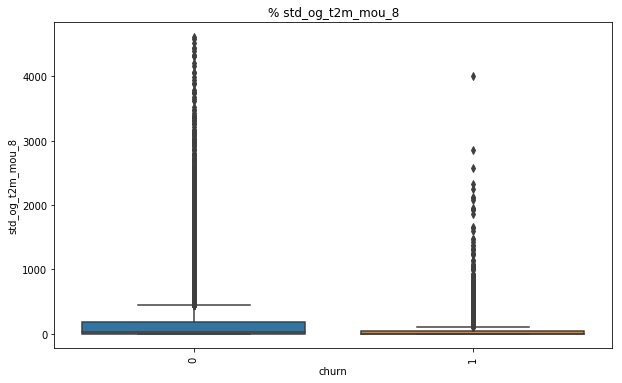

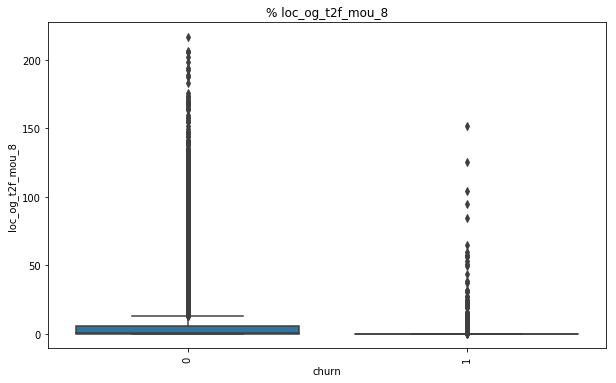

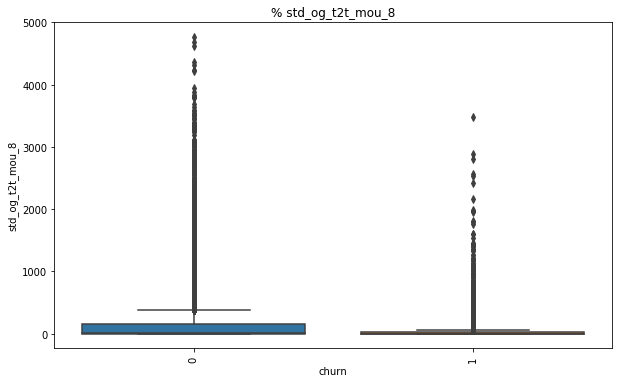

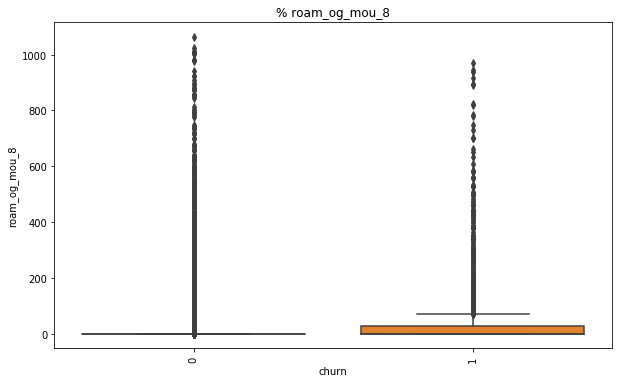

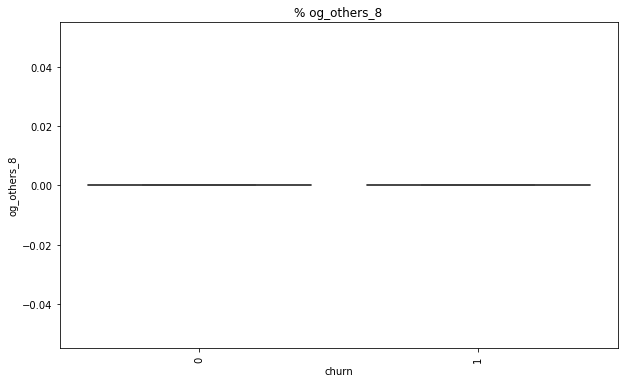

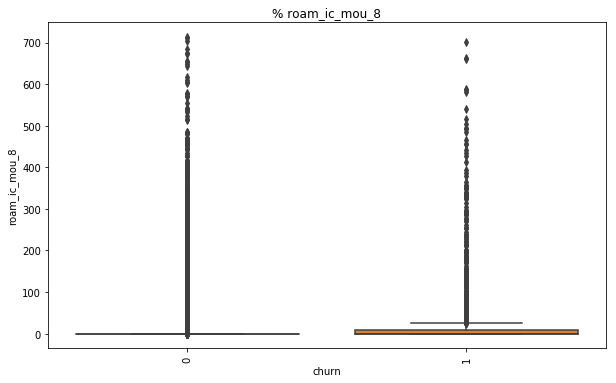

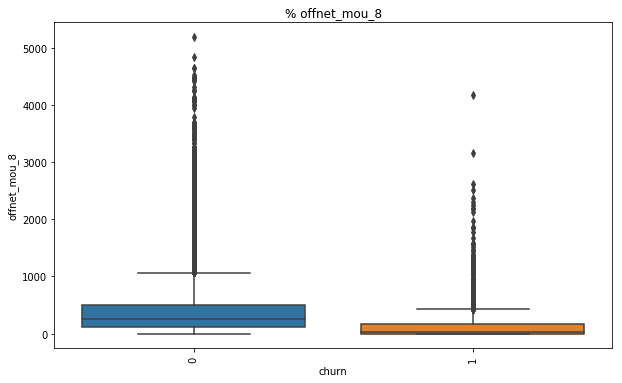

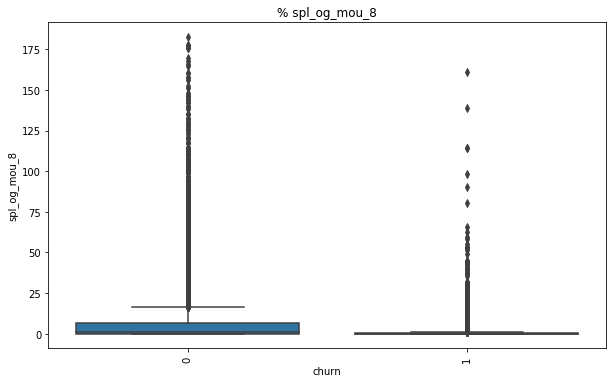

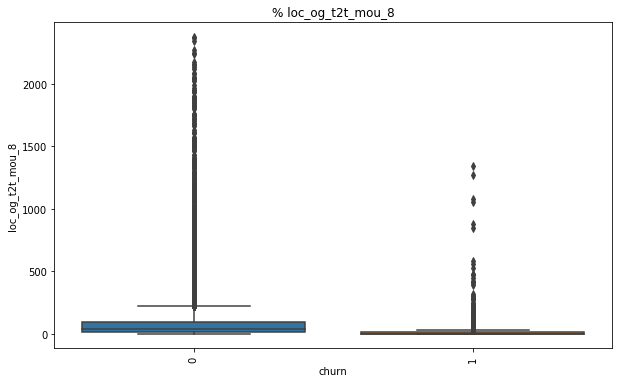

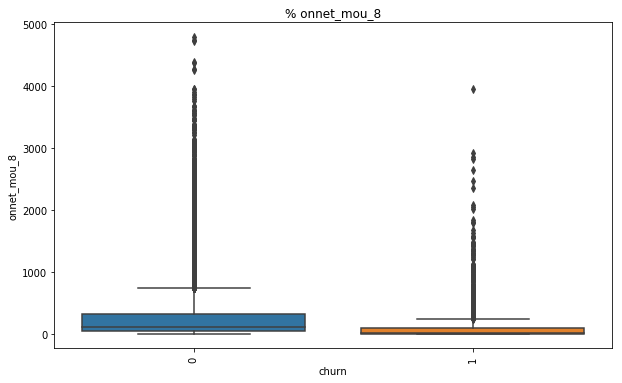

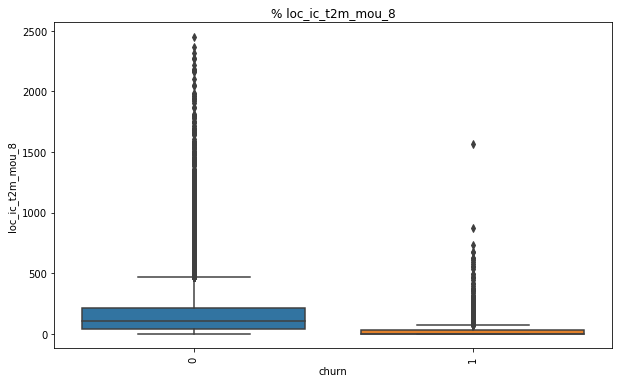

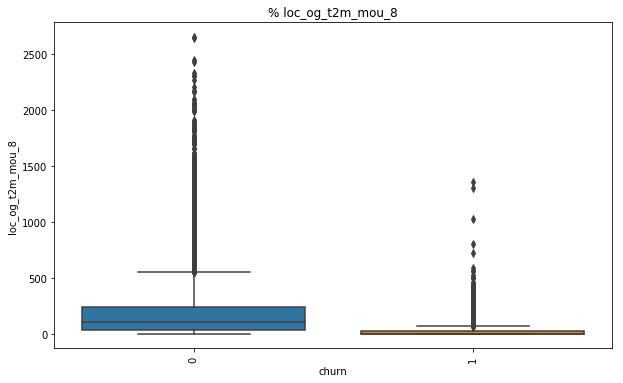

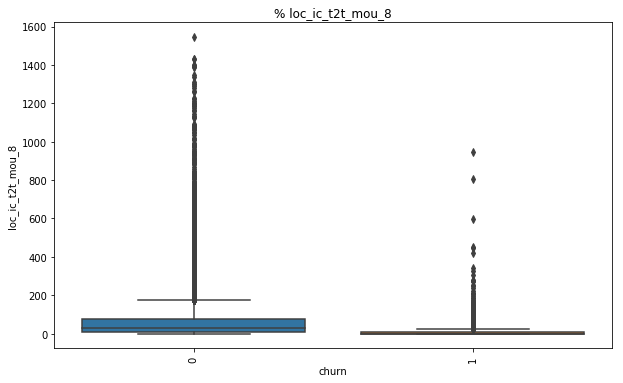

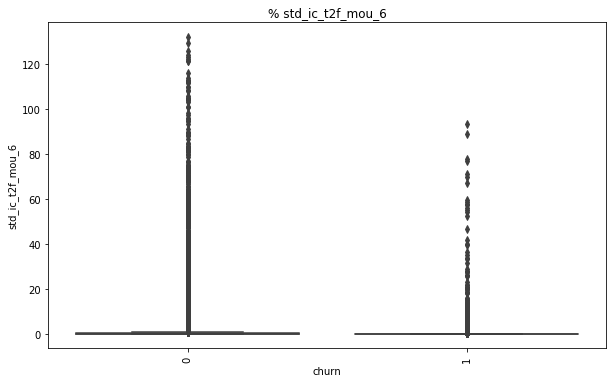

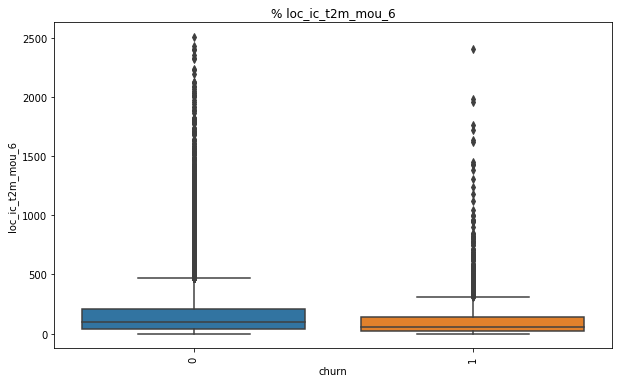

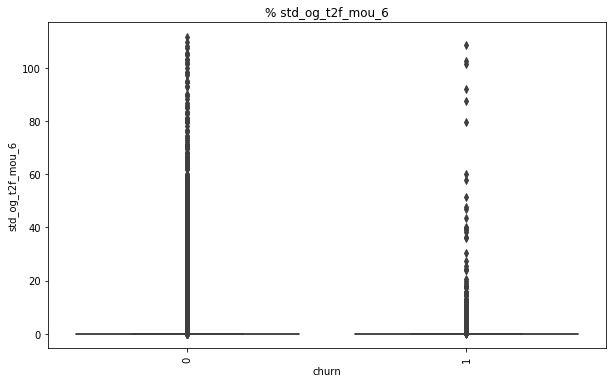

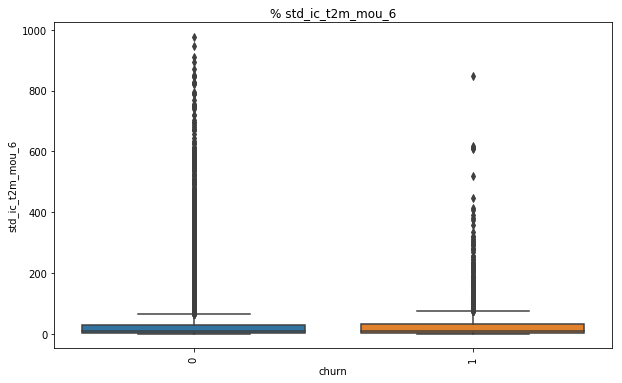

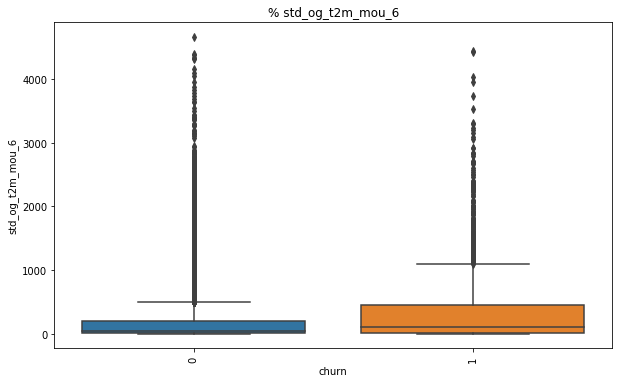

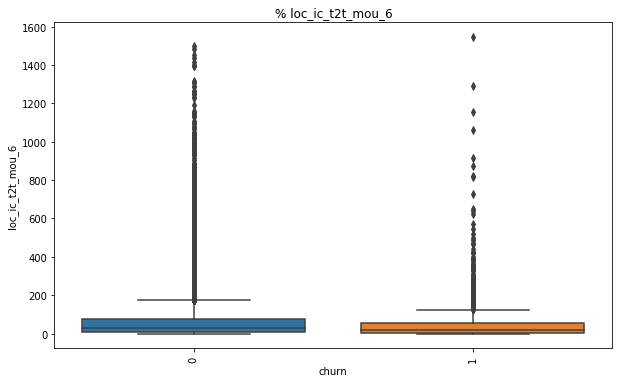

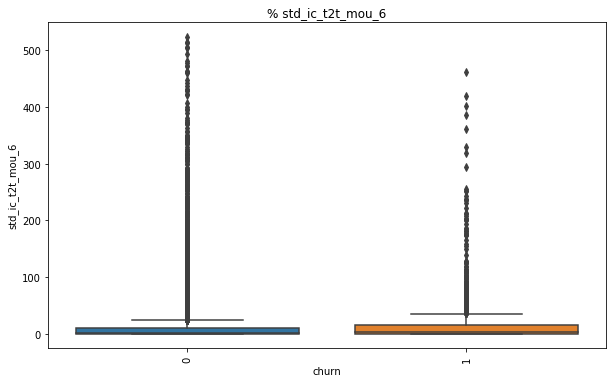

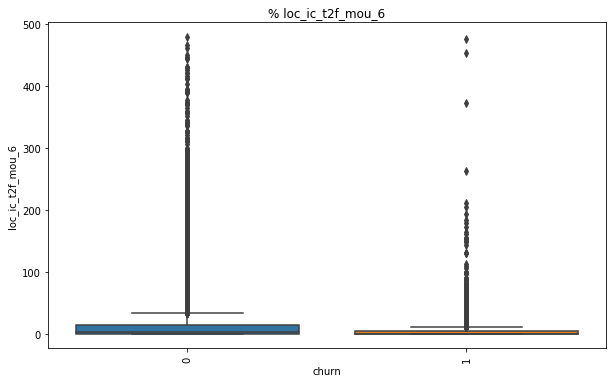

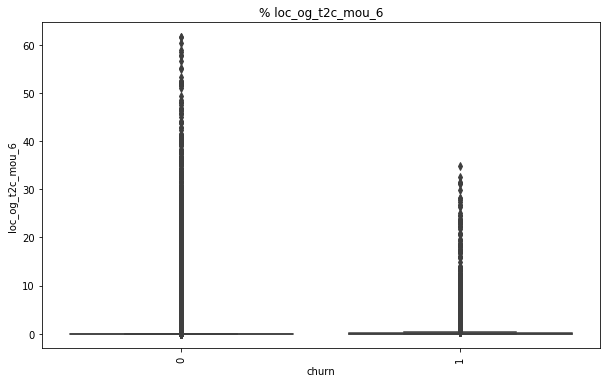

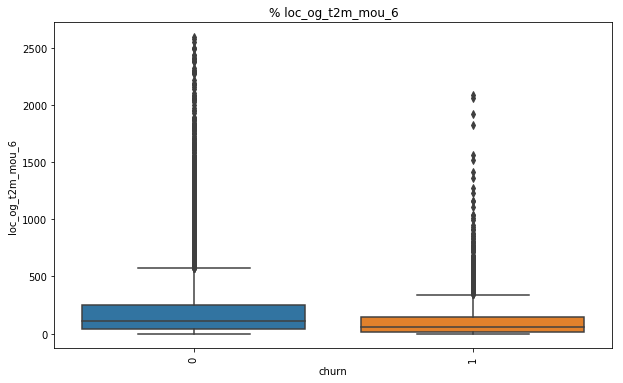

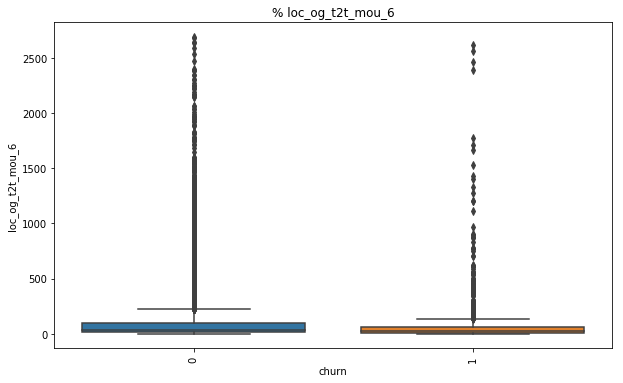

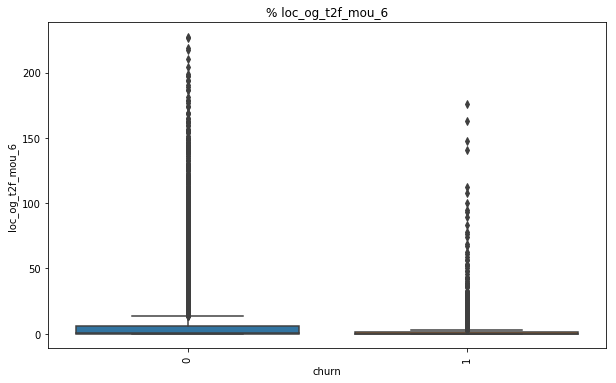

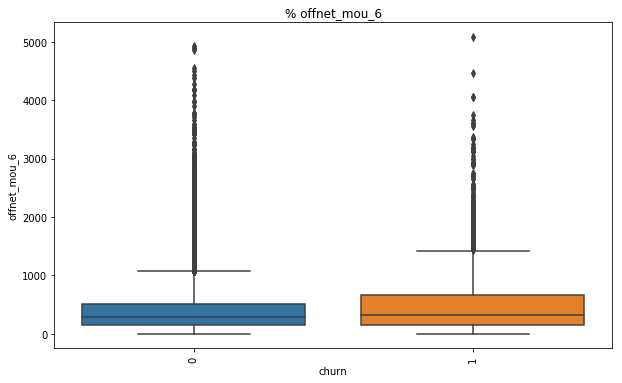

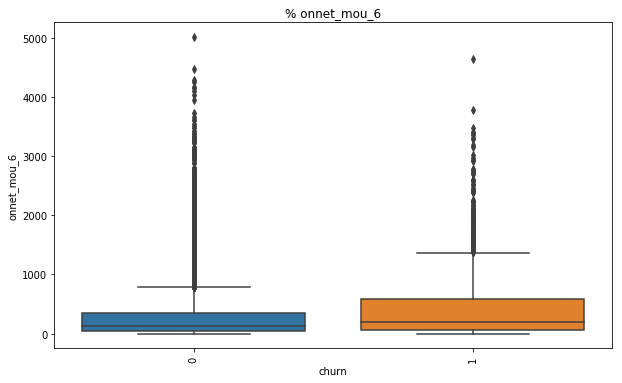

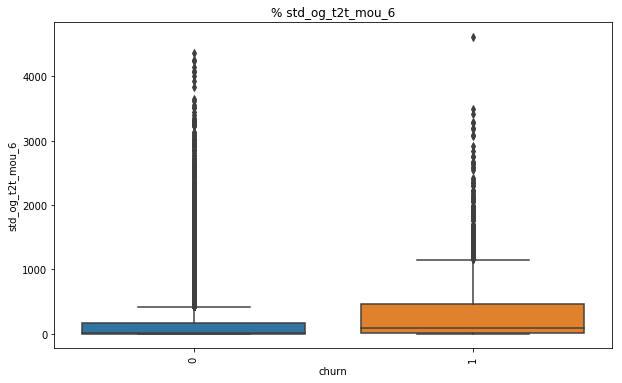

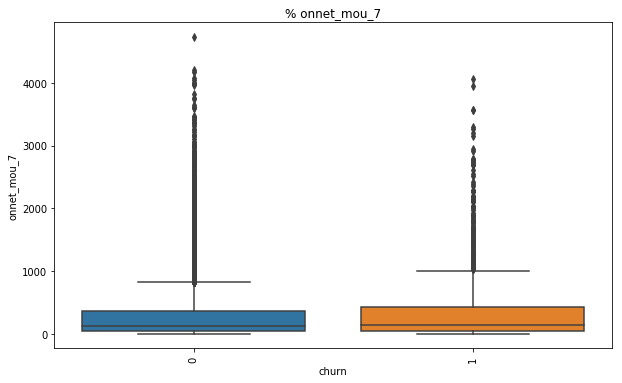

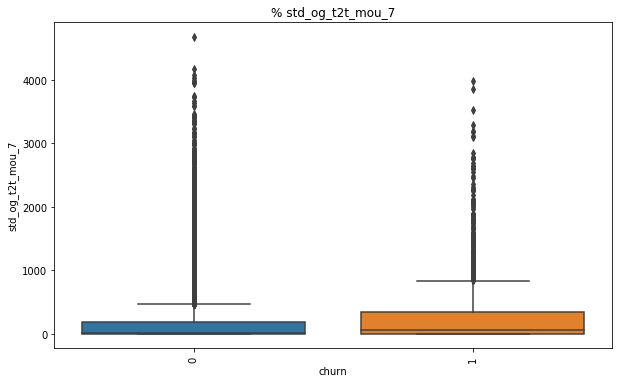

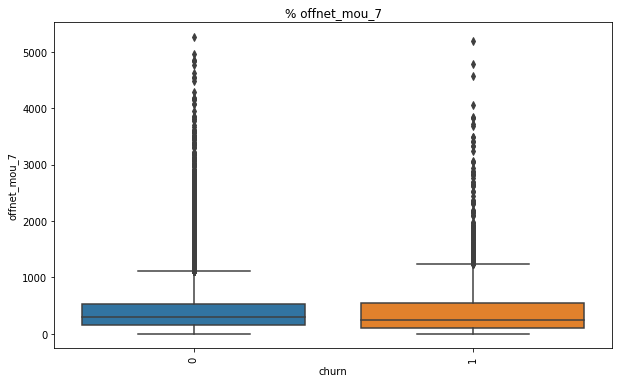

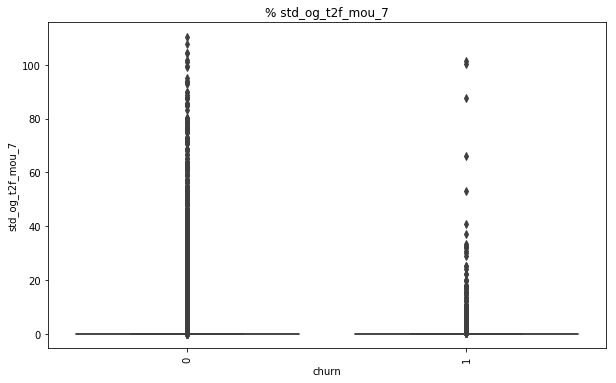

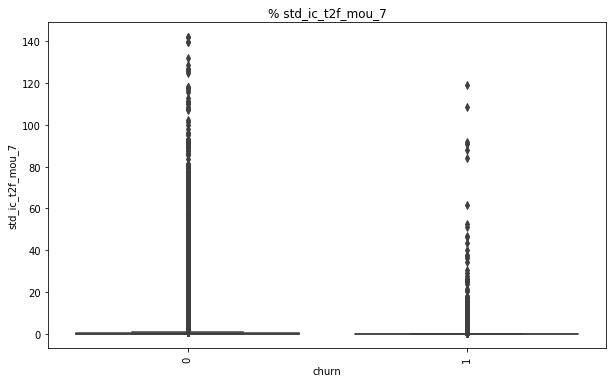

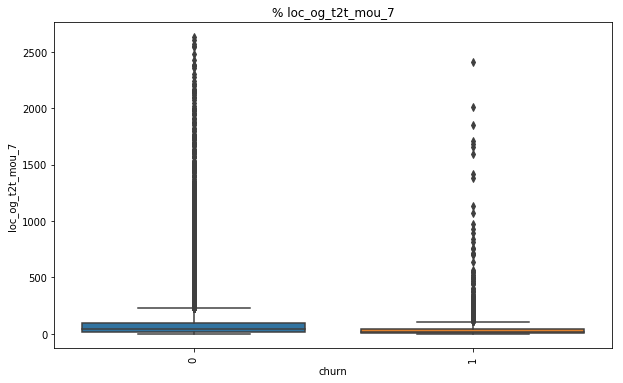

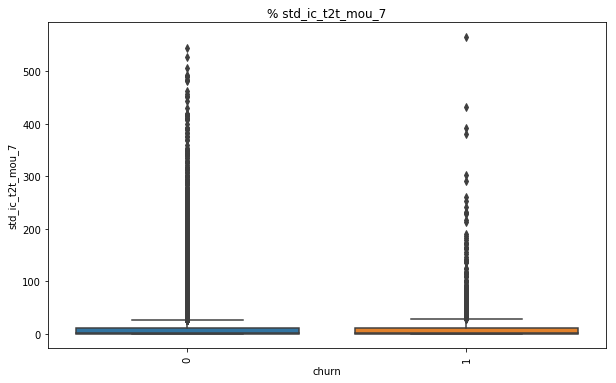

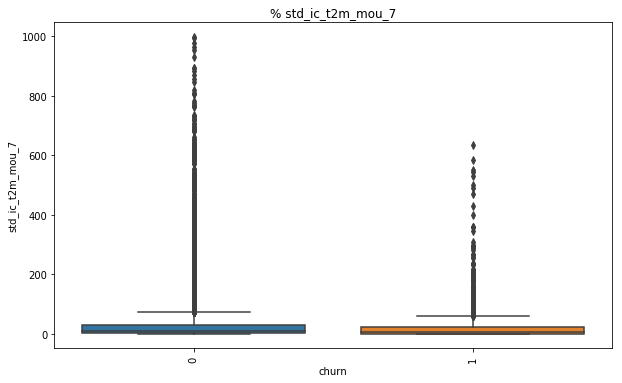

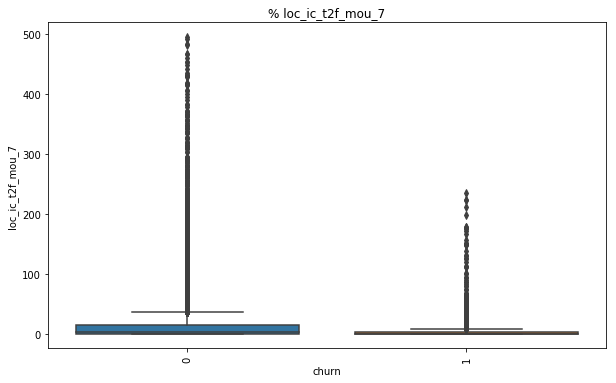

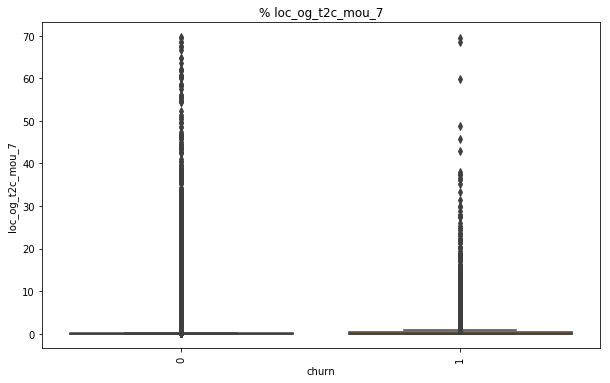

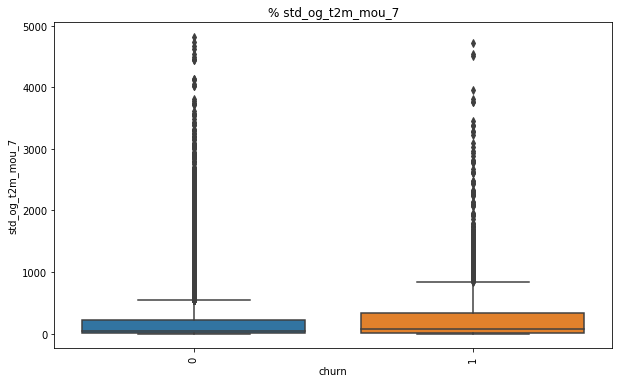

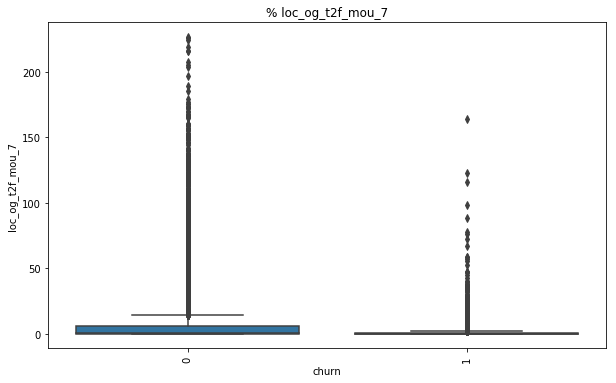

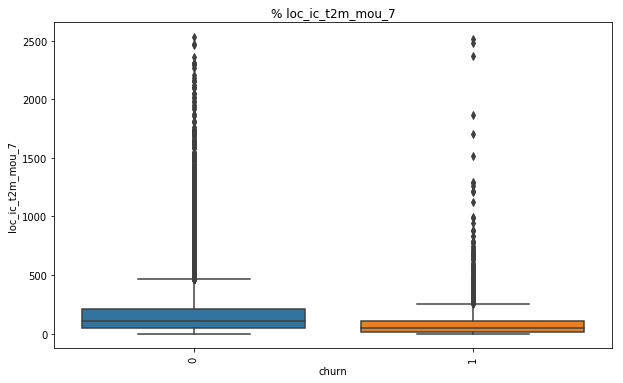

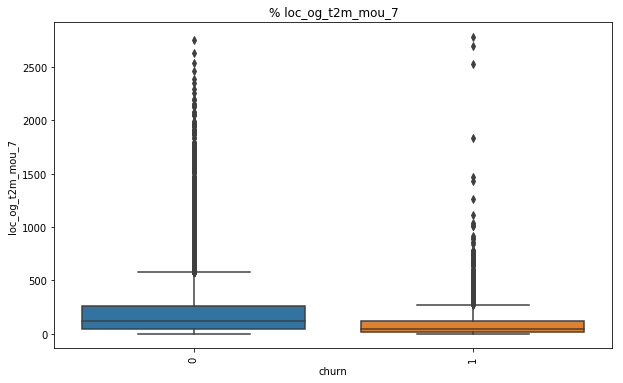

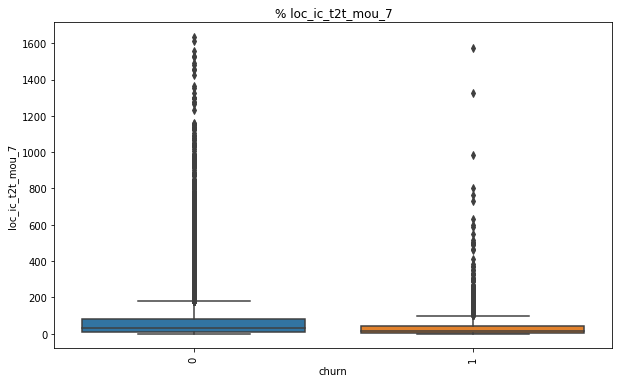

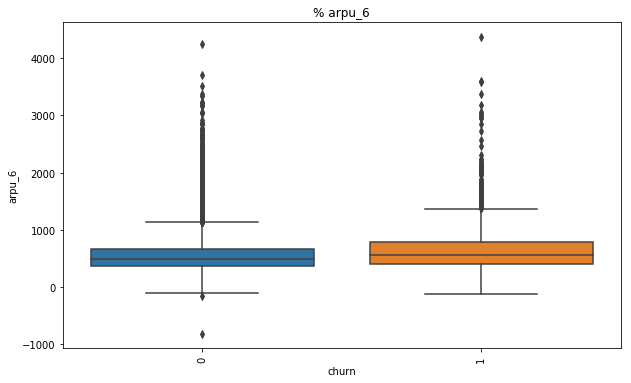

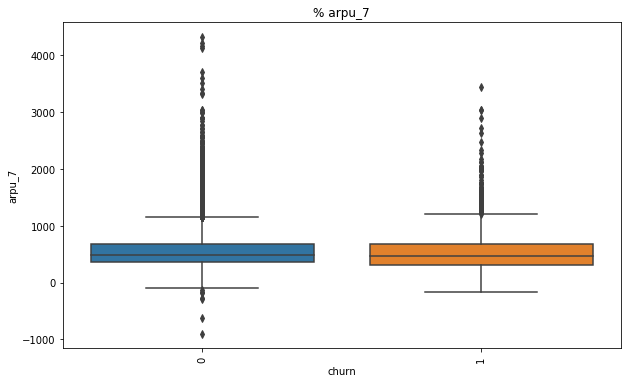

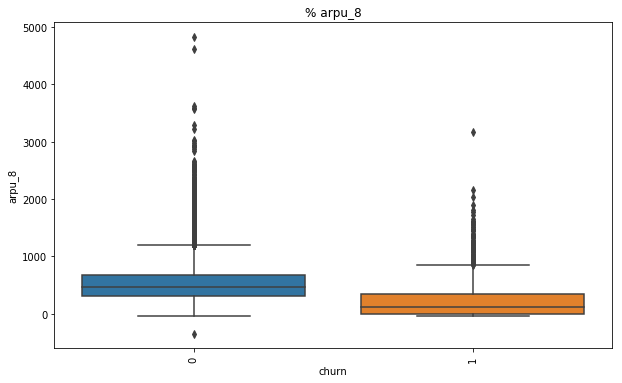

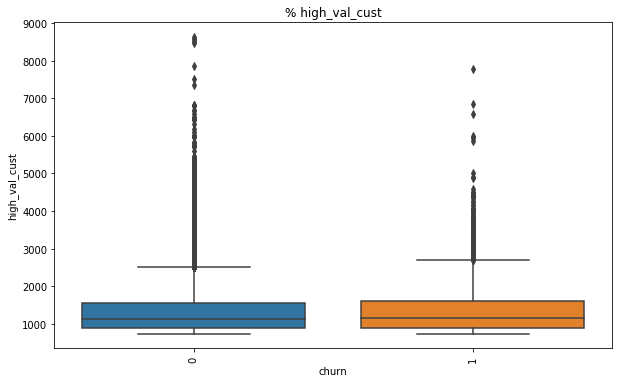

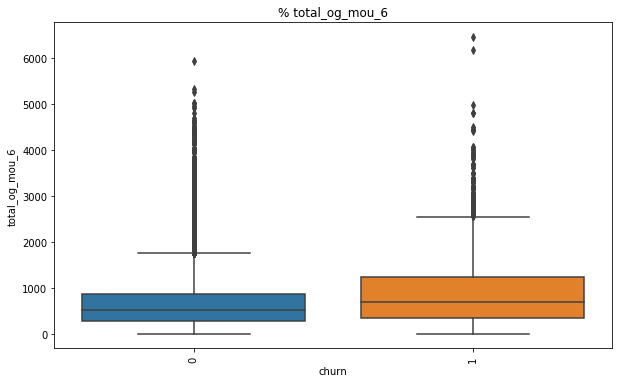

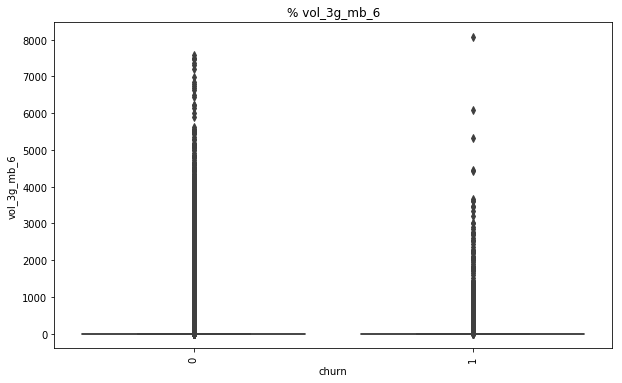

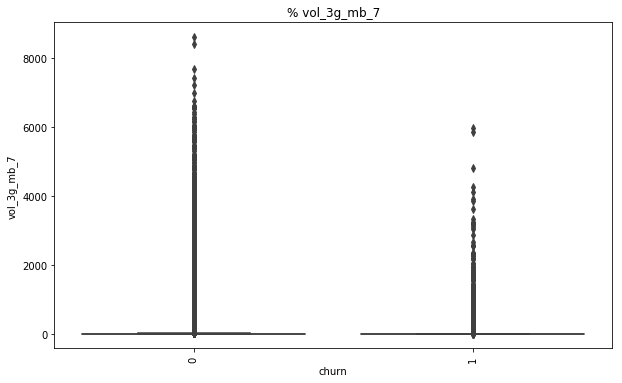

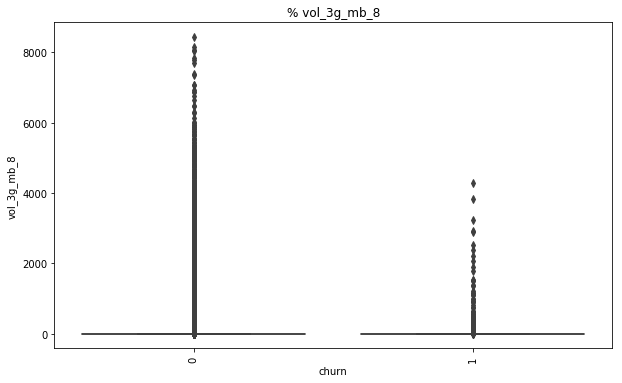

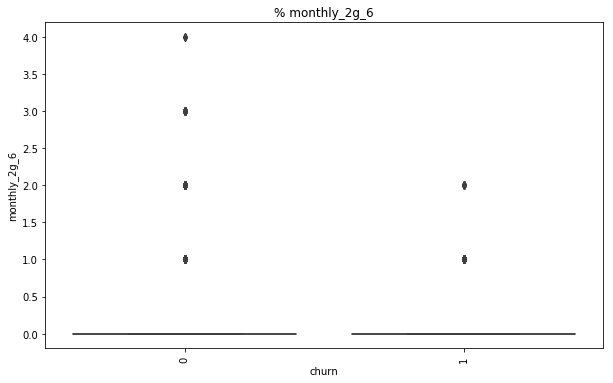

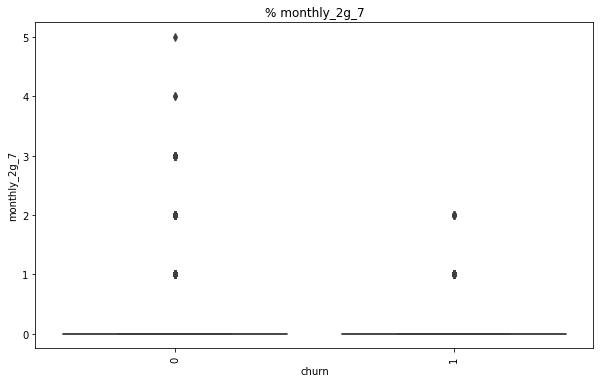

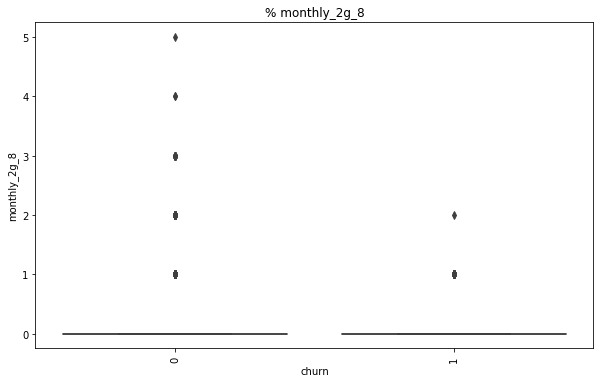

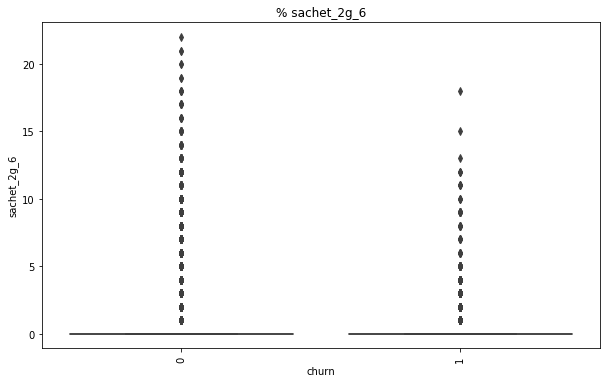

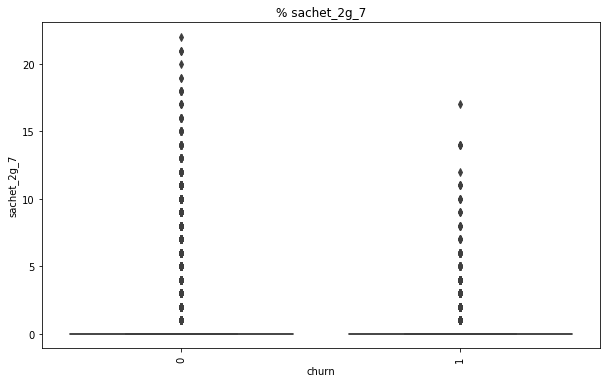

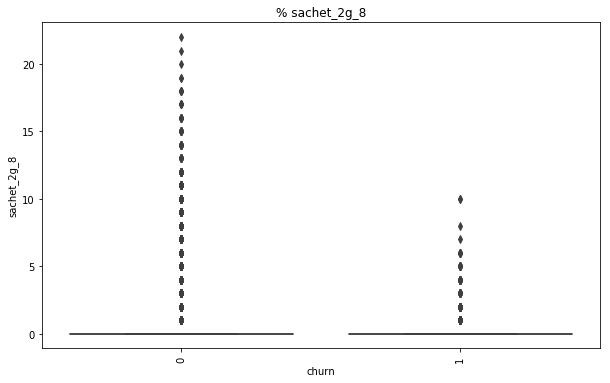

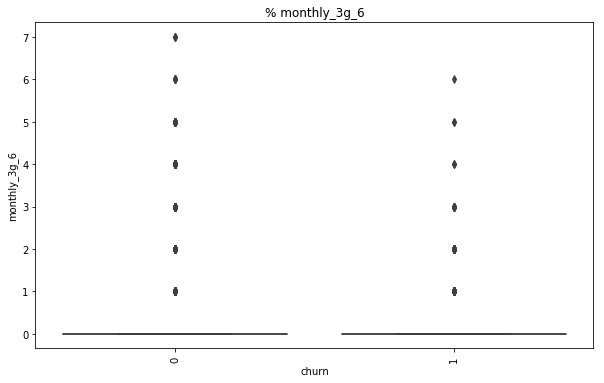

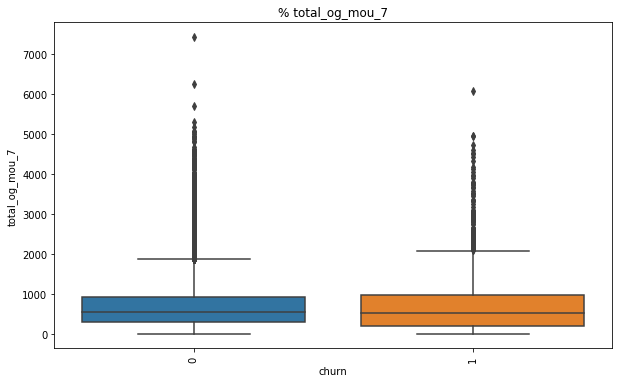

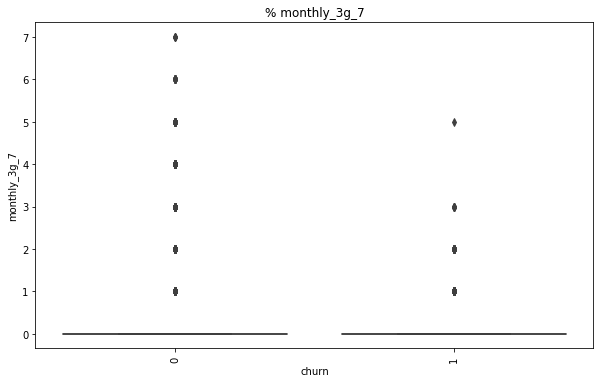

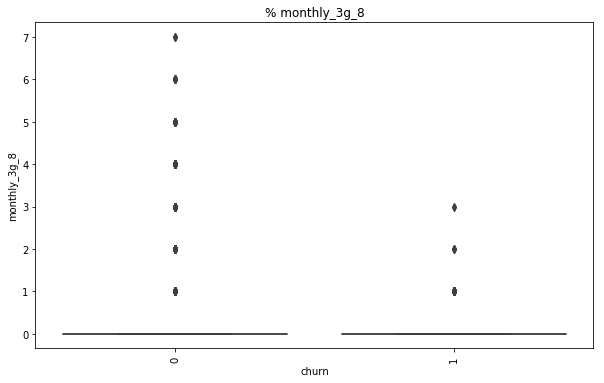

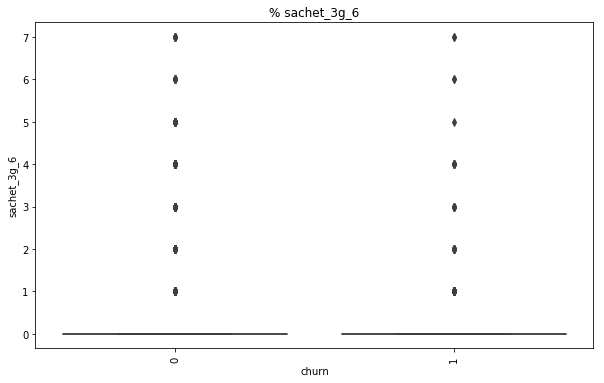

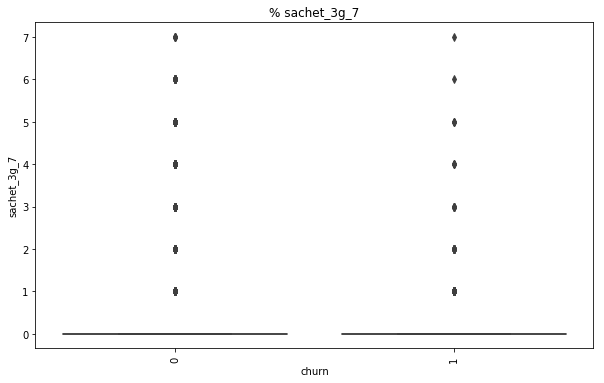

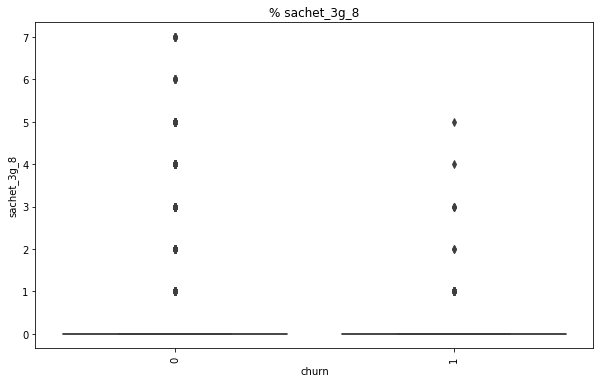

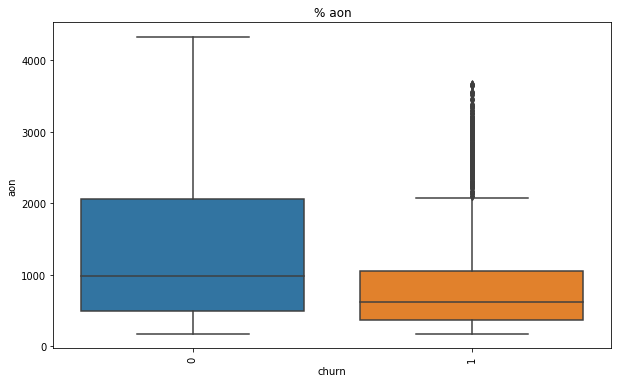

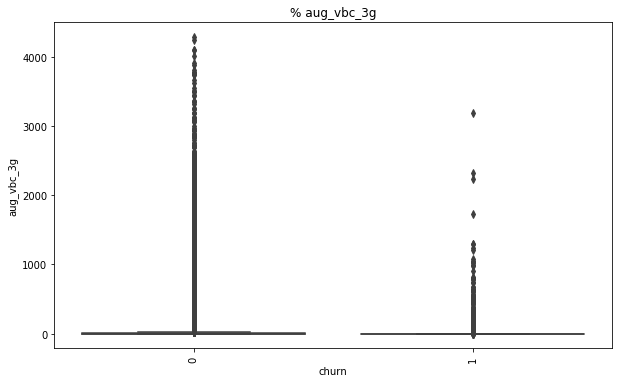

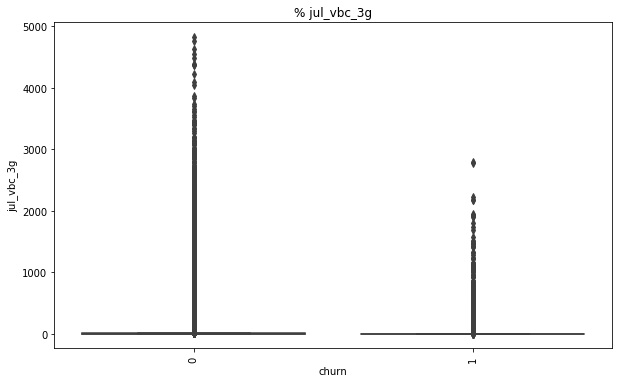

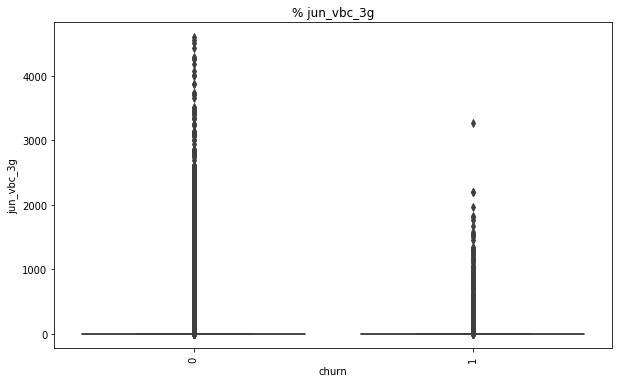

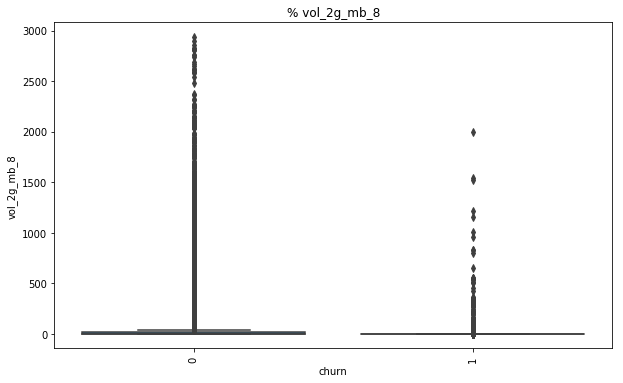

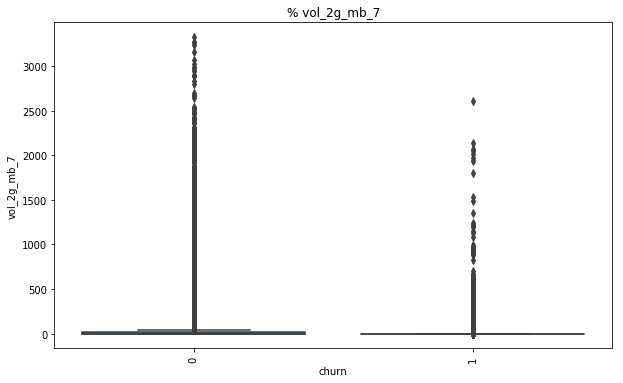

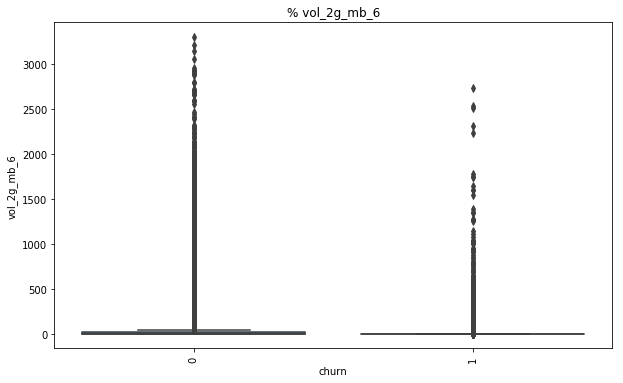

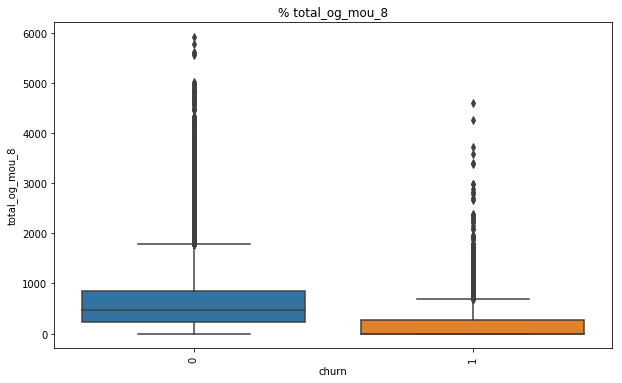

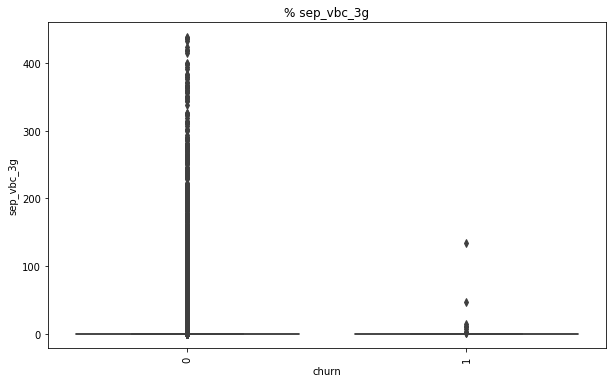

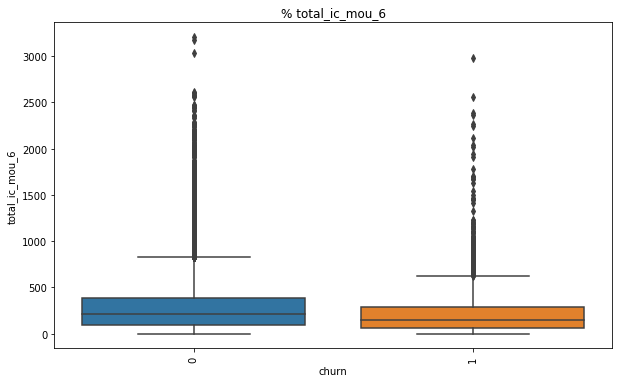

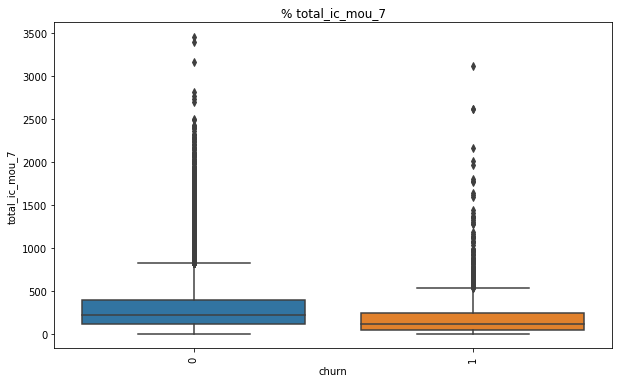

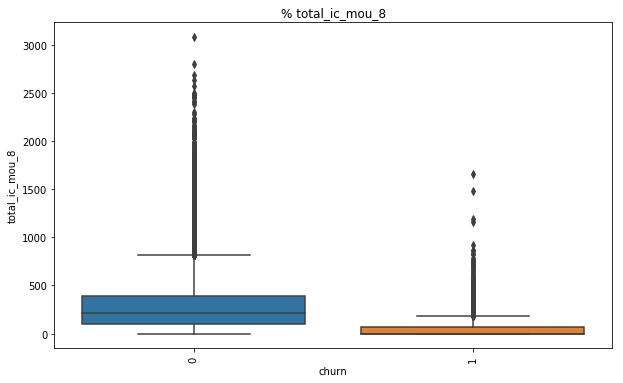

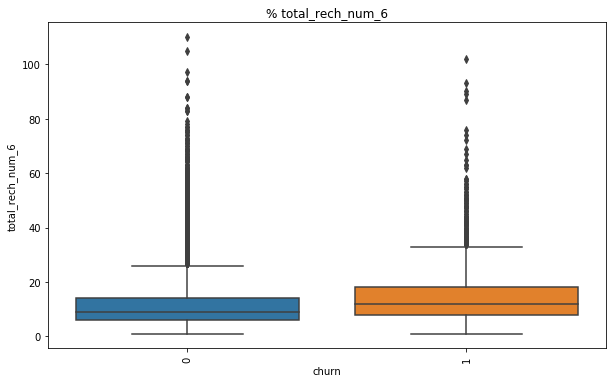

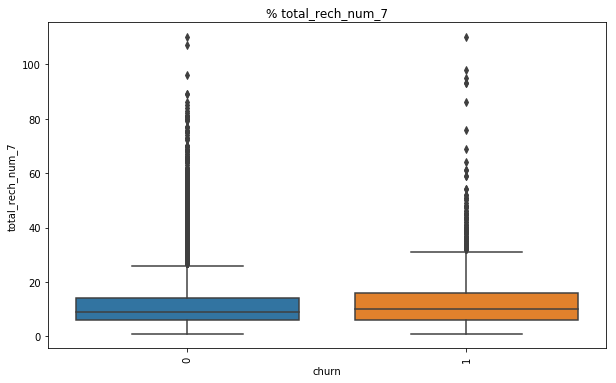

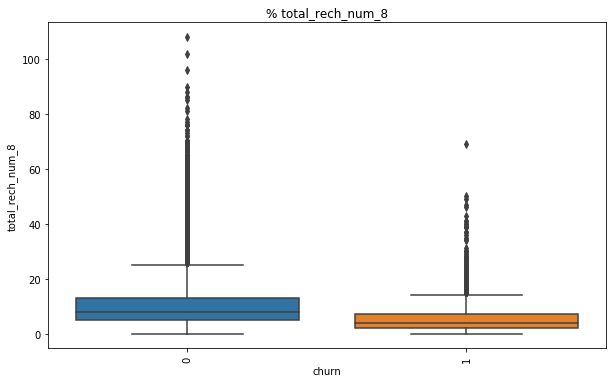

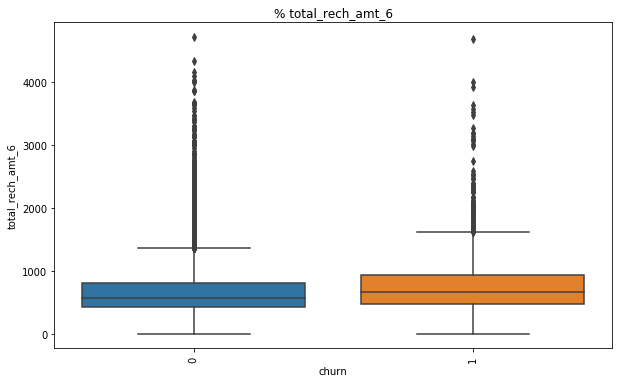

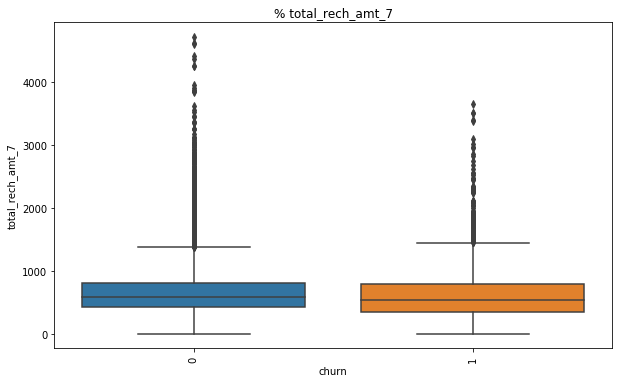

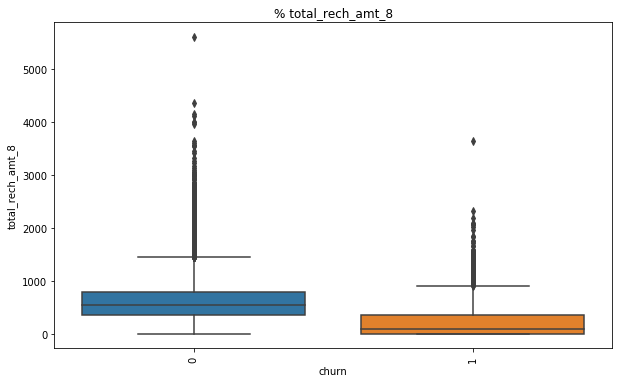

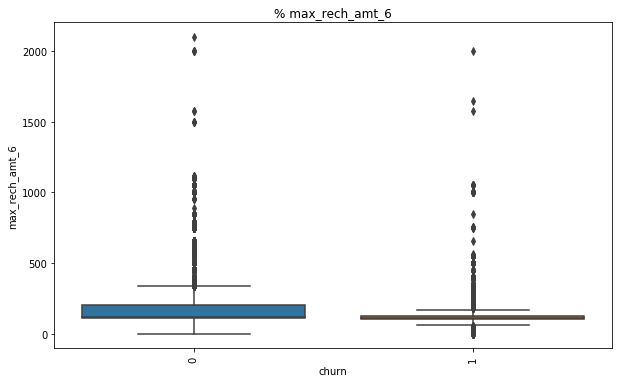

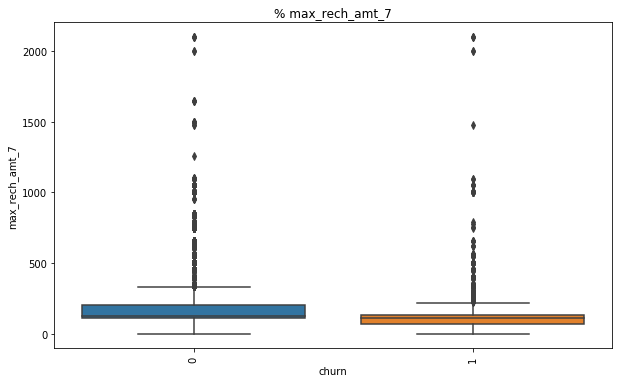

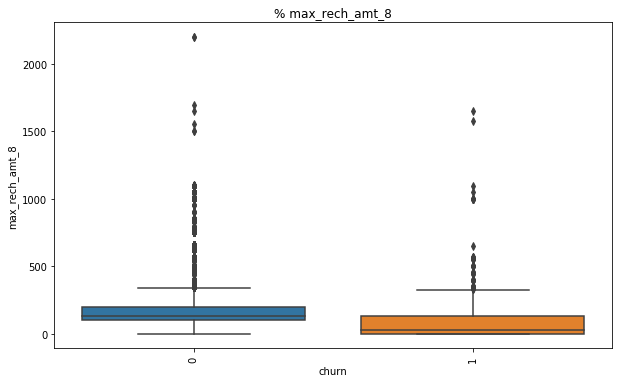

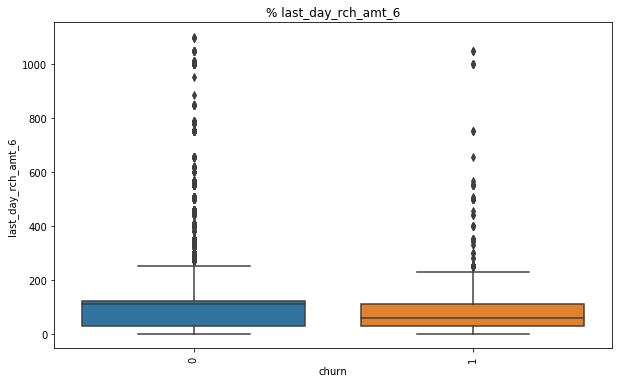

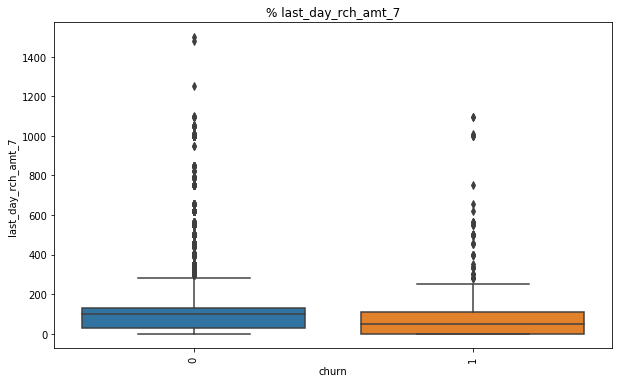

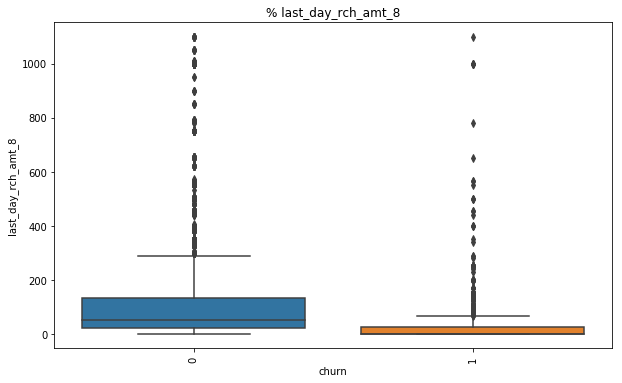

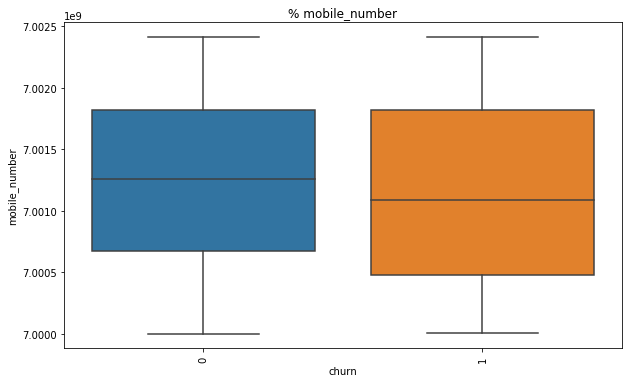

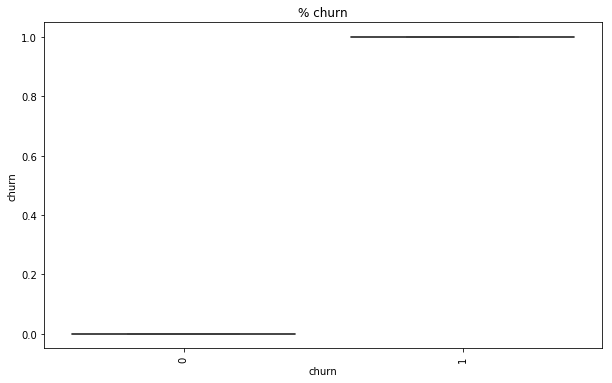

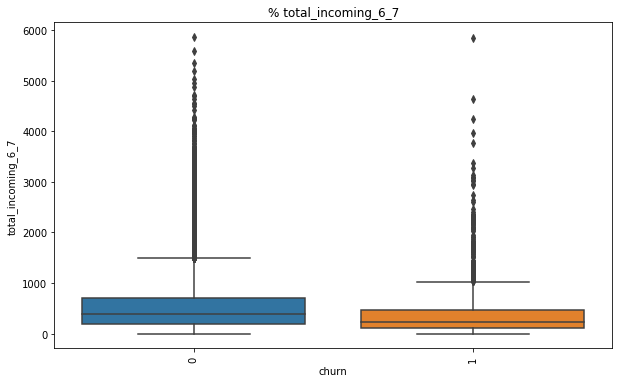

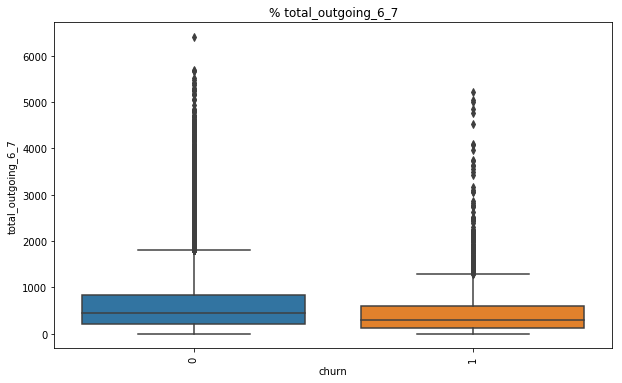

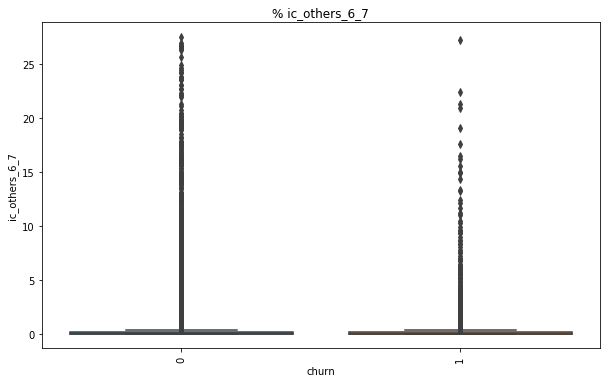

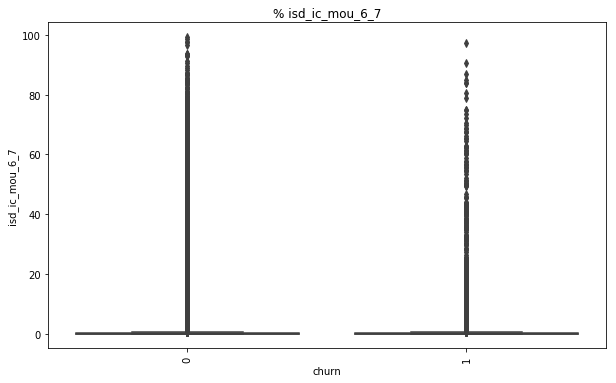

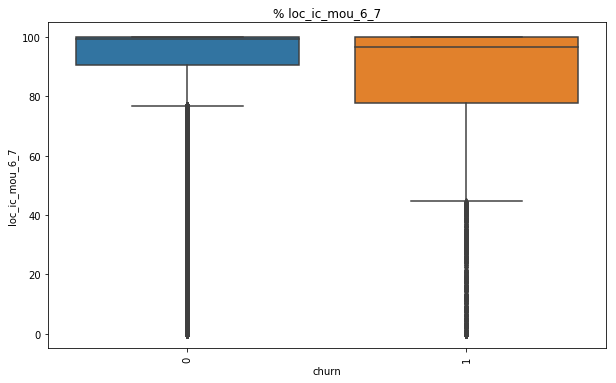

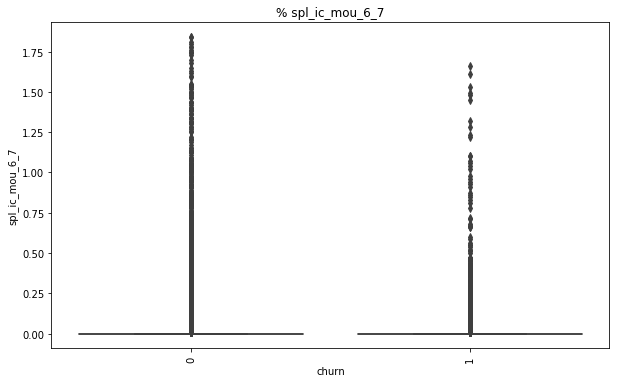

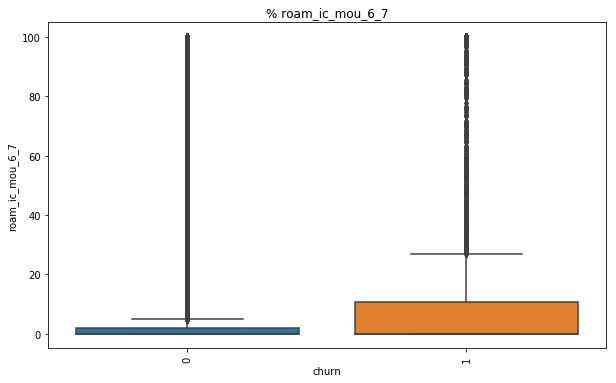

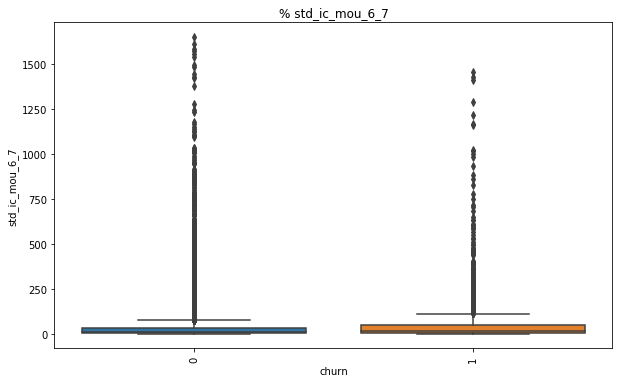

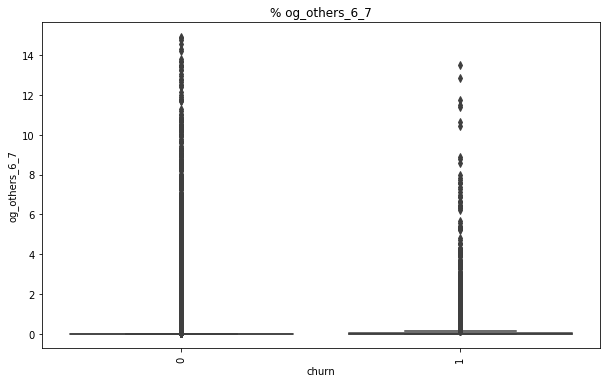

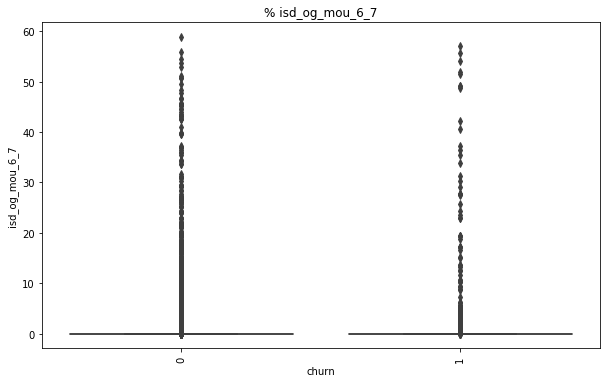

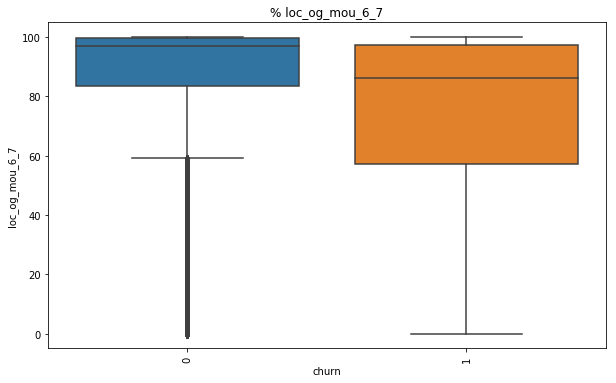

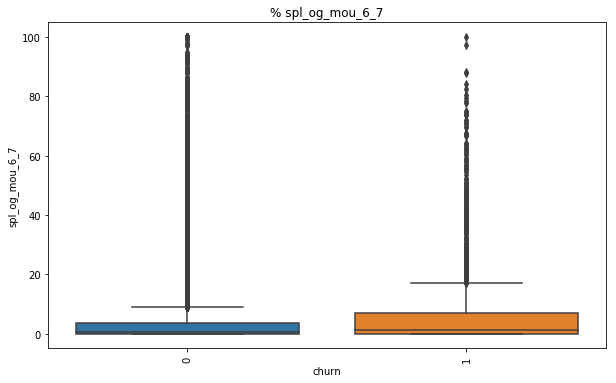

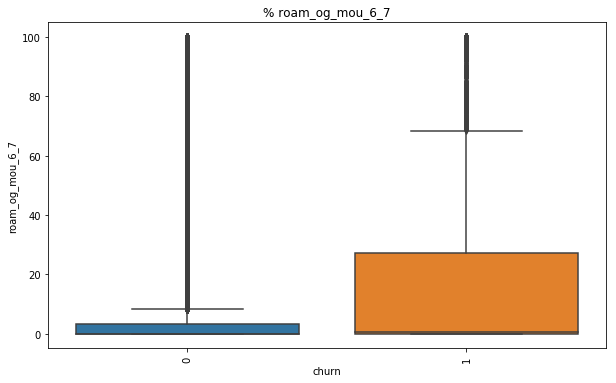

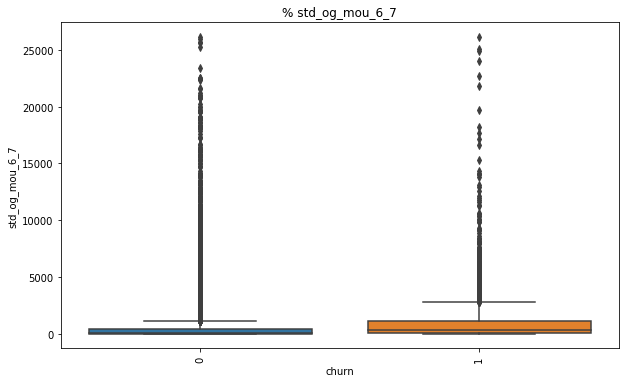

In [53]:
df_eda_num = df_eda.select_dtypes(np.number)

for c in df_eda_num.columns:
    plot_num_variable(c,df_eda_num)

#### Inferences

for action phase
1. low number of std outgoing voice call more likely to churn
2. low number of local incoming voice call on landline for same operator likely to churn
3. low number of local incoming voice call likely to churn
4. low number of local outgoing voice call likely to churn
5. increase number of outgoing roaming voice call likely to churn as user may going to be shift in another location
6. increase number of incoming roaming voice call likely to churn as user may going to be shift in another location
7. low number of offnet and onnet likely to churn
8. arpu decreases in action phase means more likely to churn
9. low number of incoming and outgoing voice calls more likely to churn 
10. 

for good phase 6 and 7
1. increase number of std outgoing operator to other operater or same operator mobile more likely to churn
2. low number of local outgoing operator to other operater mobile more likely to churn
3. increase usuage of offnet and onnet more likely to churn
4. total outgoing increases means more likely to churn

common:
1. less the user age on network more possibility to churn
2. decrease in amount of reacharge in month 8 as compare to 6 and 7 means more likely to churn
3. decrease in amount of reacharge on last date in month 8 as compare to 6 and 7 means more likely to churn

In [54]:
# get the day, month and year from datetime
df_eda.select_dtypes('datetime64')

date_of_last_rech_8 date_of_last_rech_7 date_of_last_rech_6
7              2014-08-26          2014-07-25          2014-06-27
8              2014-08-30          2014-07-31          2014-06-25
13             2014-08-30          2014-07-22          2014-06-20
16             2014-08-14          2014-07-31          2014-06-30
17             2014-08-25          2014-07-30          2014-06-30
21             2014-08-31          2014-07-31          2014-06-30
24             2014-08-31          2014-07-17          2014-06-23
38             2014-08-24          2014-07-28          2014-06-30
41             2014-08-31          2014-07-22          2014-06-24
48             2014-08-28          2014-07-23          2014-06-29
56             2014-08-31          2014-07-30          2014-06-28
57             2014-08-24          2014-07-26          2014-06-29
60             2014-08-27          2014-07-28          2014-06-26
61             2014-08-23          2014-07-29          2014-06-28
69             2014-08-31          2014-07-28          2014-06-30
73             2014-08-31          2014-07-31          2014-06-30
74             2014-08-31          2014-07-31          2014-06-21
87             2014-08-31          2014-07-29          2014-06-28
92             2014-08-21          2014-07-29          2014-06-29
96             2014-08-29          2014-07-28          2014-06-30
97             2014-08-30          2014-07-31          2014-06-29
101            2014-08-30          2014-07-29          2014-06-25
102            2014-08-26          2014-07-28          2014-06-20
105            2014-08-24          2014-07-31          2014-06-22
111            2014-08-24          2014-07-27          2014-06-13
124            2014-08-30          2014-07-31          2014-06-30
131            2014-08-28          2014-07-31          2014-06-28
133            2014-08-28          2014-07-31          2014-06-26
134            2014-08-17          2014-07-25          2014-06-16
143            2014-08-28          2014-07-22          2014-06-30
146            2014-08-30          2014-07-30          2014-06-21
147            2014-08-26          2014-07-29          2014-06-20
157            2014-08-27          2014-07-26          2014-06-30
158            2014-08-29          2014-07-31          2014-06-22
165            2014-08-28          2014-07-30          2014-06-16
170            2014-08-27          2014-07-28          2014-06-30
171            2014-08-30          2014-07-31          2014-06-29
175            2014-08-29          2014-07-28          2014-06-29
176            2014-08-30          2014-07-31          2014-06-29
185            2014-08-19          2014-07-31          2014-06-28
188            2014-08-31          2014-07-07          2014-06-28
191            2014-08-31          2014-07-30          2014-06-12
195            2014-08-26          2014-07-24          2014-06-25
199            2014-08-25          2014-07-27          2014-06-30
203            2014-08-19          2014-07-26          2014-06-21
204            2014-08-28          2014-07-24          2014-06-27
206            2014-08-30          2014-07-26          2014-06-30
208            2014-08-28          2014-07-29          2014-06-28
213            2014-08-31          2014-07-31          2014-06-27
218            2014-08-31          2014-07-30          2014-06-29
225            2014-08-31          2014-07-28          2014-06-29
226            2014-08-31          2014-07-30          2014-06-26
235            2014-08-31          2014-07-30          2014-06-29
244            2014-08-30          2014-07-29          2014-06-29
245            2014-08-24          2014-07-24          2014-06-28
246            2014-08-25          2014-07-15          2014-06-15
252            2014-08-31          2014-07-25          2014-06-24
253            2014-08-30          2014-07-30          2014-06-30
255            2014-08-29          2014-07-30          2014-06-30
256            2014-08-30          2014-07-09 

In [55]:
# extract the day,month and year from each datetime column
def extract_date(df):
    for col in df.select_dtypes(include=['datetime64']).columns:
        df[col + '_year'] = df[col].dt.year 
        df[col + '_month'] = df[col].dt.month 
        df[col + '_day'] = df[col].dt.day
        df.drop(columns=[col], axis=1, inplace=True)
    return df

df_eda_1 = extract_date(df_eda)


In [56]:
df_eda_1.head()

loc_og_t2c_mou_8  std_og_mou_8  ic_others_8  loc_ic_t2f_mou_8  isd_ic_mou_8  loc_ic_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  isd_og_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_ic_mou_8  std_ic_t2m_mou_8  std_ic_t2t_mou_8  std_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  roam_og_mou_8  og_others_8  roam_ic_mou_8  offnet_mou_8  spl_og_mou_8  loc_og_t2t_mou_8  onnet_mou_8  loc_ic_t2m_mou_8  loc_og_t2m_mou_8  loc_ic_t2t_mou_8  std_ic_t2f_mou_6  loc_ic_t2m_mou_6  std_og_t2f_mou_6  std_ic_t2m_mou_6  std_og_t2m_mou_6  loc_ic_t2t_mou_6  std_ic_t2t_mou_6  loc_ic_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2m_mou_6  loc_og_t2t_mou_6  loc_og_t2f_mou_6  offnet_mou_6  onnet_mou_6  std_og_t2t_mou_6  onnet_mou_7  std_og_t2t_mou_7  offnet_mou_7  std_og_t2f_mou_7  std_ic_t2f_mou_7  loc_og_t2t_mou_7  std_ic_t2t_mou_7  std_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_og_t2c_mou_7  std_og_t2m_mou_7  loc_og_t2f_mou_7  loc_ic_t2m_mou_7  loc_og_t2m_mou_7  loc_ic_t2t_mou_7    arpu_6    arpu_7    arpu_8  \
7               0.00         77.84        15.14             39.53         31.59        188.04             22.21           0.0         10.01        255.79             16.68        193.94            141.33             30.39             49.14             53.23             12.01          38.06          0.0          31.64        325.91          6.50             40.28        52.29            121.19            162.28             27.31             52.19            217.56              6.66             91.44             49.89             58.14             36.89            152.16               0.0            308.63             51.39             62.13        453.43        57.84              4.30        54.68             23.29        567.16             20.08             34.24             31.38             11.83            126.99            101.46               0.0             31.76             55.14            221.49            447.38             32.26  1069.180  1349.850  3171.480   
8               7.15         98.28         0.00              0.00          0.00         15.79              0.00           0.0          0.00         63.04              0.00          0.75              0.65              0.10             75.69              0.00             22.58           0.00          0.0           0.00        136.48         10.23             12.49        35.08             15.48             50.54              0.31              0.00             57.58              0.00             22.43             13.69             23.84              0.00              0.00               0.0             80.96            297.13              0.00         94.66       413.69            116.56       351.03            133.43         80.63              0.00              0.00            217.59              0.58              4.08              0.00               0.0             10.04              0.00             13.98             70.58              9.84   378.721   492.223   137.362   
13              0.49        655.18        21.44              7.49        393.39        255.26              1.91           0.0          1.29        353.99              0.00        474.41            317.91            154.58            156.94             23.51            498.23           1.44          0.0          72.11        482.46          4.78             36.01       534.24            195.18            294.46             52.58              0.00            142.88              0.00            308.13            255.36             67.88            115.68              4.81               0.0            151.13             49.63              4.54        413.31       501.76            446.41       108.39             85.98        119.28              0.00              0.00              6.19             38.29             29.79              0.00               0.0             52.94              0.00             18.53             47.28              7.58   492.846   205.671   593.260   
16              0.00         21.53         0.00         

In [57]:
df_eda_1.shape

(27006, 127)

In [58]:
#Find Highly correlated data and drop Highly Correlated Columns

correlation_0 = df_eda_1.corr().abs()
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort")
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]
corr = correlation_0[(correlation_0 > 0.70) | (correlation_0 < -0.70)]
print(round(corr,2))

vol_3g_mb_6         vol_3g_mb_7           0.70
vol_3g_mb_7         vol_3g_mb_6           0.70
onnet_mou_8         std_og_t2t_mou_7      0.70
std_og_t2t_mou_7    onnet_mou_8           0.70
jul_vbc_3g          jun_vbc_3g            0.70
jun_vbc_3g          jul_vbc_3g            0.70
vol_3g_mb_6         monthly_3g_6          0.70
monthly_3g_6        vol_3g_mb_6           0.70
total_ic_mou_6      total_ic_mou_8        0.70
total_ic_mou_8      total_ic_mou_6        0.70
vol_3g_mb_8         aug_vbc_3g            0.71
aug_vbc_3g          vol_3g_mb_8           0.71
total_ic_mou_8      loc_ic_t2m_mou_7      0.71
loc_ic_t2m_mou_7    total_ic_mou_8        0.71
offnet_mou_6        total_og_mou_6        0.71
total_og_mou_6      offnet_mou_6          0.71
vol_3g_mb_7         jul_vbc_3g            0.71
jul_vbc_3g          vol_3g_mb_7           0.71
monthly_3g_7        vol_3g_mb_7           0.71
vol_3g_mb_7         monthly_3g_7          0.71
std_ic_t2m_mou_8    std_ic_t2m_mou_7      0.71
std_ic_t2m_mo

So many highly correlated variables, so not dropping now and handle it during modeling

In [59]:
get_null_percentage(df_eda_1)

loc_og_mou_6_7               0.001666
spl_og_mou_6_7               0.001666
og_others_6_7                0.001666
isd_og_mou_6_7               0.001666
std_og_mou_6_7               0.001666
roam_og_mou_6_7              0.001666
isd_ic_mou_6_7               0.000592
loc_ic_mou_6_7               0.000592
spl_ic_mou_6_7               0.000592
roam_ic_mou_6_7              0.000592
std_ic_mou_6_7               0.000592
ic_others_6_7                0.000592
onnet_mou_7                  0.000000
loc_og_t2m_mou_6             0.000000
loc_og_t2c_mou_6             0.000000
loc_ic_t2f_mou_6             0.000000
std_ic_t2t_mou_6             0.000000
loc_ic_t2t_mou_6             0.000000
std_og_t2m_mou_6             0.000000
std_ic_t2m_mou_6             0.000000
loc_og_t2t_mou_6             0.000000
loc_og_t2f_mou_6             0.000000
offnet_mou_6                 0.000000
onnet_mou_6                  0.000000
std_og_t2t_mou_6             0.000000
date_of_last_rech_6_day      0.000000
std_og_t2t_m

In [60]:
# Less than 2% so lets drop it
df_eda_1.dropna(inplace = True)

In [61]:
df_eda_1.shape

(26945, 127)

### Modeling

Standarisation

In [62]:
X = df_eda_1.drop(columns=['churn'], axis=1)
Y = df_eda_1[['churn']]

scaler = StandardScaler()
_columns = X.columns
X[_columns] = scaler.fit_transform(X)
X.head()

loc_og_t2c_mou_8  std_og_mou_8  ic_others_8  loc_ic_t2f_mou_8  isd_ic_mou_8  loc_ic_mou_8  std_ic_t2f_mou_8  spl_ic_mou_8  isd_og_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_ic_mou_8  std_ic_t2m_mou_8  std_ic_t2t_mou_8  std_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  roam_og_mou_8  og_others_8  roam_ic_mou_8  offnet_mou_8  spl_og_mou_8  loc_og_t2t_mou_8  onnet_mou_8  loc_ic_t2m_mou_8  loc_og_t2m_mou_8  loc_ic_t2t_mou_8  std_ic_t2f_mou_6  loc_ic_t2m_mou_6  std_og_t2f_mou_6  std_ic_t2m_mou_6  std_og_t2m_mou_6  loc_ic_t2t_mou_6  std_ic_t2t_mou_6  loc_ic_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2m_mou_6  loc_og_t2t_mou_6  loc_og_t2f_mou_6  offnet_mou_6  onnet_mou_6  std_og_t2t_mou_6  onnet_mou_7  std_og_t2t_mou_7  offnet_mou_7  std_og_t2f_mou_7  std_ic_t2f_mou_7  loc_og_t2t_mou_7  std_ic_t2t_mou_7  std_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_og_t2c_mou_7  std_og_t2m_mou_7  loc_og_t2f_mou_7  loc_ic_t2m_mou_7  loc_og_t2m_mou_7  loc_ic_t2t_mou_7    arpu_6    arpu_7    arpu_8  \
7          -0.298026     -0.475302     4.405360          0.780583      0.623438     -0.150101          2.722362     -0.250148      2.985080     -0.002402          2.713600      1.960303          1.882271          0.580688         -0.338900          3.066067         -0.411401       0.273583          0.0       0.449561     -0.097103      0.043988         -0.246773    -0.501601         -0.162702         -0.031416         -0.320446          6.265004          0.288596          0.750373          1.033201         -0.389142         -0.056278          0.725291          3.951970         -0.303889          0.537431         -0.208091          3.456941      0.088734    -0.559088         -0.478869    -0.566803         -0.437324      0.330533          2.915788          3.866612         -0.320882         -0.030586          1.526503          2.404414         -0.309003         -0.438309          2.991209          0.307176          1.156468         -0.302111  1.550984  2.454186  7.608637   
8           1.145489     -0.439222    -0.222944         -0.408879     -0.209527     -0.812967         -0.248824     -0.250148     -0.109624     -0.614342         -0.210912     -0.488480         -0.411393         -0.352471         -0.267566         -0.388486         -0.383986      -0.252035          0.0      -0.234405     -0.543674      0.329035         -0.414029    -0.543353         -0.706189         -0.533616         -0.580263         -0.249967         -0.504097         -0.212930         -0.080478         -0.481828         -0.374918         -0.369684         -0.413101         -0.303889         -0.434999          1.133502         -0.396146     -0.732960     0.294347         -0.189239     0.129238         -0.162040     -0.758143         -0.212834         -0.249635          0.706641         -0.358532         -0.377488         -0.418238         -0.309003         -0.491491         -0.400414         -0.737221         -0.495943         -0.511008 -0.577559 -0.224915 -1.058603   
13         -0.199100      0.543787     6.331272         -0.183504     10.163387      0.108581          0.006690     -0.250148      0.289194      0.309362         -0.210912      5.515405          4.761253          4.406668         -0.049264          1.137280          0.849688      -0.232148          0.0       1.324408      0.271955     -0.087454         -0.272472     0.667625          0.217704          0.562649         -0.077275         -0.249967         -0.081440         -0.212930          4.530132          0.136945          0.034205          3.063947         -0.275115         -0.303889         -0.135287         -0.217699         -0.114591     -0.003153     0.505566          0.661773    -0.440653         -0.280637     -0.671659         -0.212834         -0.249635         -0.459883          0.740742          0.020784         -0.418238         -0.309003         -0.386449         -0.400414         -0.714321         -0.598123         -0.532066 -0.225735 -1.120062  0.243712   
16         -0.298026     -0.574697    -0.222944         

Split into train and test data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

### Model Building

As number of variables are high so using PCA for dimensionality reduction

In [64]:
pca = PCA(svd_solver='randomized', random_state=42)
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [65]:
pca.components_.round(3)

array([[ 0.007, -0.024,  0.029, ...,  0.   ,  0.   , -0.015],
       [ 0.035,  0.252,  0.005, ..., -0.   , -0.   ,  0.088],
       [ 0.005,  0.032, -0.003, ...,  0.   ,  0.   , -0.066],
       ...,
       [-0.   ,  0.   ,  0.   , ..., -0.   , -0.   , -0.   ],
       [-0.   ,  0.   ,  0.   , ..., -1.   , -0.   , -0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  1.   , -0.   ]])

In [66]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2           Feature
0  0.007096  0.034724  loc_og_t2c_mou_8
1 -0.023731  0.252485      std_og_mou_8
2  0.028941  0.005305       ic_others_8
3  0.103456 -0.053029  loc_ic_t2f_mou_8
4  0.028109 -0.006571      isd_ic_mou_8

In [67]:
pca.explained_variance_ratio_.cumsum()

array([0.11353631, 0.2042377 , 0.26303438, 0.30442124, 0.3440249 ,
       0.38201538, 0.41199421, 0.44031579, 0.46547984, 0.48884986,
       0.5114452 , 0.53160595, 0.54948159, 0.56732853, 0.58412974,
       0.600585  , 0.61494227, 0.62857123, 0.64147574, 0.65371742,
       0.6654676 , 0.67690535, 0.6878648 , 0.69826024, 0.70835158,
       0.71826213, 0.72754188, 0.73638993, 0.74504401, 0.7535323 ,
       0.76171989, 0.76968116, 0.77753818, 0.78501361, 0.79230099,
       0.79950071, 0.80655343, 0.81324257, 0.81983249, 0.82632103,
       0.83247475, 0.83849756, 0.8443388 , 0.85012468, 0.85560278,
       0.86094575, 0.86620855, 0.87140662, 0.87646607, 0.88136309,
       0.88604271, 0.89058655, 0.89507086, 0.89947326, 0.90363694,
       0.90772907, 0.91169371, 0.91553306, 0.91933779, 0.92307068,
       0.92669987, 0.93013694, 0.9333689 , 0.93654544, 0.93970942,
       0.9427913 , 0.94584083, 0.94879681, 0.95171944, 0.95450704,
       0.95721984, 0.95980622, 0.96232771, 0.96480157, 0.96715

#### Looking at the screeplot to assess the number of needed principal components

In [68]:
pca.explained_variance_ratio_

array([1.13536313e-01, 9.07013828e-02, 5.87966845e-02, 4.13868600e-02,
       3.96036561e-02, 3.79904801e-02, 2.99788372e-02, 2.83215803e-02,
       2.51640507e-02, 2.33700104e-02, 2.25953466e-02, 2.01607467e-02,
       1.78756448e-02, 1.78469323e-02, 1.68012099e-02, 1.64552691e-02,
       1.43572691e-02, 1.36289605e-02, 1.29045095e-02, 1.22416799e-02,
       1.17501746e-02, 1.14377503e-02, 1.09594546e-02, 1.03954388e-02,
       1.00913376e-02, 9.91054686e-03, 9.27975008e-03, 8.84805627e-03,
       8.65407977e-03, 8.48829013e-03, 8.18758964e-03, 7.96126860e-03,
       7.85702124e-03, 7.47542747e-03, 7.28737901e-03, 7.19972269e-03,
       7.05271427e-03, 6.68914401e-03, 6.58992093e-03, 6.48854363e-03,
       6.15371901e-03, 6.02280820e-03, 5.84124199e-03, 5.78588136e-03,
       5.47809781e-03, 5.34296946e-03, 5.26280092e-03, 5.19806261e-03,
       5.05945117e-03, 4.89701843e-03, 4.67962922e-03, 4.54383362e-03,
       4.48430976e-03, 4.40239819e-03, 4.16368299e-03, 4.09213485e-03,
      

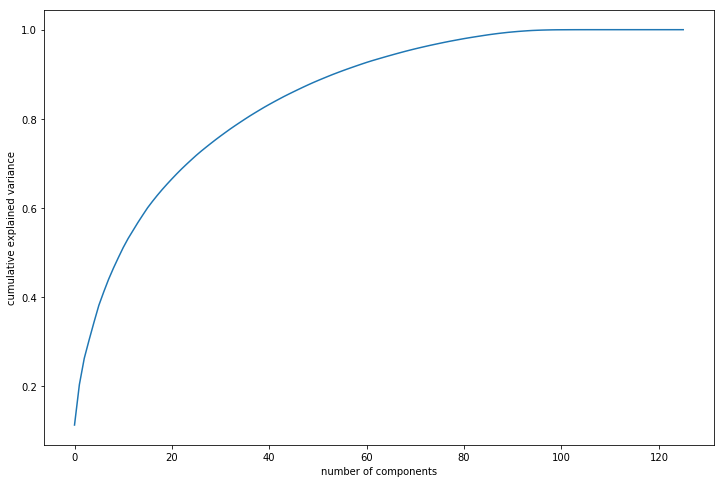

In [69]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 85 components are enough to describe 95% of the variance in the dataset
- We'll choose 85 components for our modeling

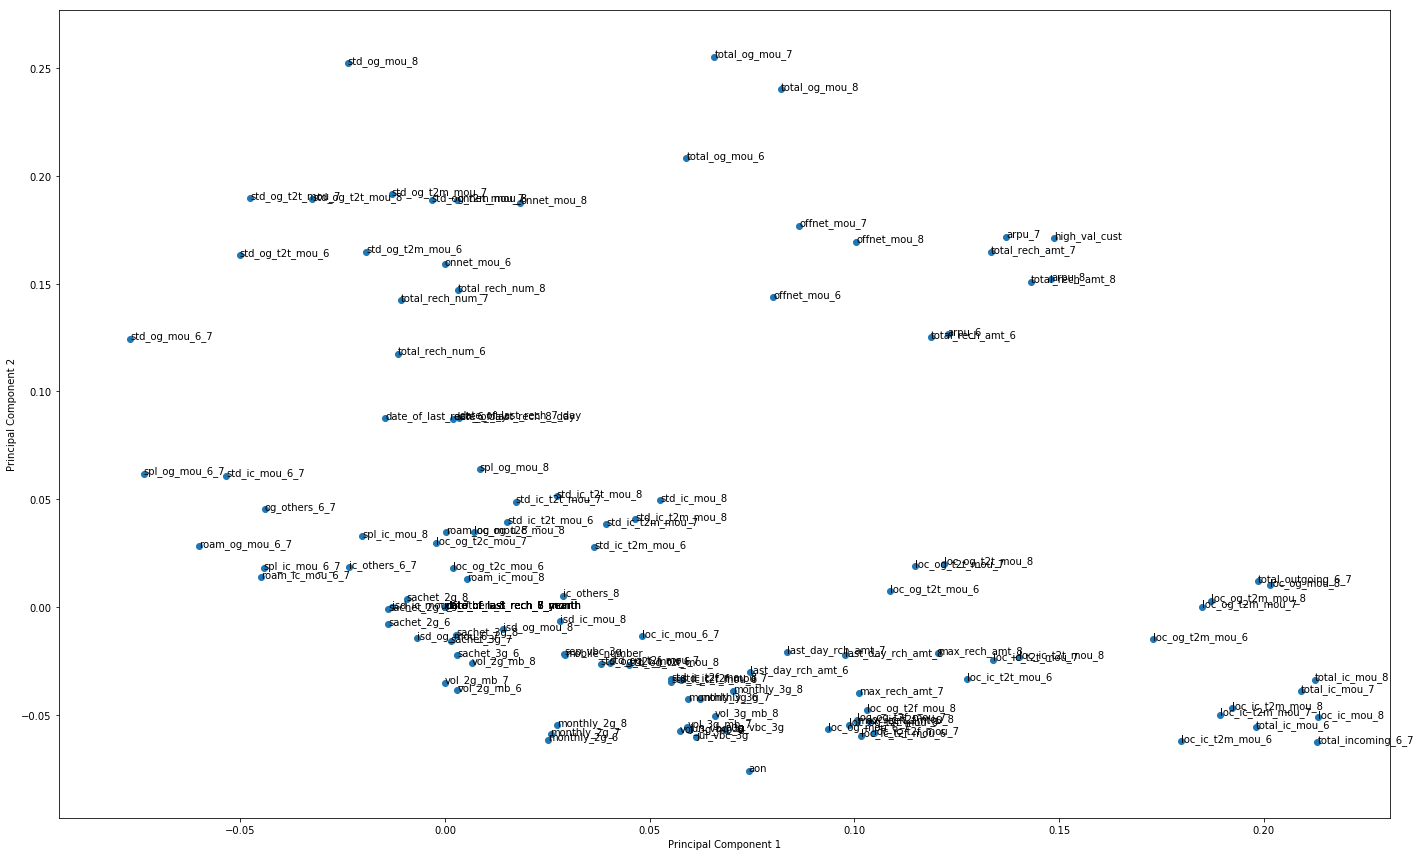

In [70]:
# Let's plot them to visualise how these features are loaded

%matplotlib inline
fig = plt.figure(figsize = (20,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

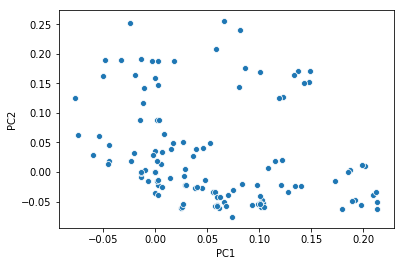

In [71]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data

sns.scatterplot(x='PC1',y='PC2',data=pcs_df)

In [72]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=85)

#### Basis transformation - getting the data onto our PCs

In [73]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(18861, 85)

In [74]:
df_pca = pd.DataFrame(df_train_pca)
df_pca.head()

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84
0 -0.884727 -1.868837 -0.098321  1.492733  1.291433 -2.111929 -2.165616 -1.931142 -1.595576  0.459424  1.067646  0.939089  1.058756 -0.224518 -0.952361 -1.585828 -0.451525  0.564086 -0.481978 -0.352256  0.340723  0.376263  0.074879 -0.965096  0.334400  0.527590  0.127756 -0.562479 -0.945759 -0.052157 -0.186265 -0.121696 -0.380617 -1.072839  1.044186 -0.977345 -0.022086  0.973511 -0.907453  0.703673 -0.309409 -0.157949  0.234925  1.287762 -1.781517  1.909452 -1.331987 -0.794369  0.384422 -1.150462  1.107777 -0.705921 -0.013622  0.096852 -1.155599  0.689537 -0.041093 -0.101422 -0.190650  0.122549 -0.228248  0.104393 -0.048146 -0.094625 -0.186919 -0.061353  0.315170  0.017975 -0.015965 -0.422729  0.194674 -0.058635 -0.136342  0.357593  0.059369 -0.483950  0.028961 -0.554777  0.136640  0.135877  0.157671  0.006582 -0.020328 -0.141896  0.119644
1 -1.958113  0.572301 -0.803403  1.106480 -1.595208 -2.329666 -0.382792  2.106438  0.103225  0.471117  0.610864 -0.609983  0.519848  0.187745  0.251354 -0.350894 -0.121309  0.603245 -0.668767  0.028821  0.578326  0.334719 -0.425815  1.860030  1.075304  0.657358 -0.057151 -0.176513  0.160835 -0.216650 -0.349428  2.037542 -0.401093 -0.426539  0.430327  0.281445  0.357696  0.134810  0.135402 -0.247033  1.495751 -0.674808  1.631916  0.585212 -1.211056 -0.354095  1.287851  1.195688 -0.264994 -0.540152  0.340646 -0.124884  0.068460  0.127647  0.180569 -0.194824  0.052969  0.067576  0.105364  0.095599  0.085959 -0.160907 -0.091881  0.056615  0.249205 -0.104659  0.059789  0.047143 -0.838042  0.025138  0.429435  0.225694  0.187004 -0.249124 -0.182894 -0.018054 -0.072307  0.213506  0.197595 -0.081042 -0.111355 -0.341808  0.267918 -0.115292 -0.102667
2 -1.166124  0.015198 -0.773084  0.970727 -2.065473 -0.011661 -0.423973 -2.473169 -0.200829  0.447856  0.818672  0.756625  1.388526  2.948505  0.496882  2.839395  1.209242 -0.786515  0.227402  1.170218  0.725212  0.470842  1.592954 -0.163007  0.294541 -0.748418 -0.887647 -0.343257 -1.882039 -1.138954  2.164367  0.555093 -0.554540 -0.395756 -0.300723  0.786421 -0.761357 -0.492240 -0.370688  0.225582 -0.996109  0.311550  0.236186  0.204026 -1.180262  1.025325  0.690476 -0.341170 -0.943056  2.482652 -0.058369  0.519536 -0.047705  0.031971 -0.536406 -0.704844  0.891496 -0.740556  0.031886 -0.156293 -0.238667  0.380797 -0.099427  0.095474 -0.001267  0.796677 -0.502438  0.164535  0.313663  0.131612  0.511333  0.046349 -0.775342 -0.140443 -0.028055  0.080392 -0.222074  0.088461  0.474215 -0.004044 -0.125781  0.053247  0.154875  0.122263 -0.023737
3 -3.482401  2.251112  1.317836  1.922929 -0.122552 -0.590516  3.468746 -1.489481 -0.493579 -0.869367  0.606981 -1.475726 -0.282661 -0.515711  1.136805 -0.940542  0.933727 -1.309498 -0.076579  0.042179 -1.010536 -1.217717 -0.940248 -0.149202 -1.798983 -1.148955 -0.090526 -0.476044 -0.177723  0.853536  0.765299 -1.165400 -0.785941 -0.962580  0.421505  1.047180 -0.652232 -0.283112 -0.418944  0.110451 -1.345821  0.791748  0.904138  0.005983 -0.681862  0.040887 -0.124587  0.504272  0.237209  0.070820 -0.150078  0.459491  0.739390  0.329593  0.441711 -0.175454 -0.006833  0.241557  0.405011 -0.103295

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [75]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

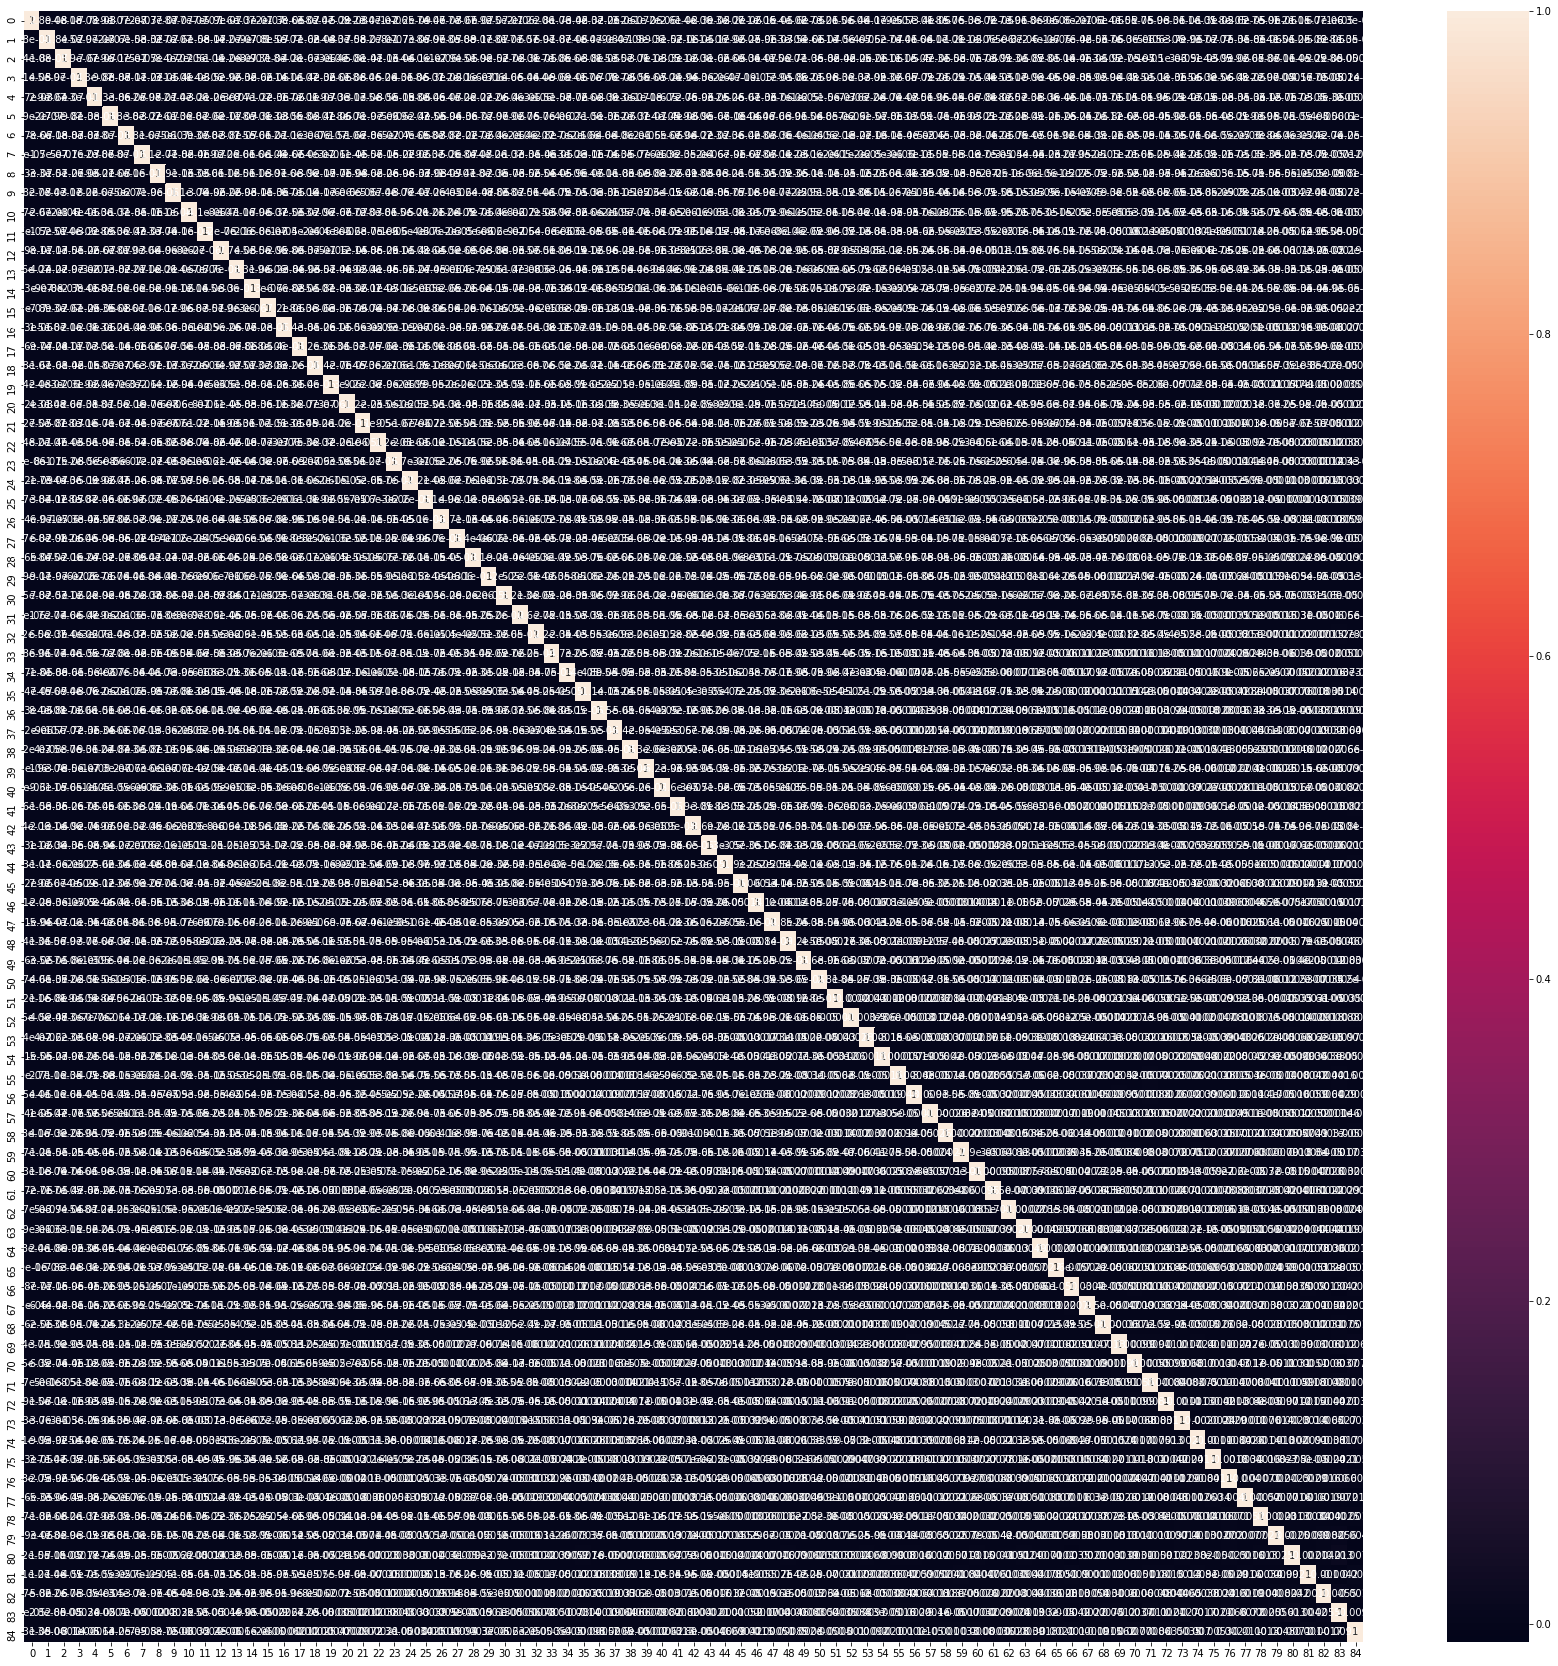

In [76]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (30,30))
sns.heatmap(corrmat,annot = True)

In [77]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.013483682871732029 , min corr:  -0.011179143170022667


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

Apply to test data

In [78]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8084, 85)

#### Here we got almost same result for the train and test dataset. 

Define common function

In [79]:
# RandomForestClassifier Fitting
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




# draw roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds


def model_evaluation(y_test,y_pred,model,typemodel):
    print('typemodel',typemodel)
    print(confusion_matrix(y_test,y_pred))
    print("Accuracy Score:  ",round(accuracy_score(y_test,y_pred),3))
    print("AUC Score: ",round(metrics.roc_auc_score(y_test,y_pred),3))
    
    if(typemodel=="pca"):
        print('1')
        pred_probs_test = model.predict_proba(df_test_pca)[:,1]
   
    elif(typemodel=='lasso'):
        print('3')
        pred_probs_test = lasso.predict(X_test)
    else:
        print('4')
        pred_probs_test = model.predict_proba(X_test)[:,1]
        
    
    #pred_probs_test = model.predict_proba(df_test_pca)[:,1]
    print("ROC_AUC Score :" ,round(metrics.roc_auc_score(y_test, pred_probs_test),3))
    TP = (confusion_matrix(y_test,y_pred))[0][0]
    FP = (confusion_matrix(y_test,y_pred))[0][1]
    FN = (confusion_matrix(y_test,y_pred))[1][0]
    TN = (confusion_matrix(y_test,y_pred))[1][1]
    print("Not-Churn Accuracy Rate:(Specificity): ",round((TP/(TP+FP)),3))
    print("Churn Accuracy Rate:(Sensitivity): ",round((TN/(TN+FN)),3))
    
    
def randomforesttuning(parameters):
    n_folds = 5
    
    param = list(parameters.keys())[0]
    # instantiate the model
    if((param == 'max_features') | (param == 'n_estimators')):
        rf = RandomForestClassifier(max_depth=4)
    else:
        rf = RandomForestClassifier()

    # fit tree on training data
    rf = GridSearchCV(rf, parameters, 
                        cv=n_folds, 
                       scoring="accuracy")
    rf.fit(X_train, y_train)
    # scores of GridSearch CV
    scores = rf.cv_results_
    input_param = "param_" + list(parameters.keys())[0]
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores[input_param], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores[input_param], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### Logistic Regression using PCA

In [80]:
lr = LogisticRegression()
lr_model_pca = lr.fit(df_train_pca, y_train)

# Making prediction on the test data
y_pred = lr_model_pca.predict(df_test_pca)

In [81]:
pca_column_frame = pcs_df.head(85)
pca_column_frame.head()

PC1       PC2           Feature
0  0.007096  0.034724  loc_og_t2c_mou_8
1 -0.023731  0.252485      std_og_mou_8
2  0.028941  0.005305       ic_others_8
3  0.103456 -0.053029  loc_ic_t2f_mou_8
4  0.028109 -0.006571      isd_ic_mou_8

In [82]:
pca_column_frame['coeff'] = lr_model_pca.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

PC1           PC2           Feature     coeff
29  0.038047 -2.633870e-02  std_og_t2f_mou_6 -0.861133
31 -0.019315  1.648952e-01  std_og_t2m_mou_6 -0.610064
0   0.007096  3.472367e-02  loc_og_t2c_mou_8 -0.559997
81  0.059613 -5.725745e-02        jun_vbc_3g -0.449870
25  0.187117  2.868291e-03  loc_og_t2m_mou_8 -0.427032
50  0.104712 -5.864132e-02  loc_ic_t2f_mou_7 -0.414601
18  0.000000  4.038968e-28       og_others_8 -0.362813
30  0.036390  2.776205e-02  std_ic_t2m_mou_6 -0.354494
5   0.213299 -5.127972e-02      loc_ic_mou_8 -0.330003
46  0.057708 -3.381974e-02  std_ic_t2f_mou_7 -0.305270
35  0.001979  1.796958e-02  loc_og_t2c_mou_6 -0.297009
36  0.173039 -1.478686e-02  loc_og_t2m_mou_6 -0.288787
68 -0.013825 -7.932243e-03       sachet_2g_6 -0.246223
62  0.057335 -5.753909e-02       vol_3g_mb_6 -0.236766
56  0.133903 -2.442184e-02  loc_ic_t2t_mou_7 -0.209763
63  0.059173 -5.559905e-02       vol_3g_mb_7 -0.205291
43 -0.047614  1.896264e-01  std_og_t2t_mou_7 -0.175823
75  0.003003 -2.235631e-02       sachet_3g_6 -0.164719
27  0.055326 -3.458932e-02  std_ic_t2f_mou_6 -0.163054
11  0.052530  4.962297e-02      std_ic_mou_8 -0.162567
52 -0.013018  1.915409e-01  std_og_t2m_mou_7 -0.151366
26  0.140315 -2.328039e-02  loc_ic_t2t_mou_8 -0.151294
16 -0.032403  1.892367e-01  std_og_t2t_mou_8 -0.151125
45  0.040264 -2.589251e-02  std_og_t2f_mou_7 -0.141433
59  0.148052  1.521666e-01            arpu_8 -0.129723
10  0.045010 -2.672478e-02  std_og_t2f_mou_8 -0.125102
2   0.028941  5.305338e-03       ic_others_8 -0.118670
21  0.008479  6.401993e-02      spl_og_mou_8 -0.105921
74  0.070358 -3.890883e-02      monthly_3g_8 -0.104980
34  0.101623 -5.970011e-02  loc_ic_t2f_mou_6 -0.104627
79  0.068486 -5.697609e-02        aug_vbc_3g -0.103889
14 -0.003245  1.886928e-01  std_og_t2m_mou_8 -0.103725
77  0.002786 -1.290507e-02       sachet_3g_8 -0.095134
80  0.061298 -6.030904e-02        jul_vbc_3g -0.094416
49  0.039344  3.838913e-02  std_ic_t2m_mou_7 -0.078320
83  0.000033 -3.508331e-02       vol_2g_mb_7 -0.076703
32  0.127554 -3.356381e-02  loc_ic_t2t_mou_6 -0.070927
61  0.058940  2.082707e-01    total_og_mou_6 -0.067697
78  0.074148 -7.619997e-02               aon -0.059277
38  0.098629 -5.465370e-02  loc_og_t2f_mou_6 -0.056268
37  0.108692  7.199375e-03  loc_og_t2t_mou_6 -0.040399
57  0.122794  1.265367e-01            arpu_6 -0.036738
12  0.046412  4.074635e-02  std_ic_t2m_mou_8 -0.032922
20  0.100478  1.695508e-01      offnet_mou_8 -0.024650
67  0.027287 -5.468541e-02      monthly_2g_8 -0.022078
19  0.005457  1.294904e-02     roam_ic_mou_8 -0.020539
13  0.027258  5.132138e-02  std_ic_t2t_mou_8 -0.018772
33  0.015153  3.950267e-02  std_ic_t2t_mou_6 -0.011338
66  0.025772 -5.916667e-02      monthly_2g_7 -0.009048
65  0.025218 -6.153500e-02      monthly_2g_6 -0.006279
42  0.002978  1.886523e-01       onnet_mou_7 -0.006116
24  0.192321 -4.700980e-02  loc_ic_t2m_mou_8 -0.004572
64  0.065916 -5.038032e-02       vol_3g_mb_8  0.002474
47  0.114787  1.884782e-02  loc_og_t2t_mou_7  0.006066
55  0.185027  1.896342e-04  loc_og_t2m_mou_7  0.007506
15  0.102965 -4.782539e-02  loc_og_t2f_mou_8  0.009670
53  0.100704 -5.230063e-02  loc_og_t2f_mou_7  0.016589
84  0.002981 -3.852777e-02       vol_2g_mb_6  0.033499
9   0.201454  1.026203e-02      loc_og_mou_8  0.043368
72  0.065829  2.554519e-01    total_og_mou_7  0.050510
82  0.006548 -2.602924e-02       vol_2g_mb_8  0.053294
1  -0.023731  2.524846e-01      std_og_mou_8  0.053674
60  0.148832  1.712140e-01     high_val_cust  0.069133
44  0.086500  1.769075e-01      offnet_mou_7  0.090808
70 -0.009400  3.539692e-03       sachet_2g_8  0.110053
54  0.189267 -4.990143e-02  loc_ic_t2m_mou_7  0.114722
8   0.014229 -1.020326e-02      isd_og_mou_8  0.115051
3   0.103456 -5.302935e-02  loc_ic_t2f_mou_8  0.119103
22  0.121777  2.004937e-02  loc_og_t2t_mou_8  0.136071
71  0.059399 -4.261329e-02      monthly_3g_6  0.152675
48  0.017290  4.883664e-02  std_ic_t2t_mou_7  0.158352
76  0.001437 -1.589761e-02       sachet_3g_7  0.1

In [86]:
print("************Training Results*********************")
y_pred_train = lr_model_pca.predict(df_train_pca)
print("Accuracy Score:  ",round(accuracy_score(y_train,y_pred_train),3))
print(classification_report(y_train, y_pred_train))

************Training Results*********************
Accuracy Score:   0.931
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     17342
          1       0.65      0.32      0.43      1519

avg / total       0.92      0.93      0.92     18861



In [87]:
print("************Test Results*********************")
model_evaluation(y_test,y_pred,lr_model_pca,'pca')

************Test Results*********************
typemodel pca
[[7312  128]
 [ 423  221]]
Accuracy Score:   0.932
AUC Score:  0.663
1
ROC_AUC Score : 0.9
Not-Churn Accuracy Rate:(Specificity):  0.983
Churn Accuracy Rate:(Sensitivity):  0.343


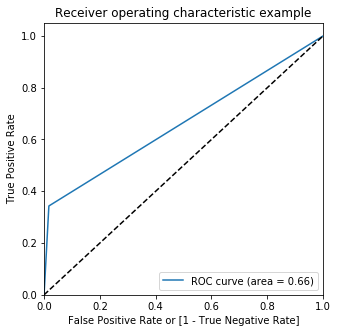

(array([0.       , 0.0172043, 1.       ]),
 array([0.       , 0.3431677, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [88]:
draw_roc(y_test, y_pred)

### RandomForest using PCA

In [95]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=60)
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
y_pred = rfc.predict(df_test_pca)

In [102]:
print("************Training Results*********************")
y_pred_train = rfc.predict(df_train_pca)
print("Accuracy Score:  ",round(accuracy_score(y_train,y_pred_train),3))
print(classification_report(y_train, y_pred_train))

************Training Results*********************
Accuracy Score:   0.919
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     17342
          1       0.00      0.00      0.00      1519

avg / total       0.85      0.92      0.88     18861



In [104]:
print("*******************Test Results****************")
print(classification_report(y_test, y_pred))

*******************Test Results****************
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      7440
          1       0.00      0.00      0.00       644

avg / total       0.85      0.92      0.88      8084



In [105]:
model_evaluation(y_test,y_pred,rfc,'pca')

typemodel pca
[[7440    0]
 [ 644    0]]
Accuracy Score:   0.92
AUC Score:  0.5
1
ROC_AUC Score : 0.869
Not-Churn Accuracy Rate:(Specificity):  1.0
Churn Accuracy Rate:(Sensitivity):  0.0


#### RandomForest Hyperparameter Tuning

##### Tuning max_depth

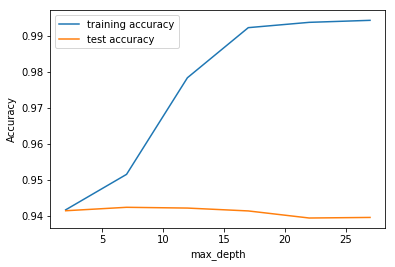

In [187]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
randomforesttuning(parameters)

You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. controlling the depth of the constituent trees will help reduce overfitting in the forest.

##### Tuning n_estimators

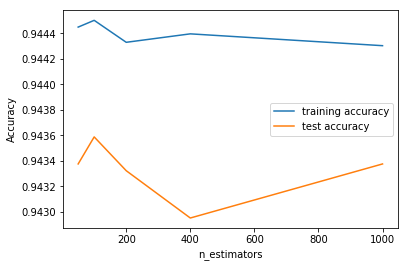

In [103]:
# parameters to build the model on
parameters = {'n_estimators': [50, 100, 200,400,600]}
randomforesttuning(parameters)

n_estimators means The number of trees in the forest.

#### Tuning max_features

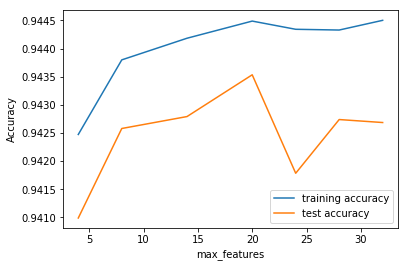

In [104]:
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20,24]}
randomforesttuning(parameters)

Apparently, the training and test scores both seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

#### Tuning min_samples_leaf

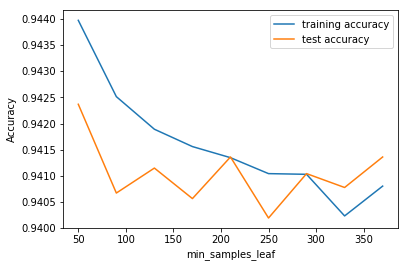

In [105]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(200, 500, 50)}
randomforesttuning(parameters)

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

You can see that the model starts of overfit as you decrease the value of min_samples_leaf.

#### Tuning min_samples_split

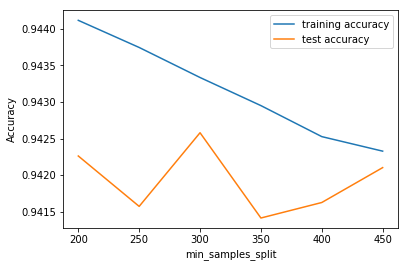

In [106]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}
randomforesttuning(parameters)

min_samples_split represents the minimum number of samples required to split an internal node.

### Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

**Fitting the final model with the best parameters obtained from grid search.**

In [106]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=60)
# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred = rfc.predict(df_test_pca)

In [108]:
print("************Training Results*********************")
y_pred_train = rfc.predict(df_train_pca)
print("Accuracy Score:  ",round(accuracy_score(y_train,y_pred_train),3))
print(classification_report(y_train, y_pred_train))

************Training Results*********************
Accuracy Score:   0.919
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     17342
          1       0.00      0.00      0.00      1519

avg / total       0.85      0.92      0.88     18861



In [109]:
print("************Test Results*********************")
print(classification_report(y_test,y_pred))
model_evaluation(y_test, y_pred, rfc,'pca')

************Test Results*********************
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      7440
          1       0.00      0.00      0.00       644

avg / total       0.85      0.92      0.88      8084

typemodel pca
[[7440    0]
 [ 644    0]]
Accuracy Score:   0.92
AUC Score:  0.5
1
ROC_AUC Score : 0.872
Not-Churn Accuracy Rate:(Specificity):  1.0
Churn Accuracy Rate:(Sensitivity):  0.0


Inferences:

As there are high accuracy score but churn accuracy rate is 0 which is mainly because of data highly imbalance. 
We can use some other techniques like XGBoost and smote 

### XGBoost with hyperparameter tuning

In [110]:
#XGBoost using the best parameter value got from GridSearch Cross  Validation



# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=60)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [111]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

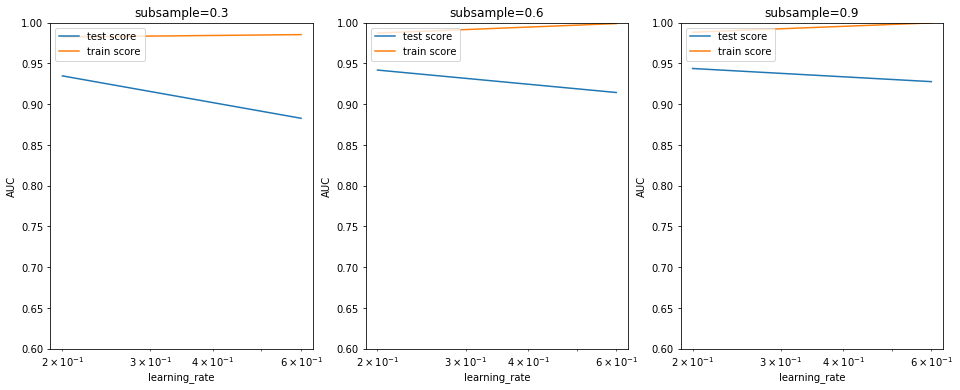

In [112]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')

# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal. 
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters). 


Let's build a final model with the chosen hyperparameters.

In [114]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':60,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic',
       params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 60, 'subsample': 0.9, 'objective': 'binary:logistic'},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

#### Finding optimal threshold

In [115]:
# predict
y_pred = model.predict((X_test))

y_pred_train = model.predict((X_train))

pred_probs_test = model.predict_proba(X_test)[:,1]

#dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

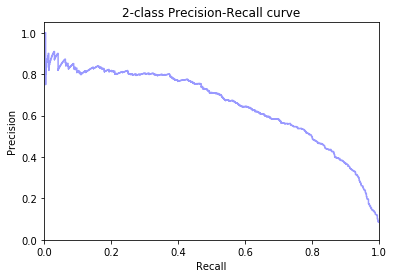

In [116]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_probs_test)
 
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.21628662943840027
Max F1-score at cut-off :  0.6370967741935483


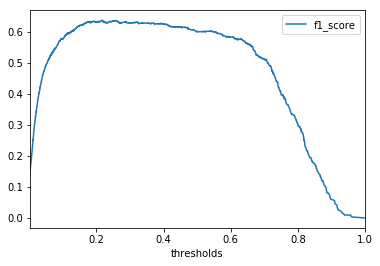

In [117]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

In [118]:
pred_probs_test = (model.predict_proba(X_test)[:,1] >= 0.2).astype(bool) # set threshold as 0.3
y_pred = model.predict((X_test) >= 0.2).astype(bool)

In [119]:
print("ROC_AUC Score ==> {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))
TP = (confusion_matrix(y_test,y_pred))[0][0]
FP = (confusion_matrix(y_test,y_pred))[0][1]
FN = (confusion_matrix(y_test,y_pred))[1][0]
TN = (confusion_matrix(y_test,y_pred))[1][1]

ROC_AUC Score ==> 0.85


In [120]:
print("Accuracy Score:  ",round(accuracy_score(y_test,y_pred),3))
print("AUC Score: ",round(metrics.roc_auc_score(y_test,y_pred),3))
print("Not-Churn Accuracy Rate:(Specificity) ==> {}".format(TP/(TP+FP)))
print("Churn Accuracy Rate:(Sensitivity) ==> {}".format(TN/(TN+FN)))

Accuracy Score:   0.92
AUC Score:  0.5
Not-Churn Accuracy Rate:(Specificity) ==> 1.0
Churn Accuracy Rate:(Sensitivity) ==> 0.0


Finally, let's also look at the feature importances.

In [122]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'loc_og_t2c_mou_8': 0.0029007674,
 'std_og_mou_8': 0.0,
 'ic_others_8': 0.004760956,
 'loc_ic_t2f_mou_8': 0.0,
 'isd_ic_mou_8': 0.004056647,
 'loc_ic_mou_8': 0.047974266,
 'std_ic_t2f_mou_8': 0.0050423746,
 'spl_ic_mou_8': 0.00774937,
 'isd_og_mou_8': 0.0037985058,
 'loc_og_mou_8': 0.004875496,
 'std_og_t2f_mou_8': 0.0,
 'std_ic_mou_8': 0.00720327,
 'std_ic_t2m_mou_8': 0.0,
 'std_ic_t2t_mou_8': 0.0,
 'std_og_t2m_mou_8': 0.0023891751,
 'loc_og_t2f_mou_8': 0.020785823,
 'std_og_t2t_mou_8': 0.0,
 'roam_og_mou_8': 0.022736091,
 'og_others_8': 0.0,
 'roam_ic_mou_8': 0.008386444,
 'offnet_mou_8': 0.01208166,
 'spl_og_mou_8': 0.0,
 'loc_og_t2t_mou_8': 0.0055352487,
 'onnet_mou_8': 0.0036530085,
 'loc_ic_t2m_mou_8': 0.03459492,
 'loc_og_t2m_mou_8': 0.020109242,
 'loc_ic_t2t_mou_8': 0.0067195483,
 'std_ic_t2f_mou_6': 0.0060362816,
 'loc_ic_t2m_mou_6': 0.008201404,
 'std_og_t2f_mou_6': 0.0,
 'std_ic_t2m_mou_6': 0.005441081,
 'std_og_t2m_mou_6': 0.008489817,
 'loc_ic_t2t_mou_6': 0.0041143764,
 '

In [121]:
print("************Training Results*********************")
print("Accuracy Score:  ",round(accuracy_score(y_train,y_pred_train),3))
print(classification_report(y_train,y_pred_train))

************Training Results*********************
Accuracy Score:   0.95
             precision    recall  f1-score   support

          0       0.96      0.98      0.97     17342
          1       0.75      0.58      0.65      1519

avg / total       0.95      0.95      0.95     18861



In [123]:
print("****Test Results***")
print(classification_report(y_test,y_pred))

****Test Results***
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      7440
          1       0.00      0.00      0.00       644

avg / total       0.85      0.92      0.88      8084



### Smote for handling Data Imbalance

In [124]:
from imblearn.over_sampling import SMOTE

print('**********Before Oversampling**********')
print('the shape of train_X: {}'.format(X_train.shape))
print('the shape of train_y: {} \n'.format(y_train.shape))
print("y_train count: '1': Churn ==> {}".format(sum(y_train['churn'] == 1)))
print("y_train count: '0': Not-Churn ==> {}".format(sum(y_train['churn'] == 0)))



sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values.ravel())



print('**********After Oversampling**********')
print('the shape of train_X: {}'.format(X_train_res.shape))
print('the shape of train_y: {} \n'.format(y_train_res.shape))

print("y_train count: '1': Churn ==> {}".format(sum(y_train_res==1)))
print("y_train count: '0': Not-Churn ==>{}".format(sum(y_train_res==0)))

**********Before Oversampling**********
the shape of train_X: (18861, 126)
the shape of train_y: (18861, 1) 

y_train count: '1': Churn ==> 1519
y_train count: '0': Not-Churn ==> 17342
**********After Oversampling**********
the shape of train_X: (34684, 126)
the shape of train_y: (34684,) 

y_train count: '1': Churn ==> 17342
y_train count: '0': Not-Churn ==>17342


#### Logistic Regression using smote

In [125]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
y_pred = lr1.predict(X_test) 
  
# print classification report
print("************Training Results*********************")
y_pred_train = lr1.predict(X_train)
print("Accuracy Score:  ",round(accuracy_score(y_train,y_pred_train),3))
print(classification_report(y_train, y_pred_train))


print("************Test Results*************************")
print(classification_report(y_test, y_pred))
model_evaluation(y_test, y_pred,lr1,'')

************Training Results*********************
Accuracy Score:   0.852
             precision    recall  f1-score   support

          0       0.98      0.85      0.91     17342
          1       0.34      0.85      0.48      1519

avg / total       0.93      0.85      0.88     18861

************Test Results*************************
             precision    recall  f1-score   support

          0       0.98      0.85      0.91      7440
          1       0.32      0.82      0.46       644

avg / total       0.93      0.85      0.87      8084

typemodel 
[[6305 1135]
 [ 118  526]]
Accuracy Score:   0.845
AUC Score:  0.832
4
ROC_AUC Score : 0.899
Not-Churn Accuracy Rate:(Specificity):  0.847
Churn Accuracy Rate:(Sensitivity):  0.817


we can see that after handling the data imbalced the train and test accuracy difference is minimize. So, our model started performe better after smote

#### Random Forest using smote

In [127]:
#Use the Same Hyper parameter got in last execution
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=30, 
                             min_samples_split=170,
                             max_features=20,
                             n_estimators=100)
# fit
rfc.fit(X_train_res,y_train_res)

# Making predictions
y_pred = rfc.predict(X_test)


print("************Training Results*********************")
y_pred_train = rfc.predict(X_train)
print("Accuracy Score:  ",round(accuracy_score(y_train,y_pred_train),3))
print(classification_report(y_train, y_pred_train))

print("************Test Results*********************")
print(classification_report(y_test, y_pred))
model_evaluation(y_test, y_pred,rfc,'')

************Training Results*********************
Accuracy Score:   0.896
             precision    recall  f1-score   support

          0       0.98      0.90      0.94     17342
          1       0.42      0.79      0.55      1519

avg / total       0.94      0.90      0.91     18861

************Test Results*********************
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      7440
          1       0.39      0.78      0.52       644

avg / total       0.93      0.89      0.90      8084

typemodel 
[[6657  783]
 [ 141  503]]
Accuracy Score:   0.886
AUC Score:  0.838
4
ROC_AUC Score : 0.912
Not-Churn Accuracy Rate:(Specificity):  0.895
Churn Accuracy Rate:(Sensitivity):  0.781


After smote the Random forest model is working better but main important factor churn accuracy is 0.783 is low compare to logistic regression

### Logistric Regression with PCA and Smote

In [128]:
pca_again = PCA(0.99)
df_train_pca1 = pca_again.fit_transform(X_train_res)
df_train_pca1.shape

(34684, 87)

In [131]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca1,y_train_res)

df_test_pca1 = pca_again.transform(X_test)
df_train_pca1 = pca_again.transform(X_train_res)
df_test_pca1.shape
# #Making prediction on the test data
y_pred = model_pca.predict(df_test_pca1)

In [132]:
print("************Training Results*********************")
y_pred_train = model_pca.predict(df_train_pca1)
print(classification_report(y_train_res, y_pred_train))

************Training Results*********************
             precision    recall  f1-score   support

          0       0.88      0.85      0.87     17342
          1       0.86      0.88      0.87     17342

avg / total       0.87      0.87      0.87     34684



In [134]:
print("************Test Results*********************")
print(classification_report(y_test, y_pred))

************Test Results*********************
             precision    recall  f1-score   support

          0       0.98      0.85      0.91      7440
          1       0.32      0.82      0.46       644

avg / total       0.93      0.85      0.87      8084



### Sampling: 

### Over sampling: 

In [135]:
df_train_pca.shape

(18861, 85)

In [136]:
y_train.shape

(18861, 1)

In [137]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros= ros.fit_sample(X_train, y_train)
x_test_ros, y_test_ros = ros.fit_sample(X_test, y_test)
x_train_ros.shape

(34684, 126)

In [138]:
y_train_ros.sum()

17342

In [139]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    
    print("ROC_AUC Score :" ,round(metrics.roc_auc_score(y_test, pred_probs_test),3))
    TP = (confusion_matrix(y_test,y_pred))[0][0]
    FP = (confusion_matrix(y_test,y_pred))[0][1]
    FN = (confusion_matrix(y_test,y_pred))[1][0]
    TN = (confusion_matrix(y_test,y_pred))[1][1]
    print("Not-Churn Accuracy Rate:(Specificity): ",round((TP/(TP+FP)),3))
    print("Churn Accuracy Rate:(Sensitivity): ",round((TN/(TN+FN)),3))
    
    return rf

In [140]:
rf_ros = fit_random_forest(x_train_ros, x_test_ros, y_train_ros, y_test_ros)

             precision    recall  f1-score   support

          0       0.78      0.91      0.84      7440
          1       0.89      0.74      0.81      7440

avg / total       0.84      0.83      0.83     14880

0.8264112903225806
[[6765  675]
 [1908 5532]]
ROC_AUC Score : 0.846
Not-Churn Accuracy Rate:(Specificity):  0.848
Churn Accuracy Rate:(Sensitivity):  0.823


In [141]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    lr2 = LogisticRegression()
    lr2.fit(x_train_data, y_train_data)
    predictions = lr2.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    
    print("ROC_AUC Score :" ,round(metrics.roc_auc_score(y_test, pred_probs_test),3))
    TP = (confusion_matrix(y_test,y_pred))[0][0]
    FP = (confusion_matrix(y_test,y_pred))[0][1]
    FN = (confusion_matrix(y_test,y_pred))[1][0]
    TN = (confusion_matrix(y_test,y_pred))[1][1]
    print("Not-Churn Accuracy Rate:(Specificity): ",round((TP/(TP+FP)),3))
    print("Churn Accuracy Rate:(Sensitivity): ",round((TN/(TN+FN)),3))
    
    return lr2

In [142]:
lr_ros = fit_logistic_regression(x_train_ros, x_test_ros, y_train_ros, y_test_ros)

             precision    recall  f1-score   support

          0       0.84      0.84      0.84      7440
          1       0.84      0.84      0.84      7440

avg / total       0.84      0.84      0.84     14880

0.8362903225806452
[[6218 1222]
 [1214 6226]]
ROC_AUC Score : 0.846
Not-Churn Accuracy Rate:(Specificity):  0.848
Churn Accuracy Rate:(Sensitivity):  0.823


This giving good results but the problem with oversampling is redundant data so lets try other sampling technique which 
can handle this problem

### Over sampling with under sampling (Using PCA Data)

In [143]:
df_train_pca.shape

(18861, 85)

In [144]:
y_train.shape

(18861, 1)

In [145]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt_train, y_smt_train = smt.fit_sample(df_train_pca, y_train)

In [146]:
#x_smt_test, y_smt_test = smt.fit_sample(df_test_pca, y_test)

#### Logistic Regression

In [147]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    lr = LogisticRegression(random_state=True)
    lr.fit(x_train_data, y_train_data)
    predicted_proba = lr.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba).round(3)*100)
    return lr

In [148]:
lr_samp = fit_logistic_regression(x_smt_train, df_test_pca, y_smt_train, y_test)

90.0


In [149]:
y_train_pred = lr_samp.predict_proba(x_smt_train)[:,1]
y_train_pred[:10]

array([2.61843598e-02, 5.68587801e-01, 1.88397996e-03, 5.97073169e-01,
       8.46855751e-01, 8.42531722e-01, 4.54496886e-04, 8.65648350e-01,
       3.15030118e-03, 2.04141645e-03])

In [150]:
y_train_res = y_smt_train
y_train_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [151]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_train_pred})
y_train_pred_final

Churn    Churn_Prob
0          0  2.618436e-02
1          0  5.685878e-01
2          0  1.883980e-03
3          0  5.970732e-01
4          1  8.468558e-01
5          0  8.425317e-01
6          0  4.544969e-04
7          1  8.656483e-01
8          0  3.150301e-03
9          0  2.041416e-03
10         1  9.939119e-01
11         0  7.675229e-01
12         0  1.511447e-01
13         0  5.015235e-03
14         0  8.014797e-02
15         0  6.372073e-04
16         0  3.676622e-01
17         0  8.313439e-01
18         0  5.743962e-04
19         0  1.551477e-02
20         0  9.753646e-01
21         0  1.694806e-11
22         0  2.384852e-02
23         0  6.177875e-04
24         0  1.836739e-01
25         0  5.436876e-01
26         0  2.940967e-01
27         1  8.892963e-01
28         0  9.476474e-01
29         0  3.408169e-09
30         0  1.447164e-01
31         0  9.699841e-02
32         0  1.959926e-01
33         0  5.168174e-01
34         0  6.704286e-02
35         0  1.037408e-04
36         0  5.067596e-01
37         0  3.253929e-03
38         0  2.068119e-02
39         1  9.855114e-01
40         0  5.248969e-01
41         0  4.153842e-01
42         0  3.414538e-02
43         0  2.187510e-01
44         0  3.467089e-02
45         0  1.151006e-01
46         0  6.440384e-01
47         0  3.778462e-01
48         0  4.897359e-02
49         0  5.252879e-02
50         0  8.268788e-01
51         0  2.837725e-03
52         0  4.460462e-03
53         0  7.341456e-02
54         0  4.114571e-02
55         0  5.914620e-03
56         1  2.871228e-01
57         0  1.731169e-02
58         0  2.488584e-02
59         0  1.466801e-02
60         0  4.901729e-08
61         0  1.839020e-03
62         0  4.401805e-02
63         0  3.224703e-01
64         0  2.323944e-01
65         0  7.220976e-03
66         0  1.449264e-01
67         0  3.513403e-01
68         0  2.223963e-01
69         0  3.174139e-01
70         0  5.724674e-01
71         0  9.298120e-02
72         0  4.685608e-03
73         0  2.756968e-02
74         0  8.582137e-02
75         0  1.136854e-01
76         0  5.969454e-02
77         0  6.187707e-06
78         0  6.144130e-07
79         0  1.255888e-01
80         0  1.193957e-02
81         0  3.039393e-01
82         1  4.831507e-01
83         0  2.094851e-02
84         0  2.095530e-03
85         0  1.216716e-02
86         0  2.404672e-02
87         0  1.934001e-04
88         0  1.149700e-01
89         0  1.806399e-01
90         0  7.460273e-01
91         0  9.557500e-02
92         0  2.428862e-02
93         0  9.005099e-01
94         0  1.914944e-03
95         0  1.639974e-02
96         0  1.612038e-01
97         0  8.198016e-01
98         0  1.572881e-01
99         0  1.736006e-02
100        0  3.162613e-01
101        0  8.853710e-03
102        0  1.299607e-01
103        0  2.190570e-02
104        0  4.199135e-01
105        0  8.486249e-02
106        0  5.888007e-01
107        0  7.146203e-03
108        0  2.595876e-04
109        0  6.264063e-02
110        0  1.258896e-01
111        0  9.338163e-01
112        0  2.135419e-01
113        0  1.358971e-02
114        0  5.634610e-01
115        0  2.141619e-02
116        0  5.041953e-02
117        0  2.072905e-01
118        0  3.103501e-02
119        0  1.464334e-02
120        0  5.504802e-04
121        0  3.797462e-04
122        0  5.479628e-01
123        0  1.443458e-04
124        0  4.913165e-03
125        0  7.264082e-01
126        0  1.076015e-05
127        0  2.302298e-02
128        0  8.630267e-03
129        0  1.508784e-01
130        0  9.170938e-01
131        0  5.155408e-01
132        0  7.620193e-03
133        0  7.851298e-02
134        0  4.285200e-03
135        0  2.870196e-02
136        1  1.704263e-01
137        0  2.266426e-02
138        1  9.185724e-01
139        0  1.633664e-01
140        0  1.082023e-01
141        0  8.156845e-01
142        0  2.618005e-01
143        0  1.897687e-01
144        0  3.947190e-04
145        0  6.491999e-04
146        0  5.098930e-01
147        

In [152]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.026184          0
1      0    0.568588          1
2      0    0.001884          0
3      0    0.597073          1
4      1    0.846856          1

In [153]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8658592848904267


In [154]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14695,  2645],
       [ 2007, 15333]], dtype=int64)

In [155]:
model_evaluation(y_test,y_pred,lr_samp,'pca')

typemodel pca
[[6307 1133]
 [ 114  530]]
Accuracy Score:   0.846
AUC Score:  0.835
1
ROC_AUC Score : 0.9
Not-Churn Accuracy Rate:(Specificity):  0.848
Churn Accuracy Rate:(Sensitivity):  0.823


##### Metrics beyond simply accuracy

In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
print('sensitivity ')
print(TP / float(TP+FN))
# Let us calculate specificity
print('specificity')
print(TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate',FP/ float(TN+FP))
# positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))

sensitivity 
0.8842560553633217
specificity
0.8474625144175317
false postive rate 0.15253748558246827
0.8528757370119034
0.8798347503293019


##### Plotting the ROC Curve

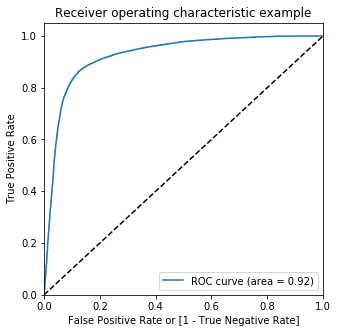

(array([0.        , 0.        , 0.        , ..., 0.99988466, 0.99994233,
        1.        ]),
 array([5.76701269e-05, 1.15340254e-04, 1.73010381e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([9.99989617e-01, 9.99987032e-01, 9.99975976e-01, ...,
        3.51894136e-14, 7.52078148e-15, 1.23078103e-18]))

In [158]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [159]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.026184          0    1    0    0    0    0    0    0    0    0    0
1      0    0.568588          1    1    1    1    1    1    1    0    0    0    0
2      0    0.001884          0    1    0    0    0    0    0    0    0    0    0
3      0    0.597073          1    1    1    1    1    1    1    0    0    0    0
4      1    0.846856          1    1    1    1    1    1    1    1    1    1    0

In [160]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.739648  0.977682  0.501615
0.2   0.2  0.795329  0.955998  0.634660
0.3   0.3  0.830911  0.934083  0.727739
0.4   0.4  0.852970  0.910381  0.795559
0.5   0.5  0.865859  0.884256  0.847463
0.6   0.6  0.867330  0.845963  0.888697
0.7   0.7  0.853057  0.786736  0.919377
0.8   0.8  0.809487  0.673068  0.945905
0.9   0.9  0.673068  0.372088  0.974048


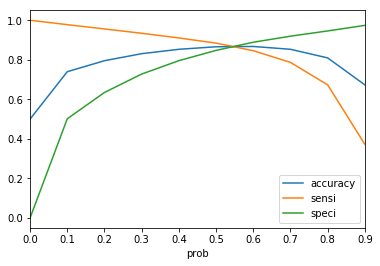

In [161]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted
0      0    0.026184          0    1    0    0    0    0    0    0    0    0    0                0
1      0    0.568588          1    1    1    1    1    1    1    0    0    0    0                1
2      0    0.001884          0    1    0    0    0    0    0    0    0    0    0                0
3      0    0.597073          1    1    1    1    1    1    1    0    0    0    0                1
4      1    0.846856          1    1    1    1    1    1    1    1    1    1    0                1

In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8687427912341407

### Test Data

In [288]:
y_test

churn
17331      0
67747      0
51855      0
85169      0
68214      0
89711      0
78071      0
18045      0
80422      0
95768      0
40711      0
96654      0
16885      0
60244      0
62800      0
7069       0
16677      0
11929      0
12922      0
33974      0
27866      0
86776      0
975        0
20733      0
17524      1
3655       0
63515      0
99176      0
41736      0
91527      0
2259       0
50427      0
15253      0
27757      0
61803      0
56635      0
4485       0
18524      0
90595      0
56442      0
60582      0
53768      0
75642      0
77026      0
79411      0
6948       0
92707      1
34805      0
31426      0
17353      0
82092      0
54375      0
92471      0
35361      0
13390      0
65257      0
50059      0
48150      0
3772       0
51999      0
88182      0
21480      0
89326      0
1044       0
56687      0
43044      0
33459      0
37093      0
30200      0
29131      0
38804      0
49110      0
41607      0
30743      0
32609      0
33552      0
51051      0
95267      0
97749      1
40833      1
11390      0
65782      0
6939       0
78461      0
13406      0
88768      0
97320      0
28051      1
53156      0
33658      0
82713      0
35623      0
61345      0
78160      0
87791      0
40068      0
56716      0
76668      0
64495      0
10080      0
87554      0
58776      0
25275      0
5896       0
84463      1
51407      0
73568      0
11598      0
27202      0
71636      0
11414      1
64707      0
7451       1
76410      0
37295      0
29372      0
49293      0
52520      0
38843      0
78711      0
69392      0
56720      0
9712       0
45794      0
11941      0
6656       0
85277      0
68148      0
40260      0
50724      0
547        0
38326      0
58166      0
65836      0
99189      0
70352      0
2355       0
93681      0
13456      0
26118      0
78797      0
5574       1
93256      0
58870      0
18732      0
58763      1
88282      0
61236      0
46019      0
82881      1
91875      0
8730       1
28936      0
25374      0
93509      1
68425      0
76443      0
52808      0
28480      0
561        0
82398      0
86576      0
48456      0
27436      0
44888      0
22309      0
54949      0
40686      0
26409      0
83158      0
97234      0
81553      0
68502      0
34484      0
43637      0
22581      0
97451      0
96403      0
78585      0
70499      0
4727       0
40624      0
5526       0
9062       0
9337       0
73248      0
32833      0
58971      0
73329      0
65148      0
26417      0
83833      0
79110      0
20765      0
25631      0
47371      0
55618      1
88081      0
36719      0
49001      0
358        1
16268      0
47880      0
81767      0
99311      0
35096      0
24020      0
73617      0
62103      0
61237      0
21496      0
15471      1
10725      0
5017       0
89505      0
46204      0
9005       0
80674      0
43039      0
1729       0
37788      0
13669      0
63469      0
62949      0
24979      0
54444      0
37423      0
91783      0
88159      1
32343      0
20807      1
93269      0
80567      0
11357      0
57006      0
69138      1
65284      0
16085      0
19740      0
52897      0
77646      0
83979      0
25137      0
69427      0
93682      0
45867      0
1709       0
57562      0
97910      0
319        0
...      ...
5744       0
63844      0
34016      0
50750      0
81587      0
49081      0
68952      0
70766      0
45563      0
14380      0
54204      0
24597      0
2133       0
27236      0
65624      0
41977      1
59768      0
81213      0
33521      0
82916      0
90853      0
74568      0
70924      1
5645       0
84007      0
71564      0
35384      0
99626      0
40923      0
7852       0
91498      0
55542      0
10005      0
49567      0
36135      0
31587      0
64774      0
28533      0
53730      0
88162      0
63171      0
62446      0
89331      0
147        0
91706      0
93348      0
59823      0
4320       1
76224      0
75076      0
37524      0
56965      0
12660      0
60197      0
85192      0
34005      0
861

In [164]:
_test_percentage = lr_samp.predict_proba(df_test_pca)[:,1]
test_churn_predicted = pd.DataFrame({'ChurnProbability': lr_samp.predict_proba(df_test_pca)[:,1]})
test_churn_predicted['y_test'] = y_test.values
test_churn_predicted['predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.55 else 0)
test_churn_predicted.head(10)

ChurnProbability  y_test  predict
0          0.005967       0        0
1          0.102313       0        0
2          0.000013       0        0
3          0.321137       0        0
4          0.105268       0        0
5          0.077057       0        0
6          0.085403       0        0
7          0.013968       0        0
8          0.016528       0        0
9          0.164331       0        0

In [165]:
print(metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted.predict)) 

[[6426 1014]
 [ 129  515]]


In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(test_churn_predicted.y_test, test_churn_predicted.predict)

0.8586095992083127

In [167]:
_percentage = lr_samp.predict_proba(df_test_pca)[:,1]

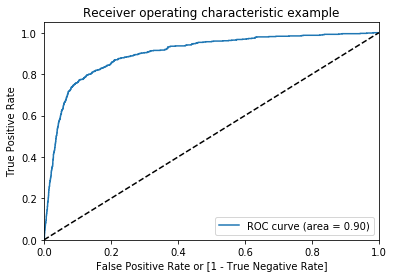

In [168]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_test, _percentage)


#### ## Precision and Recall on training

In [169]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14695,  2645],
       [ 2007, 15333]], dtype=int64)

##### Precision
TP / TP + FP

In [170]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8528757370119034

##### Recall
TP / TP + FN

In [171]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8842560553633217

#### ## Precision and Recall on test

In [172]:
confusion = metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted.predict)
confusion

array([[6426, 1014],
       [ 129,  515]], dtype=int64)

In [173]:
print('Precision')
print(confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision
0.3368214519293656


In [174]:
print('Recall')
print(confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall
0.7996894409937888


In [175]:
pca_column_frame['sampling_coeff'] = lr_samp.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()]

PC1           PC2           Feature     coeff  sampling_coeff
29  0.038047 -2.633870e-02  std_og_t2f_mou_6 -0.861133       -0.893265
7  -0.020163  3.294145e-02      spl_ic_mou_8  0.618186        0.710660
81  0.059613 -5.725745e-02        jun_vbc_3g -0.449870       -0.678238
31 -0.019315  1.648952e-01  std_og_t2m_mou_6 -0.610064       -0.607420
0   0.007096  3.472367e-02  loc_og_t2c_mou_8 -0.559997       -0.562293
50  0.104712 -5.864132e-02  loc_ic_t2f_mou_7 -0.414601       -0.496436
30  0.036390  2.776205e-02  std_ic_t2m_mou_6 -0.354494       -0.493912
25  0.187117  2.868291e-03  loc_og_t2m_mou_8 -0.427032       -0.483703
73  0.062311 -4.281647e-02      monthly_3g_7  0.367069        0.450597
17  0.000186  3.485020e-02     roam_og_mou_8  0.381939        0.447133
28  0.179842 -6.241951e-02  loc_ic_t2m_mou_6  0.420007        0.424245
41 -0.050114  1.633246e-01  std_og_t2t_mou_6  0.384893        0.423628
18  0.000000  4.038968e-28       og_others_8 -0.362813       -0.387328
6   0.055192 -3.349484e-02  std_ic_t2f_mou_8  0.305828        0.366108
5   0.213299 -5.127972e-02      loc_ic_mou_8 -0.330003       -0.343247
46  0.057708 -3.381974e-02  std_ic_t2f_mou_7 -0.305270       -0.316508
40 -0.000026  1.592037e-01       onnet_mou_6  0.281385        0.303922
16 -0.032403  1.892367e-01  std_og_t2t_mou_8 -0.151125       -0.280838
39  0.080242  1.436541e-01      offnet_mou_6  0.230887        0.273050
36  0.173039 -1.478686e-02  loc_og_t2m_mou_6 -0.288787       -0.272559
63  0.059173 -5.559905e-02       vol_3g_mb_7 -0.205291       -0.261807
75  0.003003 -2.235631e-02       sachet_3g_6 -0.164719       -0.261627
23  0.018326  1.876024e-01       onnet_mou_8  0.313125        0.260720
71  0.059399 -4.261329e-02      monthly_3g_6  0.152675        0.259494
62  0.057335 -5.753909e-02       vol_3g_mb_6 -0.236766       -0.236821
51 -0.002097  2.953816e-02  loc_og_t2c_mou_7  0.190612        0.231182
68 -0.013825 -7.932243e-03       sachet_2g_6 -0.246223       -0.222016
54  0.189267 -4.990143e-02  loc_ic_t2m_mou_7  0.114722        0.207873
43 -0.047614  1.896264e-01  std_og_t2t_mou_7 -0.175823       -0.203112
14 -0.003245  1.886928e-01  std_og_t2m_mou_8 -0.103725       -0.201790
4   0.028109 -6.570844e-03      isd_ic_mou_8  0.185649        0.200738
27  0.055326 -3.458932e-02  std_ic_t2f_mou_6 -0.163054       -0.199829
58  0.137160  1.718635e-01            arpu_7  0.243420        0.198663
26  0.140315 -2.328039e-02  loc_ic_t2t_mou_8 -0.151294       -0.193780
56  0.133903 -2.442184e-02  loc_ic_t2t_mou_7 -0.209763       -0.190250
69 -0.013862 -9.114180e-04       sachet_2g_7  0.168516        0.176836
35  0.001979  1.796958e-02  loc_og_t2c_mou_6 -0.297009       -0.175734
80  0.061298 -6.030904e-02        jul_vbc_3g -0.094416       -0.173030
2   0.028941  5.305338e-03       ic_others_8 -0.118670       -0.167299
11  0.052530  4.962297e-02      std_ic_mou_8 -0.162567       -0.164527
3   0.103456 -5.302935e-02  loc_ic_t2f_mou_8  0.119103        0.163151
32  0.127554 -3.356381e-02  loc_ic_t2t_mou_6 -0.070927       -0.161626
21  0.008479  6.401993e-02      spl_og_mou_8 -0.105921       -0.157812
76  0.001437 -1.589761e-02       sachet_3g_7  0.166370        0.143313
82  0.006548 -2.602924e-02       vol_2g_mb_8  0.053294        0.143237
22  0.121777  2.004937e-02  loc_og_t2t_mou_8  0.136071        0.137902
65  0.025218 -6.153500e-02      monthly_2g_6 -0.006279       -0.124632
70 -0.009400  3.539692e-03       sachet_2g_8  0.110053        0.123513
47  0.114787  1.884782e-02  loc_og_t2t_mou_7  0.006066       -0.114257
52 -0.013018  1.915409e-01  std_og_t2m_mou_7 -0.151366       -0.102869
48  0.017290  4.883664e-02  std_ic_t2t_mou_7  0.158352        0.099473
57  0.122794  1.265367e-01            arpu_6 -0.036738       -0.098955
44  0.086500  1.769075e-01      offnet_mou_7  0.090808        0.098269
77  0.002786 -1.290507e-02       sachet_3g_8 -0.095134       -0.088754
79  0.068486 -5.697609e-02        aug_vbc_3g -0.103889       -0.088318
60  0.148832  1.712140e-01     hi

#### Random Forest

In [176]:
r_model = RandomForestClassifier()
params = {
    'max_features': range(30, 40, 5),
    'n_estimators': [40],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(100, 150, 25),
    'max_depth': [7, 8, 9]
}

folds = KFold(n_splits=2, shuffle=True, random_state=101)
grid_cv1 = GridSearchCV(r_model,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)
grid_cv1.fit(x_smt_train, y_smt_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.2min finished


GridSearchCV(cv=KFold(n_splits=2, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(30, 40, 5), 'n_estimators': [40], 'min_samples_leaf': range(100, 150, 25), 'min_samples_split': range(100, 150, 25), 'max_depth': [7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [177]:
results = pd.DataFrame(grid_cv1.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth param_max_features param_min_samples_leaf param_min_samples_split param_n_estimators                                             params  split0_test_score  split1_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  mean_train_score  std_train_score
0       22.986616      1.292017         0.291056        0.050564               7                 30                    100                     100                 40  {'max_depth': 7, 'max_features': 30, 'min_samp...           0.852480           0.849193         0.850836        0.001644               14            0.859516            0.865283          0.862399         0.002884
1       23.940293      0.168492         0.334074        0.098591               7                 30                    100                     125                 40  {'max_depth': 7, 'max_features': 30, 'min_samp...           0.858362           0.850461         0.854412        0.003950                5            0.862514            0.863956          0.863235         0.000721
2       22.791354      1.415352         0.290209        0.018959               7                 30                    125                     100                 40  {'max_depth': 7, 'max_features': 30, 'min_samp...           0.852537           0.841638         0.847088        0.005450               24            0.854441            0.859170          0.856805         0.002364
3       23.070441      1.557842         0.404764        0.080887               7                 30                    125                     125                 40  {'max_depth': 7, 'max_features': 30, 'min_samp...           0.852364           0.844233         0.848299        0.004066               20            0.855767            0.858708          0.857238         0.001471
4       30.534194      1.433081         0.209202        0.003248               7                 35                    100                     100                 40  {'max_depth': 7, 'max_features': 35, 'min_samp...           0.854960           0.850519         0.852739        0.002220                8            0.862341            0.866494          0.864418         0.002076
5       31.521468      0.324081         0.231854        0.037045               7                 35                    100                     125                 40  {'max_depth': 7, 'max_features': 35, 'min_samp...           0.856286           0.849020         0.852653        0.003633                9            0.860438            0.863322          0.861880         0.001442
6       28.794283      0.372673         0.218228        0.011694               7                 35                    125                     100                 40  {'max_depth': 7, 'max_features': 35, 'min_samp...           0.850461           0.845559         0.848010        0.002451               22            0.854614            0.860265          0.857439         0.002826
7       29.635249      1.486930         0.205740        0.007655               7                 35                    125                     125                 40  {'max_depth': 7, 'max_features': 35, 'min_samp...           0.852134           0.843887         0.848010        0.004123               22            0.856401            0.858824          0.857612         0.001211
8       26.224753      0.389358         0.211309        0.002228               8                 30                    100                     100                 40  {'max_depth': 8, 'max_features': 30, 'min_samp...           0.860265           0.849654         0.854960        0.005306                4            0.865340            0.866263          0.865802         0.000461
9       26.695046      0.396358         0.177792        0.009919               8                 30                    100                     125                 40  {'max_depth': 8, 'max_features': 30, 

In [179]:
grid_cv1.best_params_

{'max_depth': 9,
 'max_features': 35,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'n_estimators': 40}

In [180]:
best_estimator = grid_cv1.best_estimator_
best_estimator.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = best_estimator.predict(df_test_pca)



************Training Results************
             precision    recall  f1-score   support

          0       0.98      0.88      0.93     17342
          1       0.38      0.83      0.52      1519

avg / total       0.93      0.88      0.90     18861

************Test Results************
             precision    recall  f1-score   support

          0       0.97      0.87      0.92      7440
          1       0.33      0.74      0.46       644

avg / total       0.92      0.86      0.88      8084

[[6474  966]
 [ 169  475]]


In [181]:
print("************Training Results************")
print("Accuracy Score:  ",round(accuracy_score(y_train,prediction_train),3))
prediction_train = best_estimator.predict(df_train_pca)
print(classification_report(y_train,prediction_train))

print("************Test Results************")
print("Accuracy Score:  ",round(accuracy_score(y_test,prediction_test),3))
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

************Training Results************
Accuracy Score:   0.878
             precision    recall  f1-score   support

          0       0.98      0.88      0.93     17342
          1       0.38      0.83      0.52      1519

avg / total       0.93      0.88      0.90     18861

************Test Results************
Accuracy Score:   0.86
             precision    recall  f1-score   support

          0       0.97      0.87      0.92      7440
          1       0.33      0.74      0.46       644

avg / total       0.92      0.86      0.88      8084

[[6474  966]
 [ 169  475]]


#### Inferences

### PCA with Logistic regression has balanced specificity and recall from all the models

#### Important Features

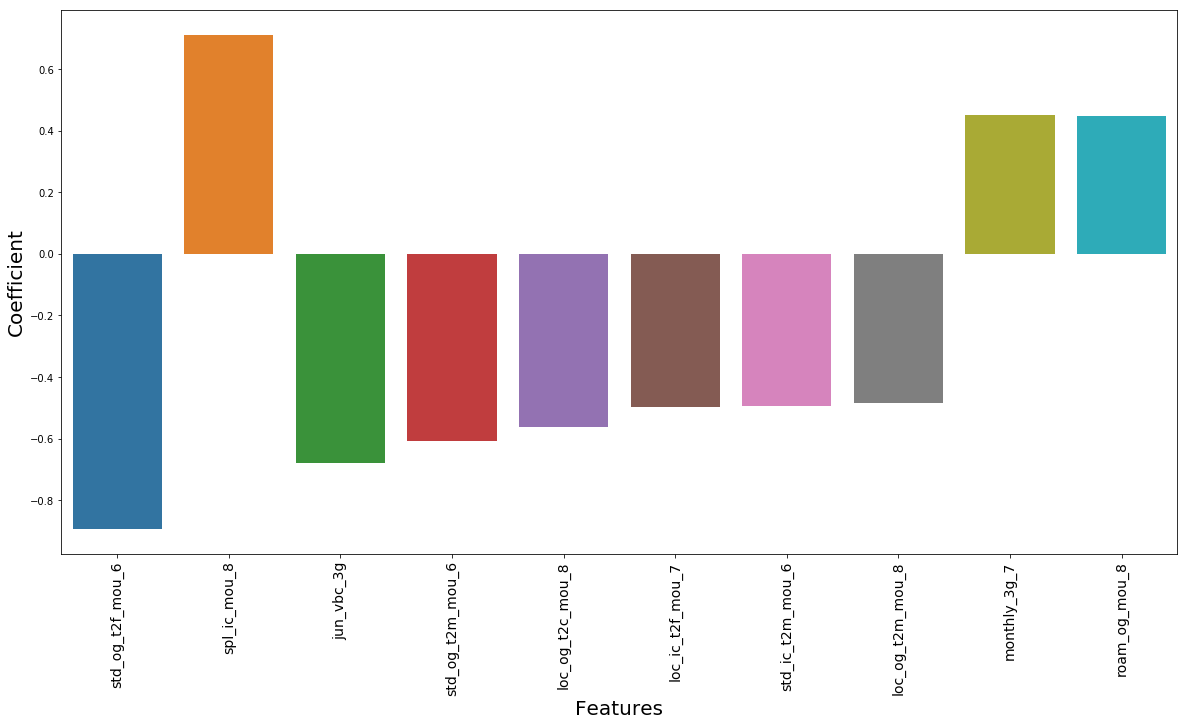

In [182]:
plt.figure(figsize=(20, 10))
top_10_features = pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()].head(10)
sns.barplot(x='Feature', y='sampling_coeff', data=top_10_features)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

#### Lasso Regression to find important features

In [183]:
from sklearn.linear_model import Lasso
# hide warnings
import warnings
warnings.filterwarnings('ignore')

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs = -1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   32.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [184]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       3.872221      0.566241         0.003839        0.002017      0.0001  {'alpha': 0.0001}          -0.144675          -0.148118          -0.148236          -0.143469          -0.146104        -0.146120        0.001875                4           -0.145380           -0.144324           -0.143642           -0.146734           -0.145208         -0.145058         0.001047
1       5.467533      4.991806         0.001893        0.001394       0.001   {'alpha': 0.001}          -0.143463          -0.147576          -0.147548          -0.142187          -0.145066        -0.145168        0.002157                2           -0.144645           -0.143565           -0.142909           -0.146035           -0.144436         -0.144318         0.001060
2       1.416808      0.242776         0.005437        0.000508        0.01    {'alpha': 0.01}          -0.138863          -0.143348          -0.143786          -0.137544          -0.141502        -0.141009        0.002451                1           -0.140983           -0.140078           -0.138986           -0.142439           -0.140914         -0.140680         0.001138
3       1.659904      1.088974         0.003843        0.001006        0.05    {'alpha': 0.05}          -0.145148          -0.147271          -0.149300          -0.141257          -0.145655        -0.145726        0.002663                3           -0.146268           -0.144927           -0.143591           -0.148034           -0.145734         -0.145711         0.001471
4       0.200545      0.028559         0.002350        0.001821         0.1     {'alpha': 0.1}          -0.147457          -0.149474          -0.151656          -0.144153          -0.147803        -0.148109        0.002474                5           -0.148530           -0.147187           -0.145738           -0.150741           -0.148299         -0.148099         0.001650

In [185]:
#### plotting mean test and train scoes with alpha 

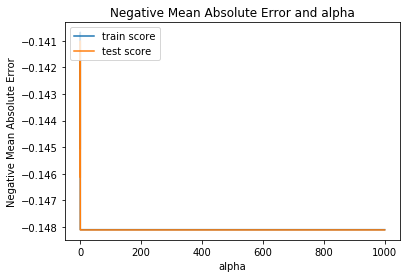

In [186]:

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [187]:
print("Best Alpha Value ==> {} ".format(model_cv.best_params_))

Best Alpha Value ==> {'alpha': 0.01} 


In [188]:
alpha =0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [189]:
lasso.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.00586237,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.01020223,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.00399629,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.00403077,  0.00417546, -0.03343677,
        0.01826075,  0.02015982, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.00556183, -0.        , -0.  

In [190]:
def classification(pred, threshold):
    if(pred > threshold):
        return 1
    else:
        return 0
classification = np.vectorize(classification)

In [191]:
y_pred = lasso.predict(X_test)
y_pred = classification(y_pred, 0.5)

In [192]:
model_evaluation(y_test, y_pred, lasso, 'lasso')

typemodel lasso
[[7440    0]
 [ 643    1]]
Accuracy Score:   0.92
AUC Score:  0.501
3
ROC_AUC Score : 0.88
Not-Churn Accuracy Rate:(Specificity):  1.0
Churn Accuracy Rate:(Sensitivity):  0.002


In [194]:
#Get Features list and co-efficient values from the Lasso Regression and make a single dataframe
s1 = pd.DataFrame(np.insert(np.array(X.columns),0,"constant"), columns=['feature'])
s1.reset_index(drop = True, inplace = True)

s2 = pd.DataFrame(np.insert(np.array(lasso.coef_), 0, lasso.intercept_), columns=['Values'])
s2.reset_index(drop = True, inplace= True)

s2['Values'] = s2['Values'].apply(lambda x: round(x,3))
impFeatures_df = pd.concat([s1,s2], axis=1)
impFeatures_df = impFeatures_df.iloc[1:]
impFeatures_df.reset_index(drop= True, inplace = True)

In [195]:
#### Draw the complete date frame of features and coefficient.

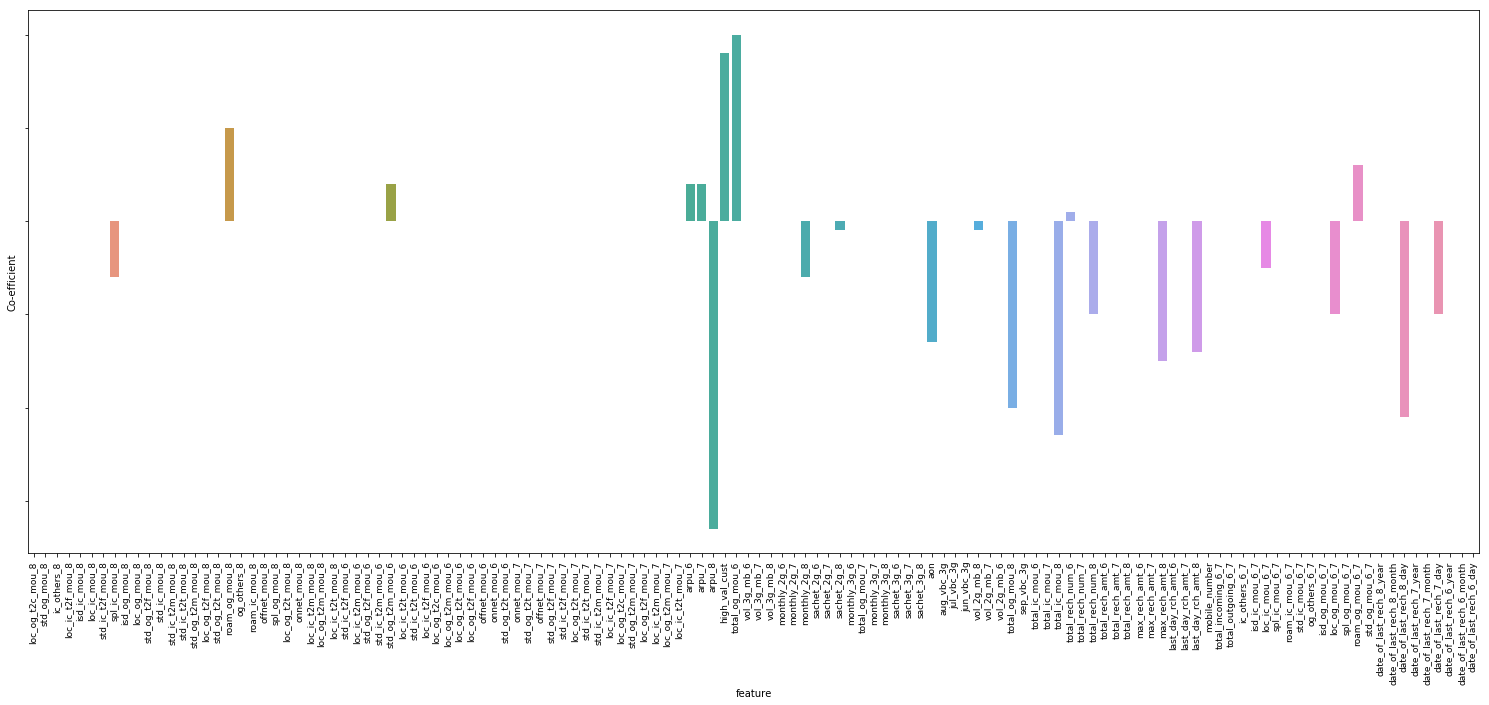

In [196]:

import matplotlib.pyplot as plt
plt.figure(figsize=(26,10))
plt.subplot(111)
ax1 = sns.barplot(x = impFeatures_df['feature'], y = impFeatures_df['Values'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize= 9)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize = 15)
plt.ylabel('Co-efficient', fontsize = 10)
plt.show()

In [197]:
#Drop features with 0 coefficient.
impFeatures_df = impFeatures_df.loc[impFeatures_df['Values'] != 0]

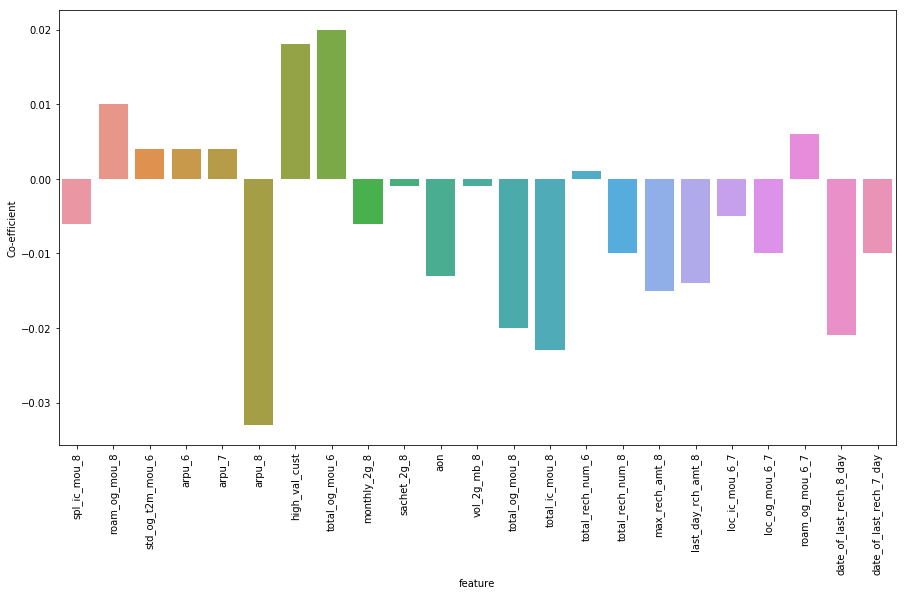

In [198]:
#Draw the plot for the features with non-zero co-efficient
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.subplot(111)
ax1 = sns.barplot(x = impFeatures_df['feature'], y = impFeatures_df['Values'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)
plt.ylabel('Co-efficient')
plt.show()

### Drive Important Features for to know behaviour of churn phase.

In [199]:
print("Important Features",format(np.array(impFeatures_df['feature'])))

Important Features ['spl_ic_mou_8' 'roam_og_mou_8' 'std_og_t2m_mou_6' 'arpu_6' 'arpu_7'
 'arpu_8' 'high_val_cust' 'total_og_mou_6' 'monthly_2g_8' 'sachet_2g_8'
 'aon' 'vol_2g_mb_8' 'total_og_mou_8' 'total_ic_mou_8' 'total_rech_num_6'
 'total_rech_num_8' 'max_rech_amt_8' 'last_day_rch_amt_8' 'loc_ic_mou_6_7'
 'loc_og_mou_6_7' 'roam_og_mou_6_7' 'date_of_last_rech_8_day'
 'date_of_last_rech_7_day']


# Conclusion:

### Important Features as per Logistic Regression:
Top 10
1. std_og_t2f_mou_6
2. spl_ic_mou_8
3. jun_vbc_3g
4. std_og_t2m_mou_6
5. loc_og_t2m_mou_8
6. loc_ic_t2f_mou_7
7. std_ic_t2m_mou_6
8. loc_og_t2m_mou_8
9. monthly_3g_7
10. roam_og_mou_8

### Important Features as per Lasso:
'spl_ic_mou_8' 
'roam_og_mou_8' 
'std_og_t2m_mou_6' 
'arpu_6' 
'arpu_7'
 'arpu_8' 
 'high_val_cust' 
 'total_og_mou_6' 
 'monthly_2g_8' 
 'sachet_2g_8'
 'aon' 'vol_2g_mb_8' 
 'total_og_mou_8' 
 'total_ic_mou_8' 
 'total_rech_num_6'
 'total_rech_num_8' 
 'max_rech_amt_8' 
 'last_day_rch_amt_8' 
 'loc_ic_mou_6_7'
 'loc_og_mou_6_7' 
 'roam_og_mou_6_7' 
 'date_of_last_rech_8_day'
 'date_of_last_rech_7_day'
 
 
 ### Final Model to use
 #### From all the models Logistic Regression with PCA, Hypertuning and Oversampling with Undersampling giving the best results as still have low precision but all other factors seems good like no overfitting and good f1 score.
 